In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)

In [3]:
prprice=pd.read_csv(r'C:\Users\annas\Downloads\Property_Price_Train.csv')
prtest=pd.read_csv(r'C:\Users\annas\Downloads\Property_Price_Test.csv')
prprice.shape,prtest.shape


((1459, 81), (1459, 80))

In [4]:
prprice.describe()

Id  Building_Class   Lot_Extent       Lot_Size  \
count  1459.000000     1459.000000  1200.000000    1459.000000   
mean    730.000000       56.922550    70.045833   10517.225497   
std     421.321334       42.304033    24.294456    9984.675721   
min       1.000000       20.000000    21.000000    1300.000000   
25%     365.500000       20.000000    59.000000    7549.000000   
50%     730.000000       50.000000    69.000000    9477.000000   
75%    1094.500000       70.000000    80.000000   11603.000000   
max    1459.000000      190.000000   313.000000  215245.000000   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.100069         5.575051        1971.272104   1984.879369   
std            1.383171         1.113125          30.212814     20.645927   
min            1.000000         1.000000        1872.000000   1950.000000   
25%            5.000000         5.000000        1954.000000   1967.000000   
50%            6.000000         5.000000        1973.000000   1994.000000   
75%            7.000000         6.000000        2000.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count         1451.00000  1459.000000  1459.000000  1459.000000   
mean           103.75672   443.374914    46.382454   567.535984   
std            181.10815   456.142186   161.248500   441.874057   
min              0.00000     0.000000     0.000000     0.000000   
25%              0.00000     0.000000     0.000000   223.500000   
50%              0.00000   383.000000     0.000000   479.000000   
75%            166.00000   712.000000     0.000000   808.000000   
max           1600.00000  5644.000000  1474.000000  2336.000000   

       Total_Basement_Area  First_Floor_Area  Second_Floor_Area  LowQualFinSF  \
count          1459.000000       1459.000000        1459.000000   1459.000000   
mean           1057.293352       1162.562714         347.230295      5.848526   
std             438.824912        386.712553         436.583480     48.639512   
min               0.000000        334.000000           0.000000      0.000000   
25%             795.500000        882.000000           0.000000      0.000000   
50%             991.000000       1086.000000           0.000000      0.000000   
75%            1298.500000       1391.500000         728.000000      0.000000   
max            6110.000000       4692.000000        2065.000000    572.000000   

       Grade_Living_Area  Underground_Full_Bathroom  \
count        1459.000000                1459.000000   
mean         1515.641535                   0.424949   
std           525.616607                   0.518870   
min           334.000000                   0.000000   
25%          1129.000000                   0.000000   
50%          1464.000000                   0.000000   
75%          1777.500000                   1.000000   
max          5642.000000                   3.000000   

       Underground_Half_Bathroom  Full_Bathroom_Above_Grade  \
count                1459.000000                1459.000000   
mean                    0.057574                   1.565456   
std                     0.238830                   0.550906   
min                     0.000000                   0.000000   
25%                     0.000000                   1.000000   
50%                     0.000000                   2.000000   
75%                     0.000000                   2.000000   
max                     2.000000                   3.000000   

       Half_Bathroom_Above_Grade  Bedroom_Above_Grade  Kitchen_Above_Grade  \
count                1459.000000          1459.000000          1459.000000   
mean                    0.382454             2.866347             1.046607   
std                     0.502798             0.816050             0.220410   
min              

In [5]:
prprice.head()

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type Lane_Type  \
0   1              60          RLD        65.0      8450     Paved       NaN   
1   2              20          RLD        80.0      9600     Paved       NaN   
2   3              60          RLD        68.0     11250     Paved       NaN   
3   4              70          RLD        60.0      9550     Paved       NaN   
4   5              60          RLD        84.0     14260     Paved       NaN   

  Property_Shape Land_Outline Utility_Type Lot_Configuration Property_Slope  \
0            Reg          Lvl       AllPub                 I             GS   
1            Reg          Lvl       AllPub              FR2P             GS   
2            IR1          Lvl       AllPub                 I             GS   
3            IR1          Lvl       AllPub                 C             GS   
4            IR1          Lvl       AllPub              FR2P             GS   

  Neighborhood Condition1 Condition2 House_Type House_Design  \
0      CollgCr       Norm       Norm       1Fam       2Story   
1      Veenker      Feedr       Norm       1Fam       1Story   
2      CollgCr       Norm       Norm       1Fam       2Story   
3      Crawfor       Norm       Norm       1Fam       2Story   
4      NoRidge       Norm       Norm       1Fam       2Story   

   Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
0                 7                5               2003          2003   
1                 6                8               1976          1976   
2                 7                5               2001          2002   
3                 7                5               1915          1970   
4                 8                5               2000          2000   

  Roof_Design Roof_Quality Exterior1st Exterior2nd Brick_Veneer_Type  \
0       Gable           SS     VinylSd     VinylSd           BrkFace   
1       Gable           SS     MetalSd     MetalSd              None   
2       Gable           SS     VinylSd     VinylSd           BrkFace   
3       Gable           SS     Wd Sdng     Wd Shng              None   
4       Gable           SS     VinylSd     VinylSd           BrkFace   

   Brick_Veneer_Area Exterior_Material Exterior_Condition Foundation_Type  \
0              196.0                Gd                 TA              PC   
1                0.0                TA                 TA              CB   
2              162.0                Gd                 TA              PC   
3                0.0                TA                 TA              BT   
4              350.0                Gd                 TA              PC   

  Basement_Height Basement_Condition Exposure_Level BsmtFinType1  BsmtFinSF1  \
0              Gd                 TA             No          GLQ         706   
1              Gd                 TA             Gd          ALQ         978   
2              Gd                 TA             Mn          GLQ         486   
3              TA                 Gd             No          ALQ         216   
4              Gd                 TA             Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  Total_Basement_Area Heating_Type  \
0          Unf           0        150                  856         GasA   
1          Unf           0        284                 1262         GasA   
2          Unf           0        434                  920         GasA   
3          Unf           0        540                  756         GasA   
4          Unf           0        490                 1145         GasA   

  Heating_Quality Air_Conditioning Electrical_System  First_Floor_Area  \
0              Ex                Y             SBrkr               856   
1              Ex                Y             SBrkr              1262   
2              Ex                Y             SBrkr               920   
3              Gd                Y             SBrkr               961   
4              Ex        

In [6]:
prprice.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [7]:
prprice.shape

(1459, 81)

# drope the columns whos NA is more than or near to 50%

In [8]:
prprice=prprice.drop(['Lane_Type'],axis=1)
prprice=prprice.drop(['Pool_Quality'],axis=1)
prprice=prprice.drop(['Fence_Quality'],axis=1)
prprice=prprice.drop(['Miscellaneous_Feature'],axis=1)
prprice=prprice.drop(['Fireplace_Quality'],axis=1)
prprice.shape

(1459, 76)

In [9]:
for i in prprice.columns:
    if 'Year' in i :
        x = prprice[i].value_counts()
        print("Column name is:",i,"and it value is:",x)

Column name is: Construction_Year and it value is: 2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
2000    24
1970    24
1954    24
1958    24
1965    23
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
198

# drope the columns whos not related to our data and not use in model

#### 1) drope the columns whos have only 2 to 4 obsvervation and It has  one obsvervation is near to 75% or 75% of data 

In [10]:
for x in ['Road_Type','Utility_Type','Land_Outline','Property_Slope','Condition2','House_Type','Lot_Configuration','Roof_Quality','Exterior_Condition','Basement_Condition','BsmtFinSF2','Electrical_System','LowQualFinSF','Underground_Half_Bathroom','Kitchen_Above_Grade','Functional_Rate','Garage_Quality','Garage_Condition','Pavedd_Drive','Three_Season_Lobby_Area','Screen_Lobby_Area','Pool_Area','Miscellaneous_Value','Sale_Type','Sale_Condition','Condition1','BsmtFinType2','Zoning_Class','Roof_Design','Air_Conditioning','Heating_Type']:
    prprice=prprice.drop([x],axis=1)
    print(x,prprice.shape)
prprice.shape

Road_Type (1459, 75)
Utility_Type (1459, 74)
Land_Outline (1459, 73)
Property_Slope (1459, 72)
Condition2 (1459, 71)
House_Type (1459, 70)
Lot_Configuration (1459, 69)
Roof_Quality (1459, 68)
Exterior_Condition (1459, 67)
Basement_Condition (1459, 66)
BsmtFinSF2 (1459, 65)
Electrical_System (1459, 64)
LowQualFinSF (1459, 63)
Underground_Half_Bathroom (1459, 62)
Kitchen_Above_Grade (1459, 61)
Functional_Rate (1459, 60)
Garage_Quality (1459, 59)
Garage_Condition (1459, 58)
Pavedd_Drive (1459, 57)
Three_Season_Lobby_Area (1459, 56)
Screen_Lobby_Area (1459, 55)
Pool_Area (1459, 54)
Miscellaneous_Value (1459, 53)
Sale_Type (1459, 52)
Sale_Condition (1459, 51)
Condition1 (1459, 50)
BsmtFinType2 (1459, 49)
Zoning_Class (1459, 48)
Roof_Design (1459, 47)
Air_Conditioning (1459, 46)
Heating_Type (1459, 45)


(1459, 45)

#### 2) drope the columns whos we imputing in data and not able to more efect on moduel and thouse colume which are not abale imput in model

In [11]:
for x in ['Neighborhood','House_Condition','Exterior1st','Foundation_Type','Exposure_Level','Heating_Quality','Underground_Full_Bathroom','Full_Bathroom_Above_Grade','Half_Bathroom_Above_Grade','Bedroom_Above_Grade','Kitchen_Quality','Rooms_Above_Grade','Garage','Garage_Size','Brick_Veneer_Type','Brick_Veneer_Area','Garage_Built_Year','Month_Sold']:#'Year_Sold','Month_Sold'
    prprice=prprice.drop([x],axis=1)
    print(x,prprice.shape)

Neighborhood (1459, 44)
House_Condition (1459, 43)
Exterior1st (1459, 42)
Foundation_Type (1459, 41)
Exposure_Level (1459, 40)
Heating_Quality (1459, 39)
Underground_Full_Bathroom (1459, 38)
Full_Bathroom_Above_Grade (1459, 37)
Half_Bathroom_Above_Grade (1459, 36)
Bedroom_Above_Grade (1459, 35)
Kitchen_Quality (1459, 34)
Rooms_Above_Grade (1459, 33)
Garage (1459, 32)
Garage_Size (1459, 31)
Brick_Veneer_Type (1459, 30)
Brick_Veneer_Area (1459, 29)
Garage_Built_Year (1459, 28)
Month_Sold (1459, 27)


In [12]:
prprice.isnull().sum()

Id                       0
Building_Class           0
Lot_Extent             259
Lot_Size                 0
Property_Shape           0
House_Design             0
Overall_Material         0
Construction_Year        0
Remodel_Year             0
Exterior2nd              0
Exterior_Material        0
Basement_Height         37
BsmtFinType1            37
BsmtFinSF1               0
BsmtUnfSF                0
Total_Basement_Area      0
First_Floor_Area         0
Second_Floor_Area        0
Grade_Living_Area        0
Fireplaces               0
Garage_Finish_Year      81
Garage_Area              0
W_Deck_Area              0
Open_Lobby_Area          0
Enclosed_Lobby_Area      0
Year_Sold                0
Sale_Price               0
dtype: int64

In [13]:
prprice.shape
for i in ['BsmtFinType1','Basement_Height','Lot_Extent','Garage_Finish_Year']:
        x = prprice[i].value_counts()
        print("Column name is:",i,"and it value is:",x)

Column name is: BsmtFinType1 and it value is: Unf    430
GLQ    418
ALQ    220
BLQ    147
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Column name is: Basement_Height and it value is: TA    648
Gd    618
Ex    121
Fa     35
Name: Basement_Height, dtype: int64
Column name is: Lot_Extent and it value is: 60.0     143
70.0      70
80.0      69
50.0      57
75.0      52
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0      

# fillna

In [14]:
prprice.Lot_Extent=prprice.Lot_Extent.fillna(46.0)
prprice.Basement_Height=prprice.Basement_Height.fillna('Fa')
prprice.BsmtFinType1=prprice.BsmtFinType1.fillna('LwQ')
prprice.Garage_Finish_Year=prprice.Garage_Finish_Year.fillna('Fin')

In [15]:
prprice.isnull().sum()

Id                     0
Building_Class         0
Lot_Extent             0
Lot_Size               0
Property_Shape         0
House_Design           0
Overall_Material       0
Construction_Year      0
Remodel_Year           0
Exterior2nd            0
Exterior_Material      0
Basement_Height        0
BsmtFinType1           0
BsmtFinSF1             0
BsmtUnfSF              0
Total_Basement_Area    0
First_Floor_Area       0
Second_Floor_Area      0
Grade_Living_Area      0
Fireplaces             0
Garage_Finish_Year     0
Garage_Area            0
W_Deck_Area            0
Open_Lobby_Area        0
Enclosed_Lobby_Area    0
Year_Sold              0
Sale_Price             0
dtype: int64

In [16]:
prprice.dtypes

Id                       int64
Building_Class           int64
Lot_Extent             float64
Lot_Size                 int64
Property_Shape          object
House_Design            object
Overall_Material         int64
Construction_Year        int64
Remodel_Year             int64
Exterior2nd             object
Exterior_Material       object
Basement_Height         object
BsmtFinType1            object
BsmtFinSF1               int64
BsmtUnfSF                int64
Total_Basement_Area      int64
First_Floor_Area         int64
Second_Floor_Area        int64
Grade_Living_Area        int64
Fireplaces               int64
Garage_Finish_Year      object
Garage_Area            float64
W_Deck_Area            float64
Open_Lobby_Area        float64
Enclosed_Lobby_Area    float64
Year_Sold                int64
Sale_Price               int64
dtype: object

In [17]:
for i in ['BsmtFinType1','Basement_Height','Exterior_Material','Exterior2nd','House_Design','Property_Shape','Garage_Finish_Year']:
        x = prprice[i].value_counts()
        print("Column name is:",i,"and it value is:",x)

Column name is: BsmtFinType1 and it value is: Unf    430
GLQ    418
ALQ    220
BLQ    147
Rec    133
LwQ    111
Name: BsmtFinType1, dtype: int64
Column name is: Basement_Height and it value is: TA    648
Gd    618
Ex    121
Fa     72
Name: Basement_Height, dtype: int64
Column name is: Exterior_Material and it value is: TA    906
Gd    487
Ex     52
Fa     14
Name: Exterior_Material, dtype: int64
Column name is: Exterior2nd and it value is: VinylSd    504
MetalSd    214
HdBoard    206
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
Column name is: House_Design and it value is: 1Story    725
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: House_Design, dtype: int64
Column name is: Property_Shape and it value is: Reg    924
IR1    484
IR2     41
IR3     10
N

In [18]:
prprice.Property_Shape=le.fit_transform(prprice.Property_Shape)
prprice.House_Design=le.fit_transform(prprice.House_Design)
prprice.Exterior2nd=le.fit_transform(prprice.Exterior2nd)
prprice.Exterior_Material=le.fit_transform(prprice.Exterior_Material)
prprice.Basement_Height=le.fit_transform(prprice.Basement_Height)
prprice.BsmtFinType1=le.fit_transform(prprice.BsmtFinType1)
prprice.Garage_Finish_Year=le.fit_transform(prprice.Garage_Finish_Year)

In [19]:
prprice.dtypes

Id                       int64
Building_Class           int64
Lot_Extent             float64
Lot_Size                 int64
Property_Shape           int32
House_Design             int32
Overall_Material         int64
Construction_Year        int64
Remodel_Year             int64
Exterior2nd              int32
Exterior_Material        int32
Basement_Height          int32
BsmtFinType1             int32
BsmtFinSF1               int64
BsmtUnfSF                int64
Total_Basement_Area      int64
First_Floor_Area         int64
Second_Floor_Area        int64
Grade_Living_Area        int64
Fireplaces               int64
Garage_Finish_Year       int32
Garage_Area            float64
W_Deck_Area            float64
Open_Lobby_Area        float64
Enclosed_Lobby_Area    float64
Year_Sold                int64
Sale_Price               int64
dtype: object

In [20]:
if prprice.duplicated() is True:
    print('yes')
else:
    print('no')

no


In [21]:
prprice.shape

(1459, 27)

In [22]:
X_var=prprice.iloc[:,1:-1]
y_var=prprice.iloc[:,-1]

In [23]:
1459*.7,1459*0.3

(1021.3, 437.7)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 25), (438, 25), (1021,), (438,))

In [25]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

In [26]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import math

In [27]:
ln.fit(X_train,y_train)
ln_y0= ln.predict(X_test)

In [28]:
rsq=ln.score(X_train,y_train) ### R square [0,1]
rsq

0.7965422765441615

In [29]:
adjr=1-(((1-rsq)*(1021-1))/(1021-25-1)) 
adjr

0.791430273442256

In [30]:
MSE=metrics.mean_squared_error(y_test,ln_y0)
srmse=np.sqrt(metrics.mean_squared_error(y_test,ln_y0))
srmse,MSE

(29015.08364869283, 841875079.1406422)

In [31]:
mape = np.mean(np.abs((y_test - ln_y0)/y_test))*100
mape

13.061467757952242

In [32]:
acc=100-mape
acc

86.93853224204776

In [33]:
def RMSLE1(pred,act):
    total  = 0.0
    for i in range(len(act)):
        pre_val = np.log(pred[i]+1)
        act_val = np.log(act[i]+1)
        total = total + (act_val - pre_val)**2
        global tot_log_err
        tot_log_err = np.sqrt(total/(len(pred)))

In [34]:
y_test1=np.array(y_test)

In [35]:
RMSLE1(ln_y0,y_test1) # call function
tot_log_err

0.17269630889355533

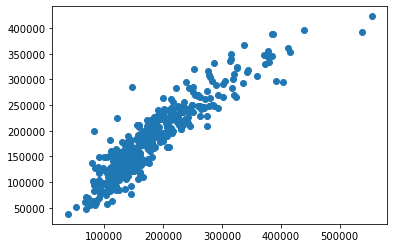

In [36]:
plt.scatter(y_test,ln_y0)

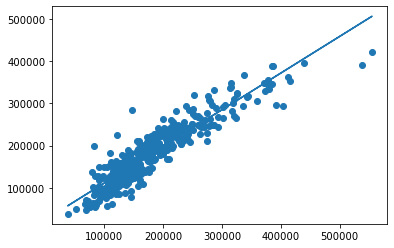

In [37]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_test, ln_y0)

def myfunc(y_test):
    return slope * y_test + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test, ln_y0)
plt.plot(y_test, mymodel)
plt.show()

In [38]:
print(slope,intercept,std_err,r,round(p))

0.8691358964948271 24302.45426134116 0.017510477307179157 0.9217576371716051 0


In [39]:
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
from termcolor import colored as cl

In [40]:
print(cl('Explained Variance Score of LR model is {}'.format(evs(y_test, ln_y0)), attrs = ['bold']))

Explained Variance Score of LR model is 0.8491896548447839


In [41]:
print(cl('R-Squared of LR model is {}'.format(r2(y_test, ln_y0)), attrs = ['bold']))

R-Squared of LR model is 0.8490440337840546


In [42]:
prprice.skew()

Id                      0.000000
Building_Class          1.406938
Lot_Extent              2.235772
Lot_Size               12.203438
Property_Shape         -0.609065
House_Design            0.305735
Overall_Material        0.215719
Construction_Year      -0.613700
Remodel_Year           -0.505239
Exterior2nd            -0.695057
Exterior_Material      -1.832057
Basement_Height        -1.195582
BsmtFinType1           -0.028246
BsmtFinSF1              1.687498
BsmtUnfSF               0.919485
Total_Basement_Area     1.524923
First_Floor_Area        1.376856
Second_Floor_Area       0.811989
Grade_Living_Area       1.365502
Fireplaces              0.648580
Garage_Finish_Year     -0.225373
Garage_Area             0.028702
W_Deck_Area            -0.046889
Open_Lobby_Area        -0.071552
Enclosed_Lobby_Area    -0.044955
Year_Sold               0.096521
Sale_Price              1.881760
dtype: float64

# Data Visualization

# 1) Heatmap

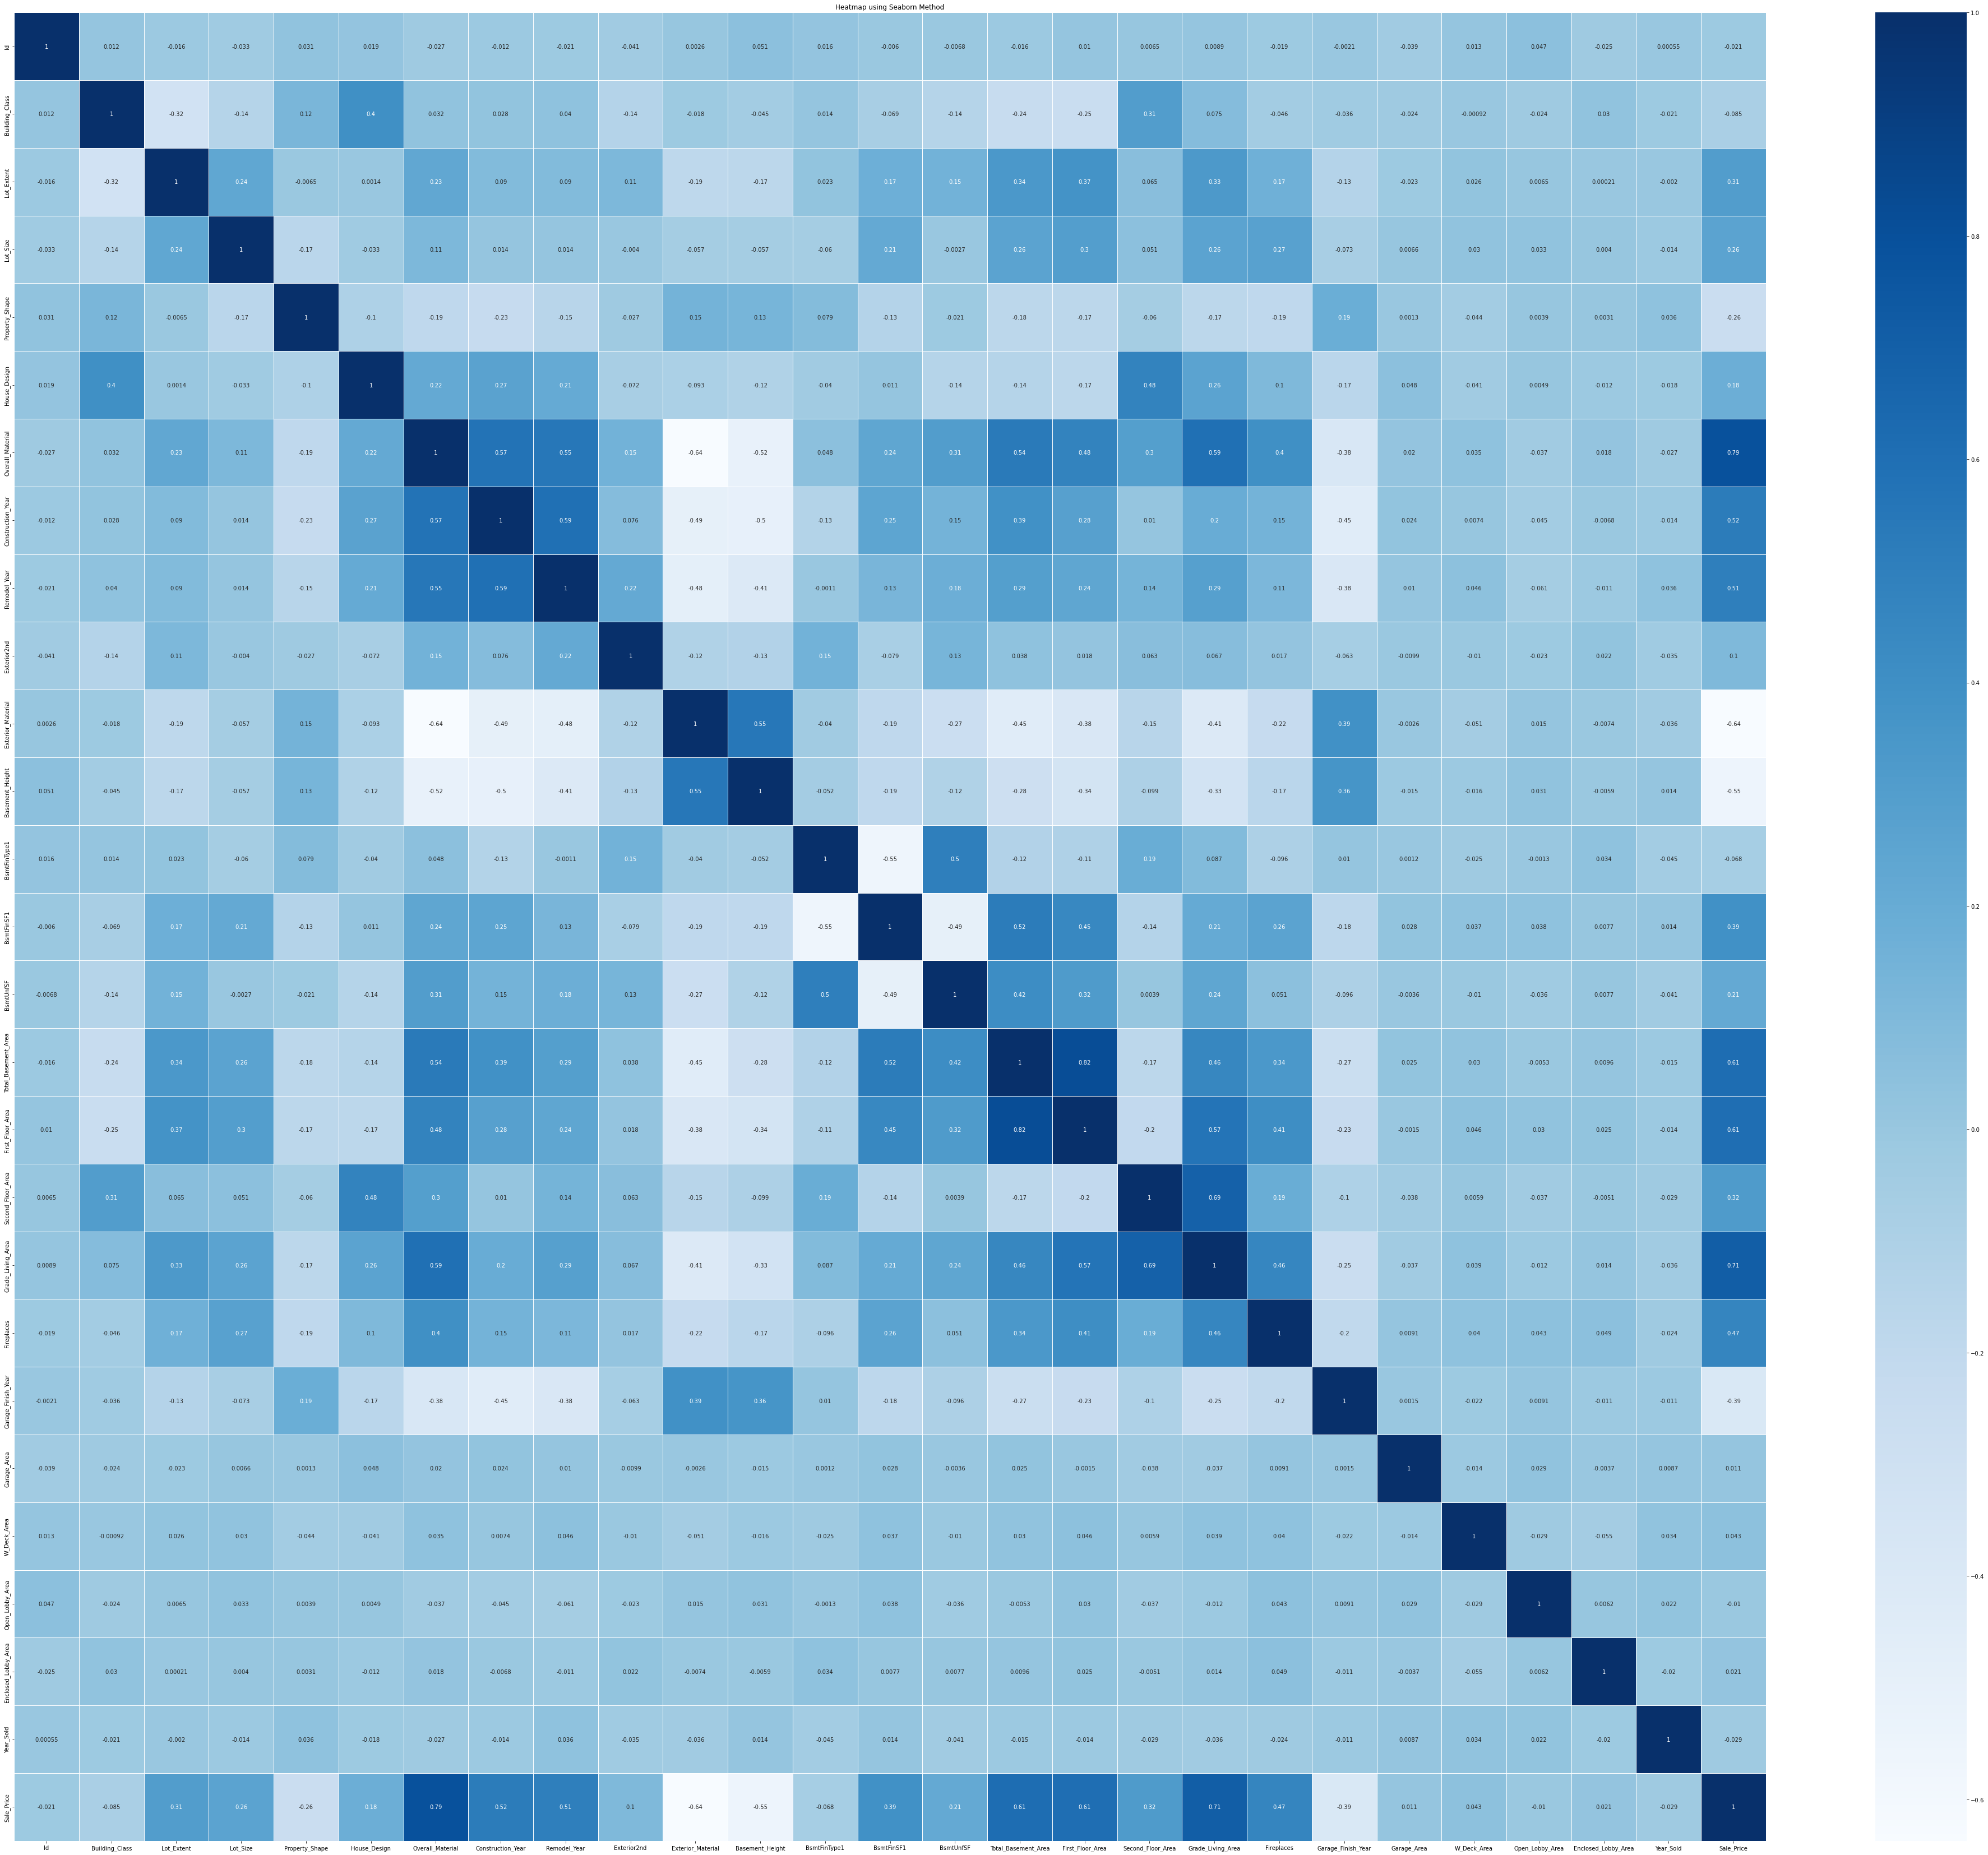

In [44]:
ng=prprice.corr()
plt.figure(figsize=(70,60))
heatmap=sns.heatmap(ng,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using Seaborn Method")
plt.show()

## 2) Scatter plot

In [45]:
#sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size


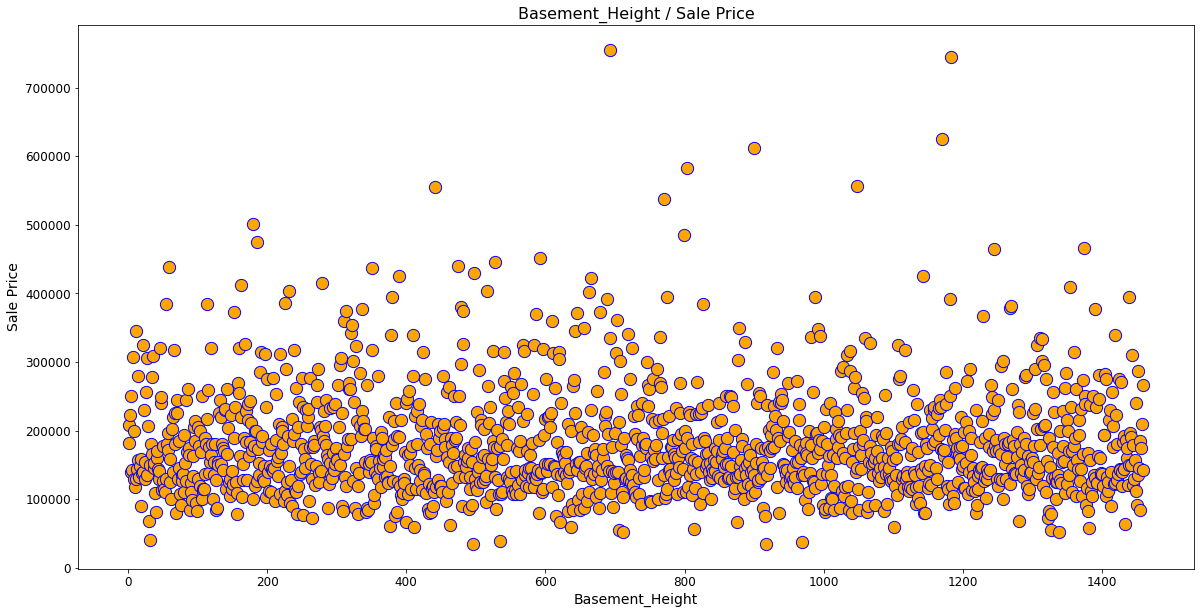

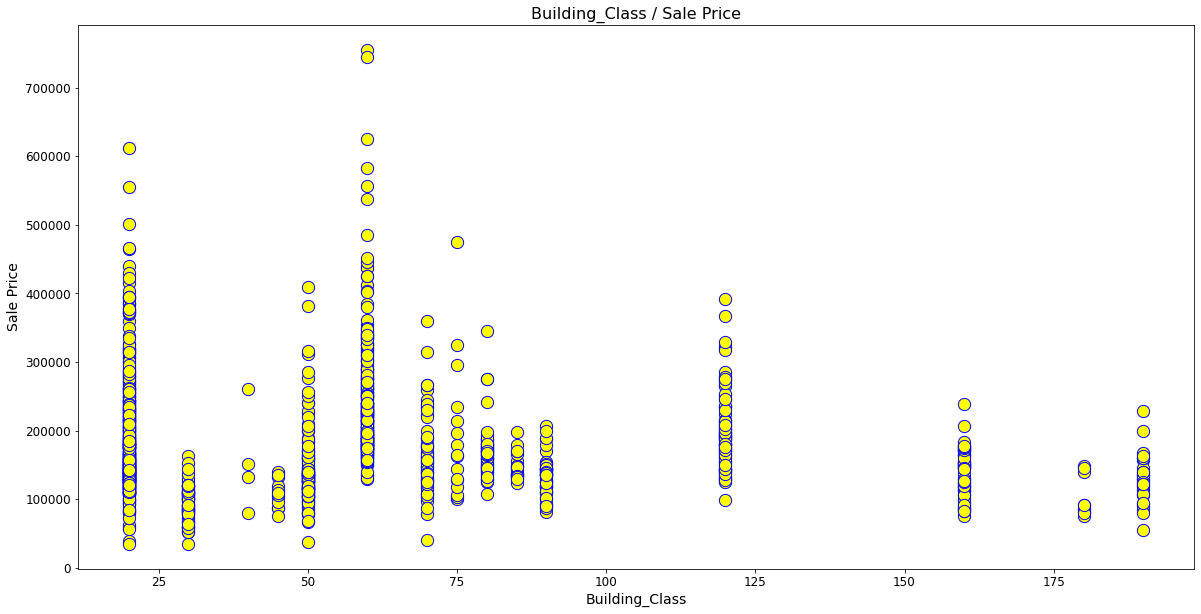

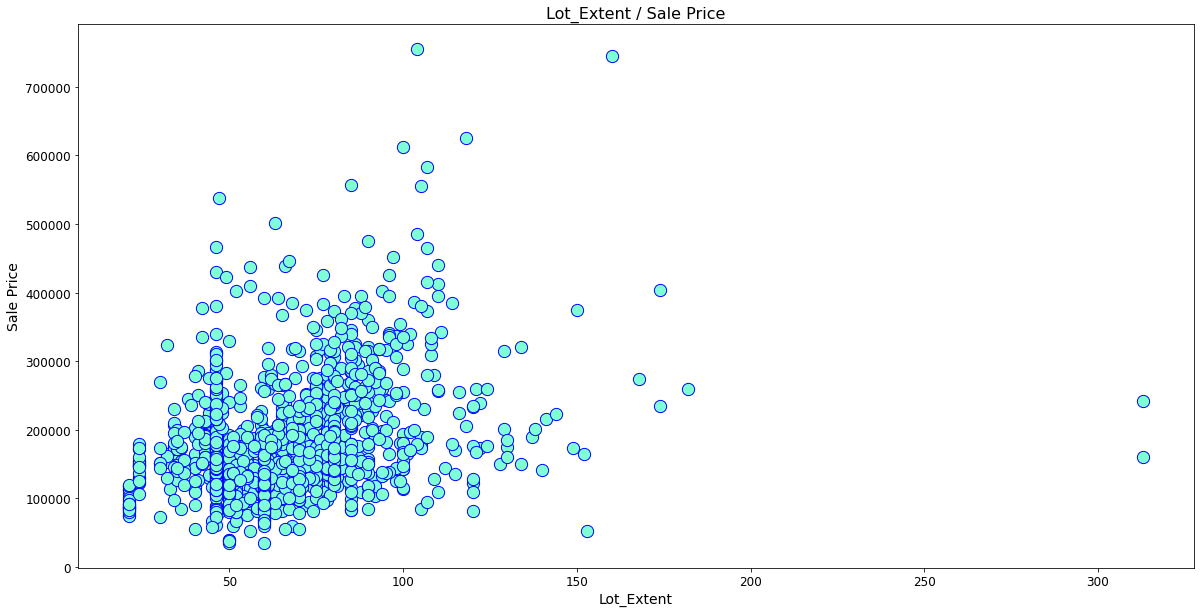

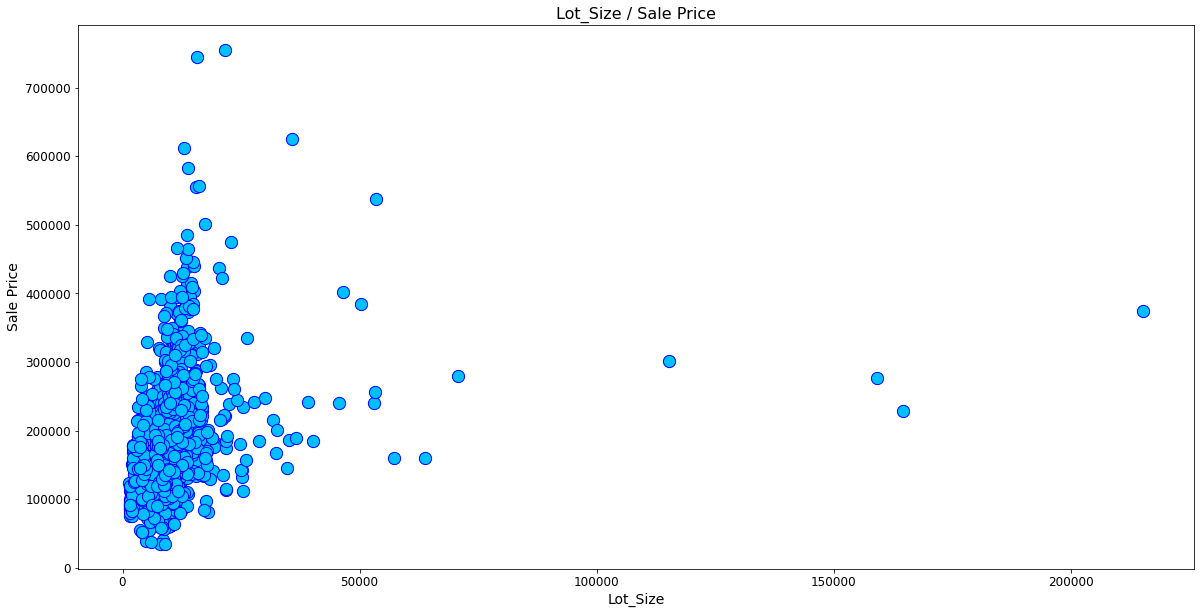

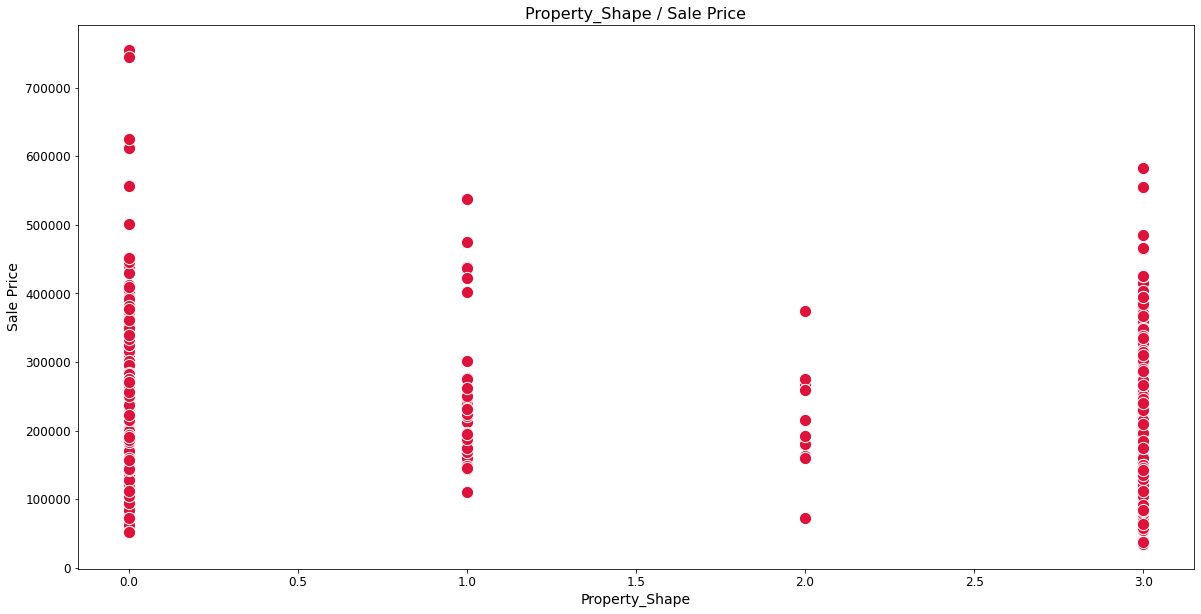

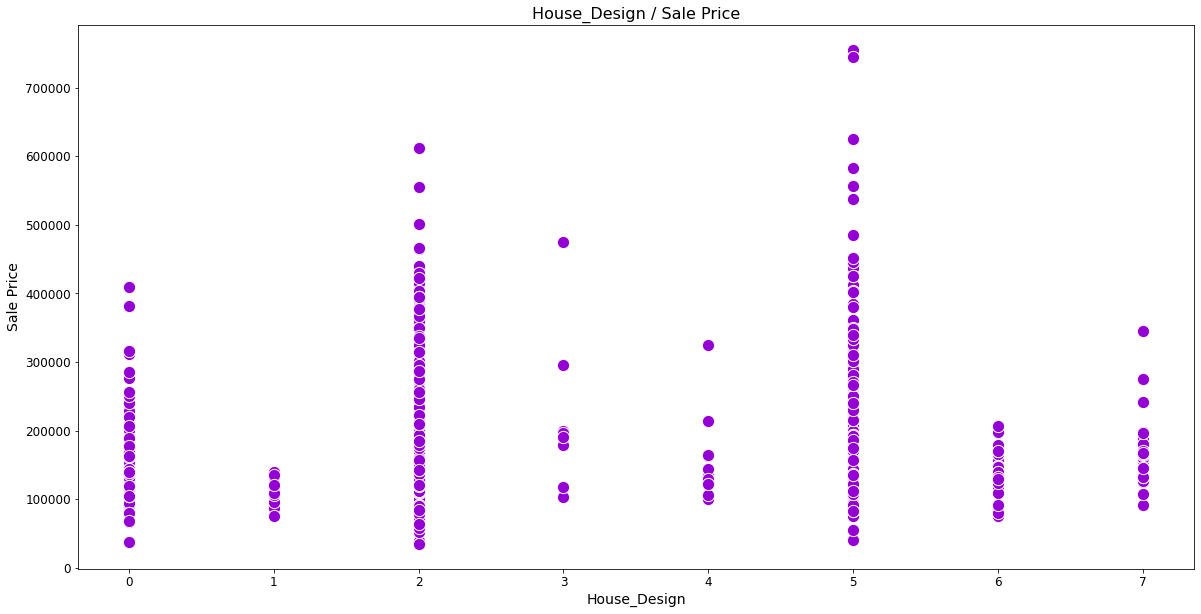

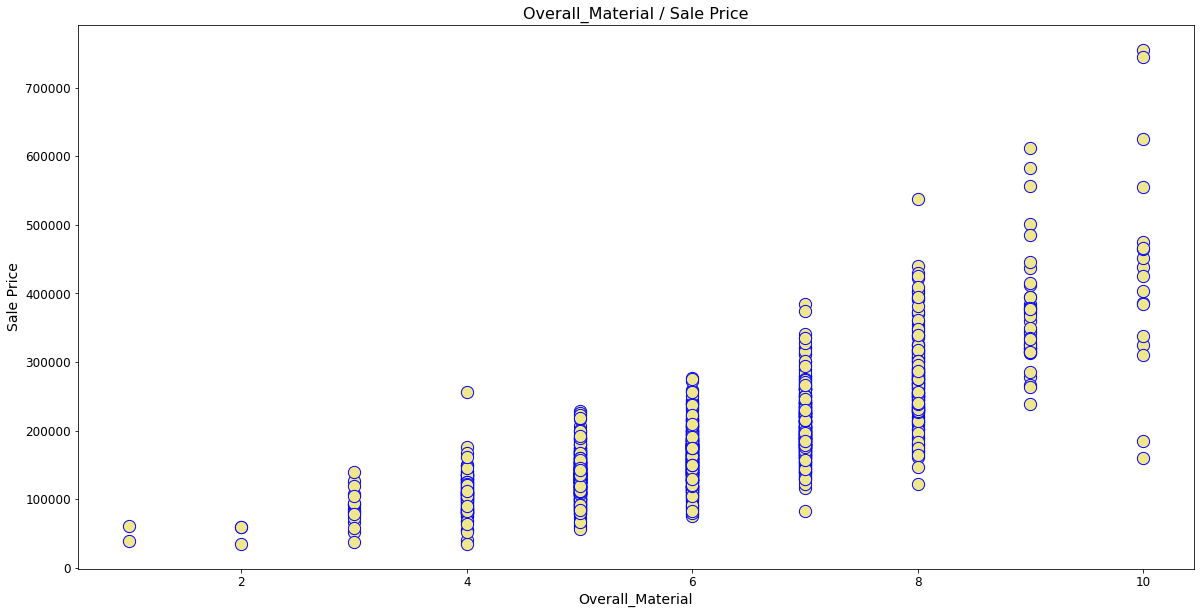

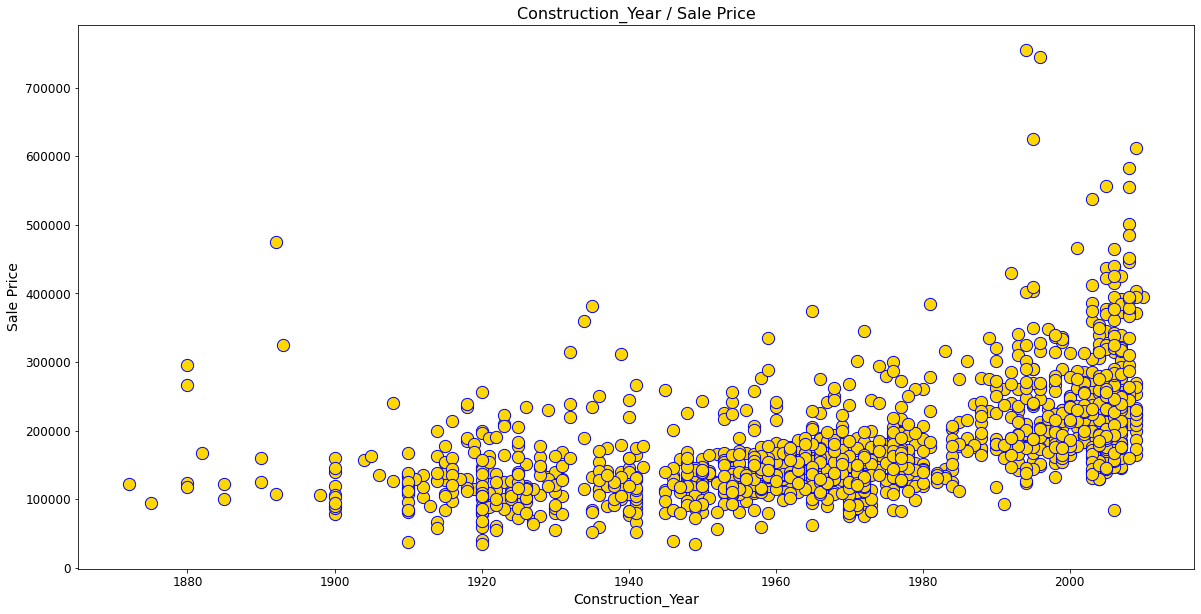

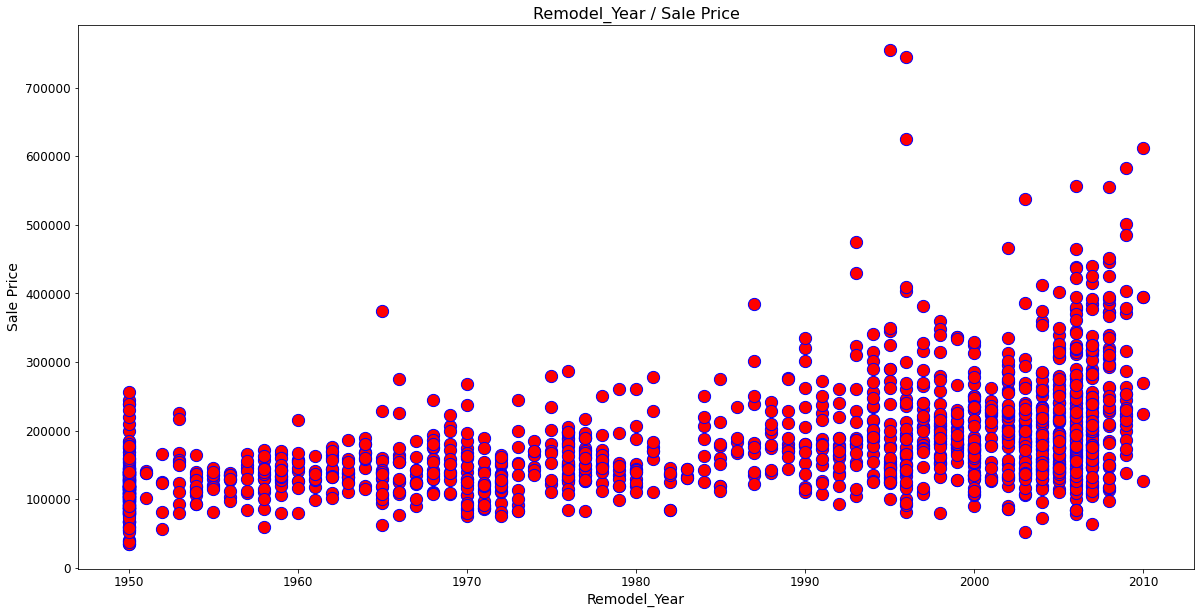

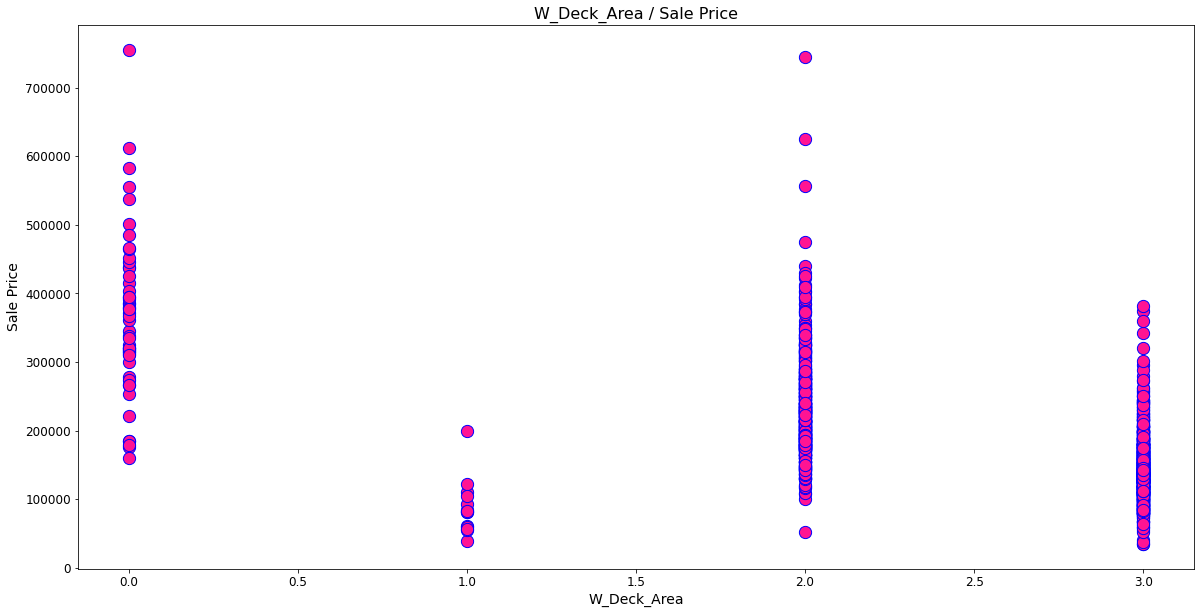

In [46]:

def scatter_prprice(y_var):
    scatter_prprice = prprice.drop(y_var, axis = 1)
    i = prprice.columns
    plot1 = sns.scatterplot(i[0], 
                           y_var, 
                           data = prprice, 
                           color = 'orange', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[11]), fontsize = 16)
    plt.xlabel('{}'.format(i[11]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sns.scatterplot(i[1], y_var, 
                           data = prprice, 
                           color = 'yellow', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sns.scatterplot(i[2], 
                           y_var, 
                           data = prprice, 
                           color = 'aquamarine', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sns.scatterplot(i[3], 
                           y_var, 
                           data = prprice, 
                           color = 'deepskyblue', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sns.scatterplot(i[4], 
                           y_var, 
                           data = prprice, 
                           color = 'crimson', 
                           edgecolor = 'white', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sns.scatterplot(i[5], 
                           y_var, 
                           data = prprice, 
                           color = 'darkviolet', 
                           edgecolor = 'white', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sns.scatterplot(i[6], 
                           y_var, 
                           data = prprice, 
                           color = 'khaki', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sns.scatterplot(i[7], 
                           y_var, 
                           data = prprice, 
                           color = 'gold', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sns.scatterplot(i[8], 
                           y_var, 
                           data = prprice, 
                           color = 'r', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    plot10 = sns.scatterplot(i[10], 
                            y_var, 
                            data = prprice, 
                            color = 'deeppink', 
                            edgecolor = 'b', 
                            s = 150)
    plt.title('{} / Sale Price'.format(i[22]), fontsize = 16)
    plt.xlabel('{}'.format(i[22]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
    
scatter_prprice('Sale_Price')

## 3)Distribution plot

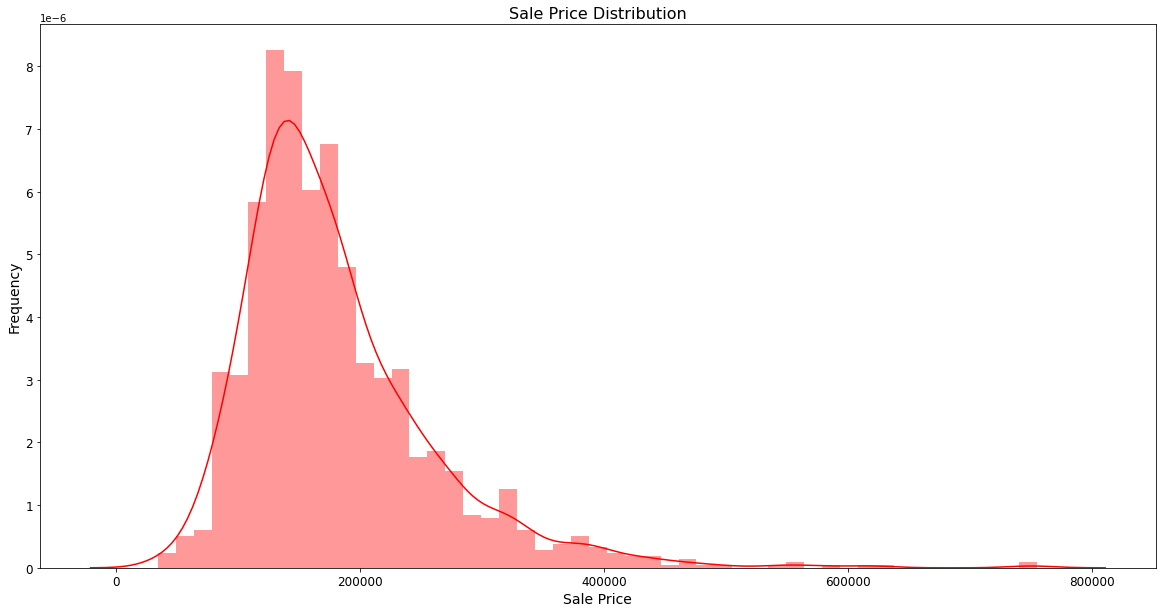

In [47]:
sns.distplot(prprice['Sale_Price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()


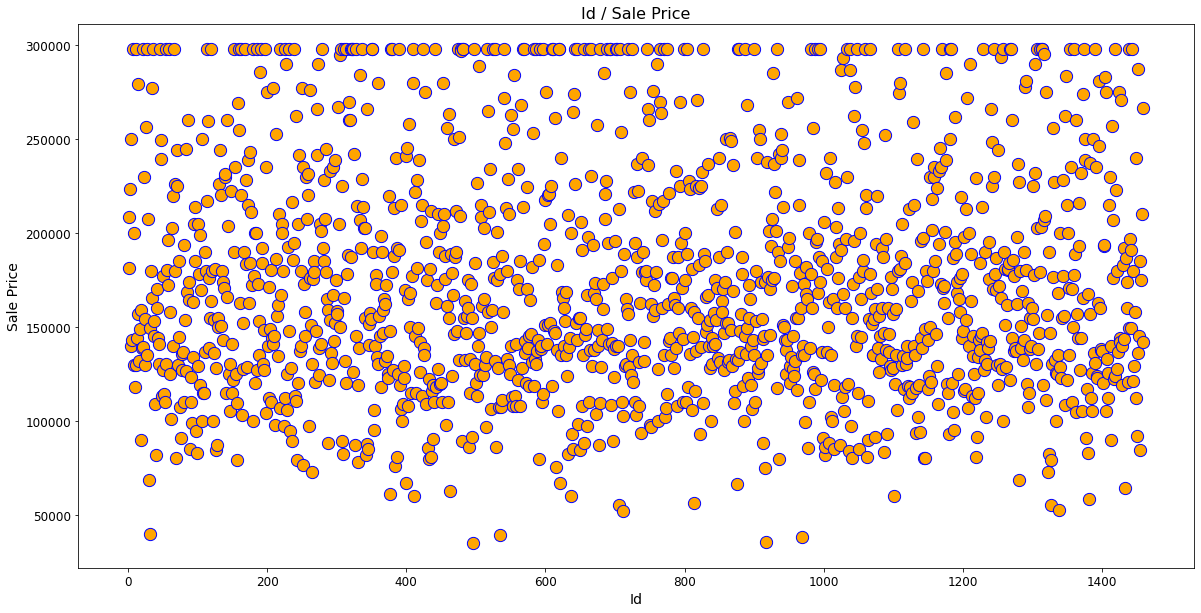

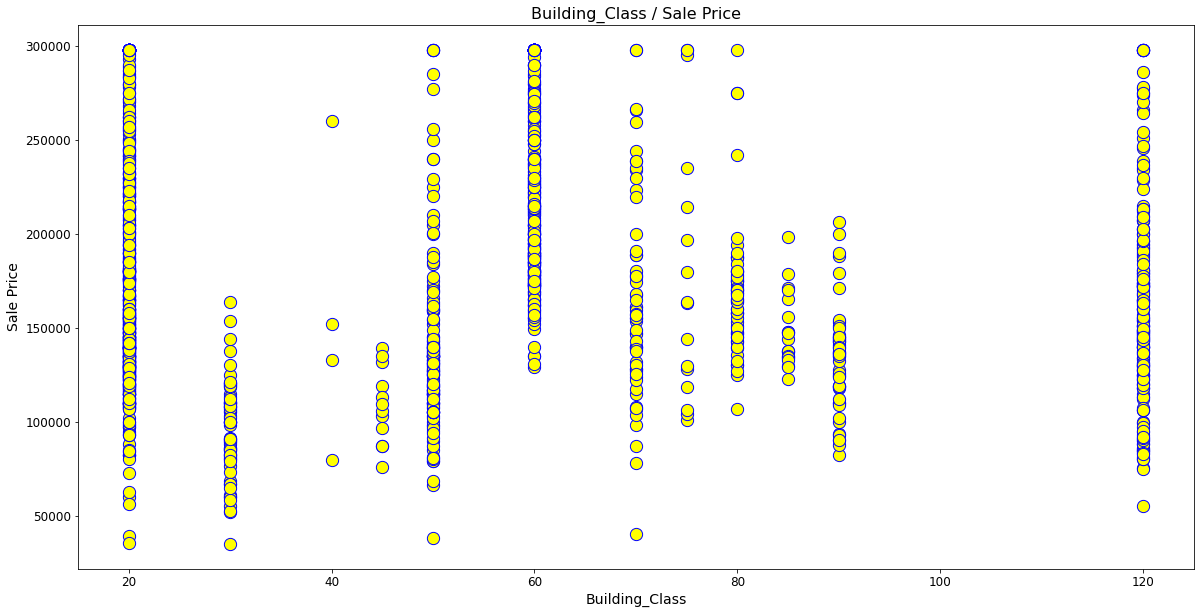

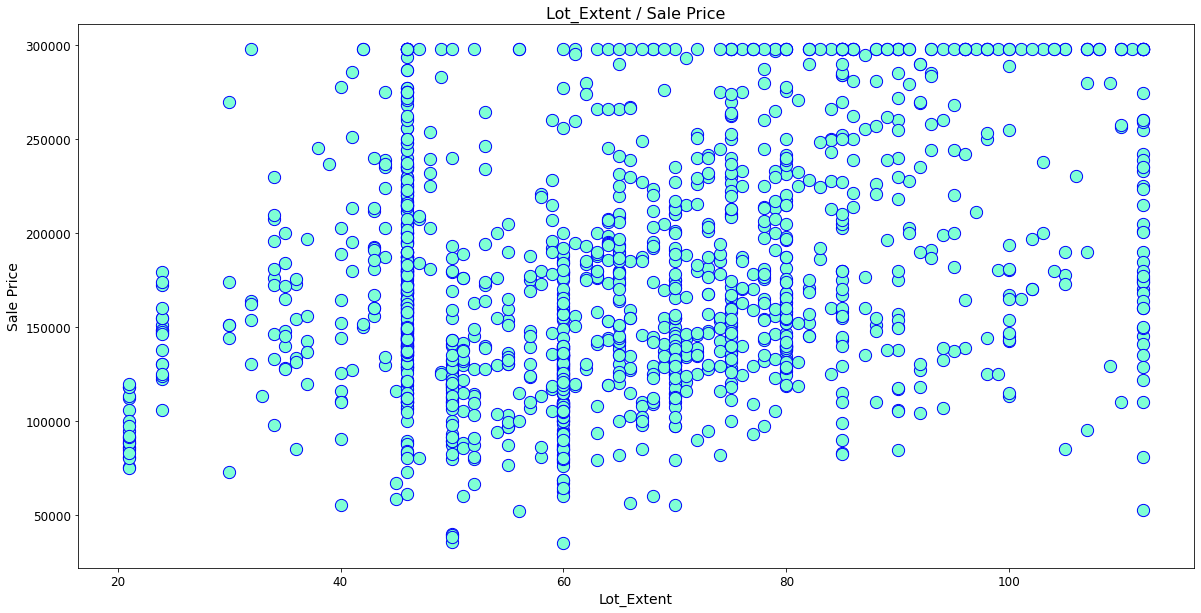

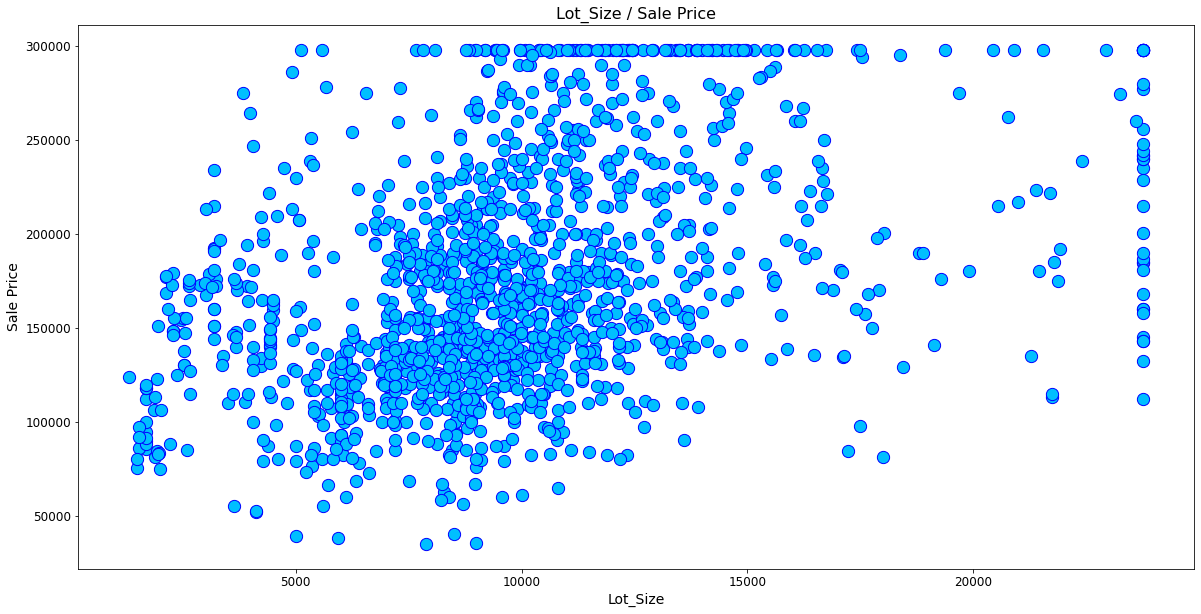

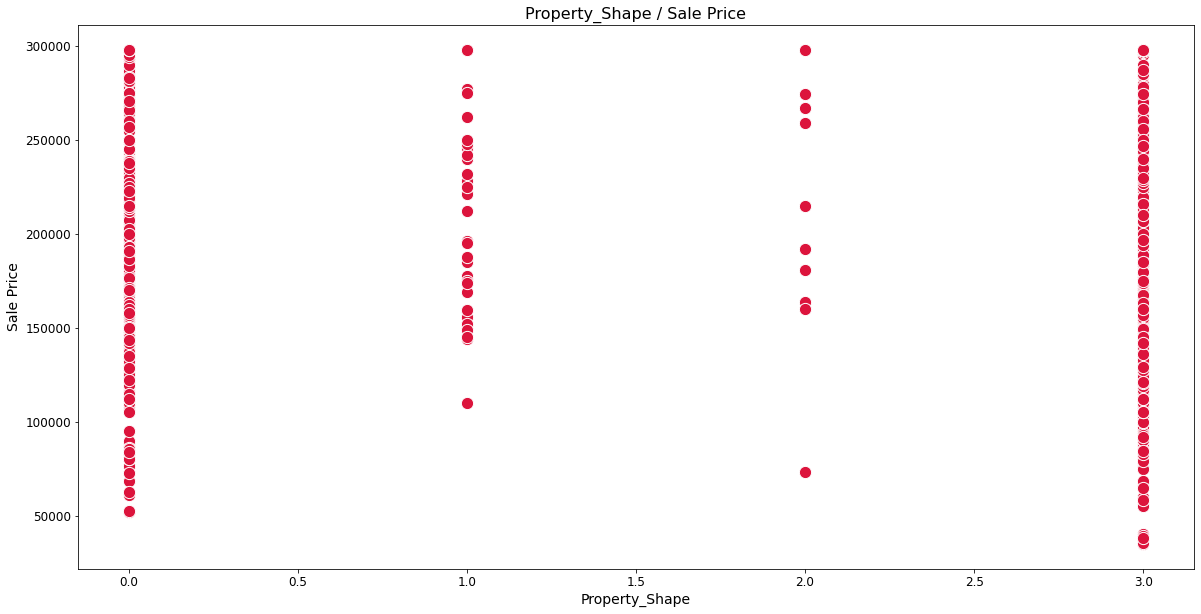

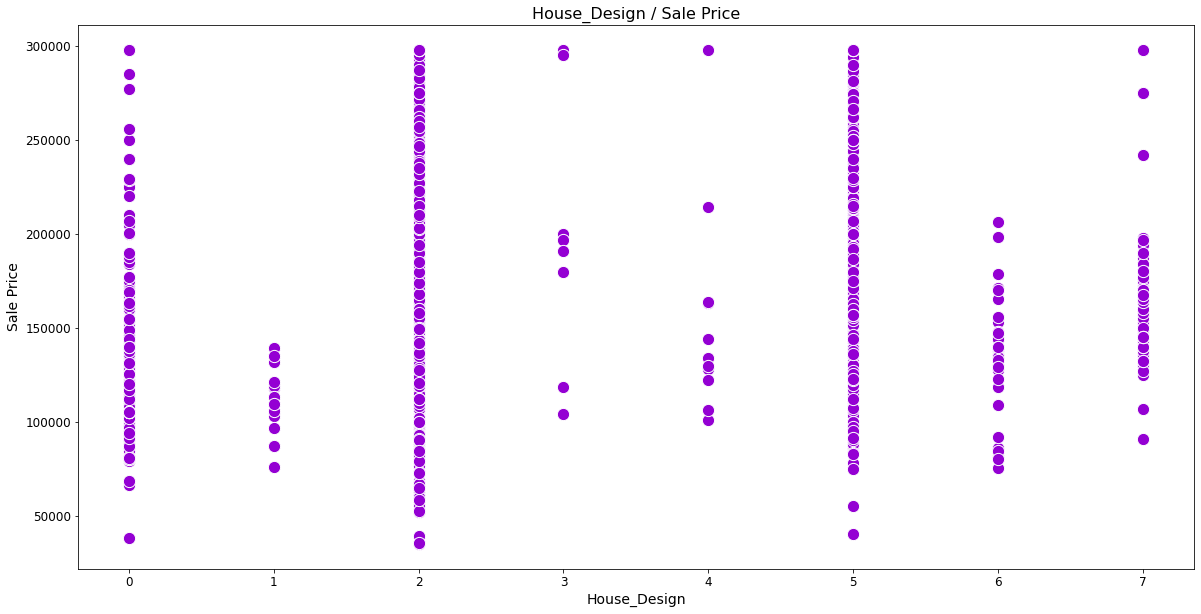

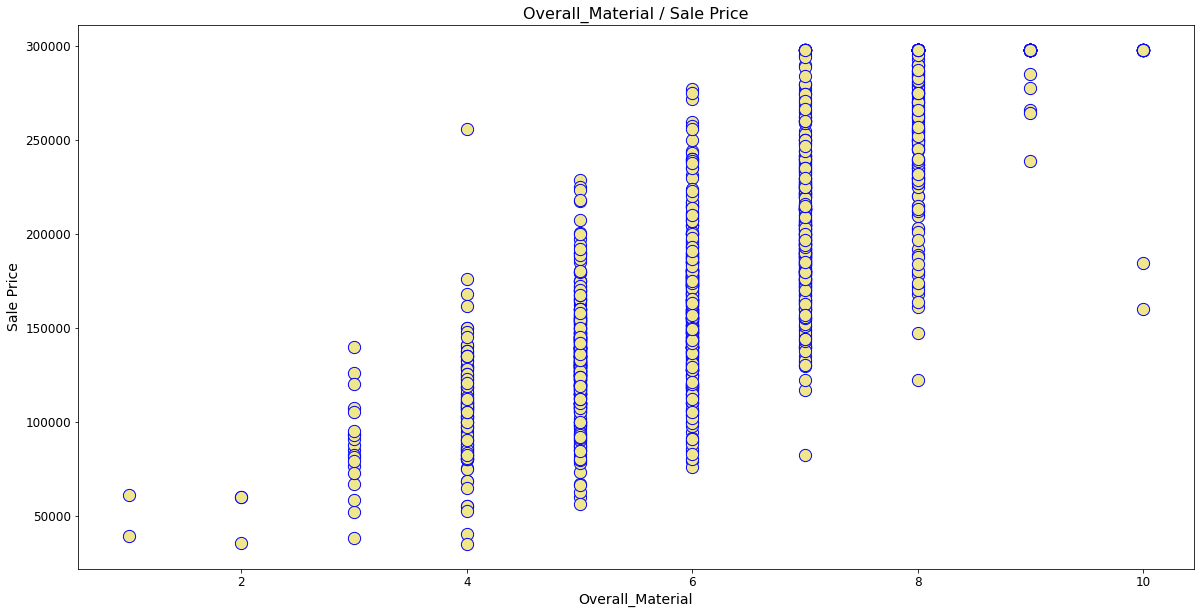

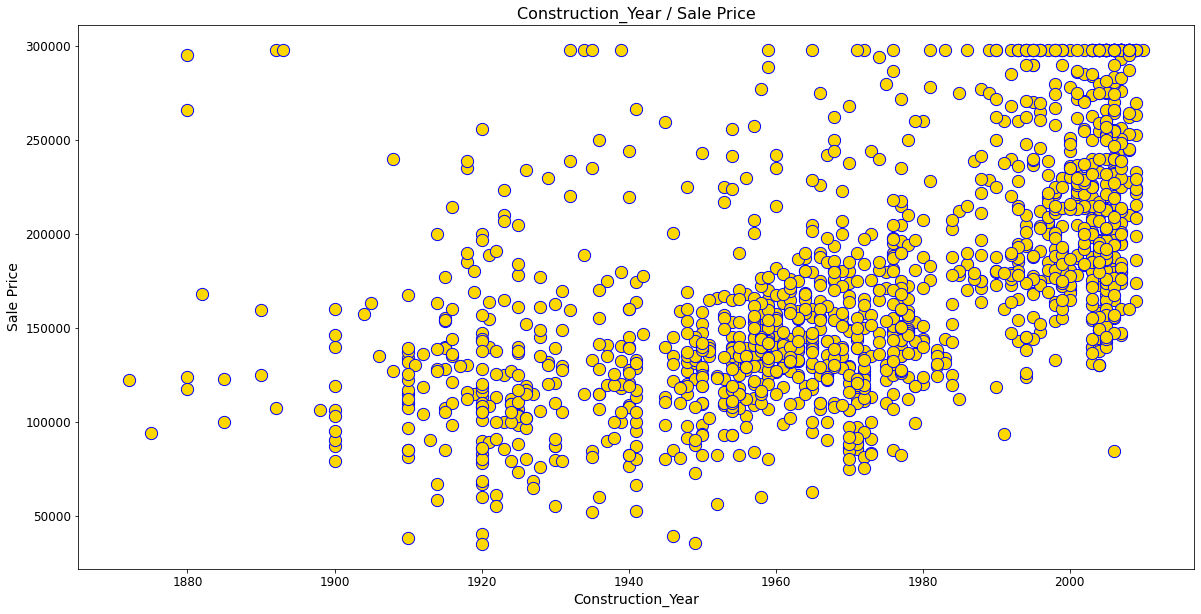

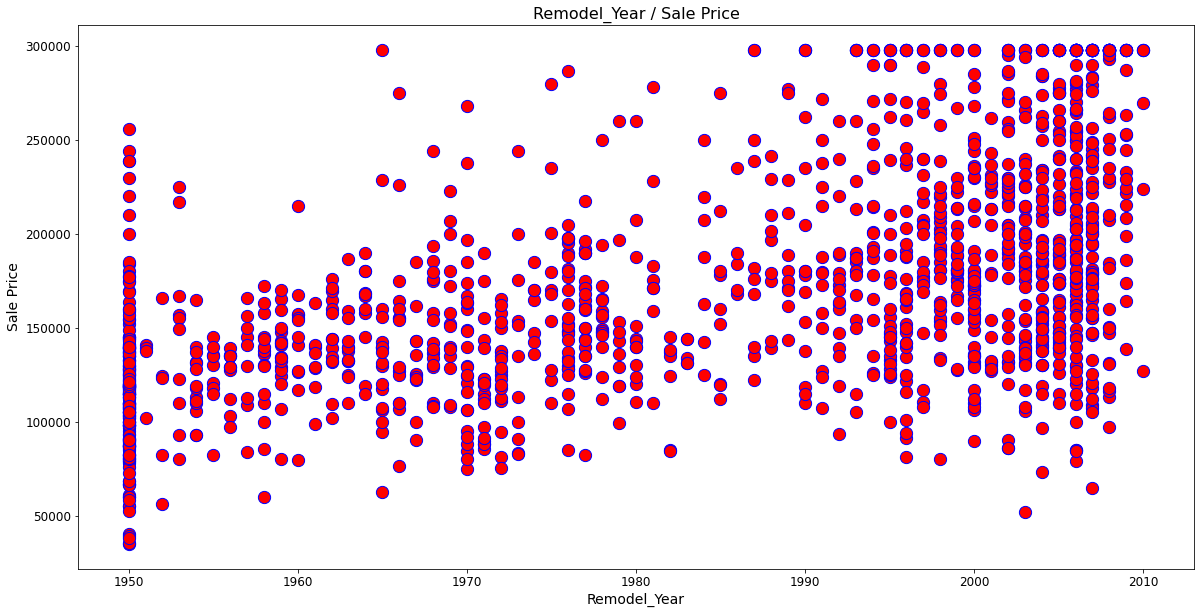

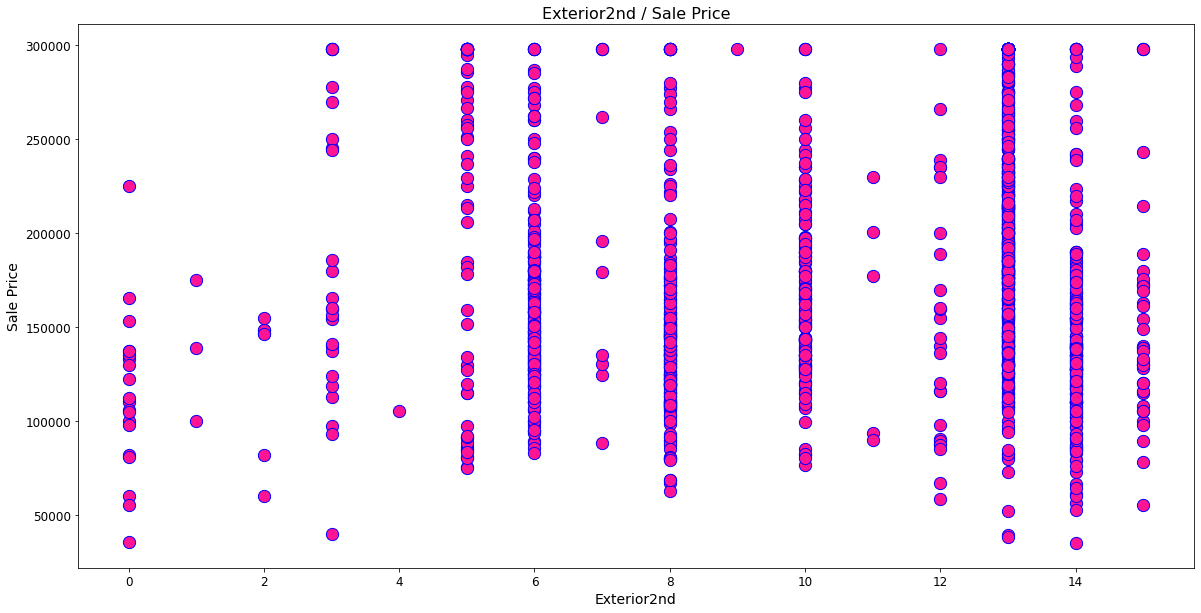

In [132]:

def scatter_prout(y_var):
    scatter_prout = prout.drop(y_var, axis = 1)
    i = prout.columns
    plot1 = sns.scatterplot(i[0], 
                           y_var, 
                           data = prout, 
                           color = 'orange', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sns.scatterplot(i[1], y_var, 
                           data = prout, 
                           color = 'yellow', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sns.scatterplot(i[2], 
                           y_var, 
                           data = prout, 
                           color = 'aquamarine', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sns.scatterplot(i[3], 
                           y_var, 
                           data = prout, 
                           color = 'deepskyblue', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sns.scatterplot(i[4], 
                           y_var, 
                           data = prout, 
                           color = 'crimson', 
                           edgecolor = 'white', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sns.scatterplot(i[5], 
                           y_var, 
                           data = prout, 
                           color = 'darkviolet', 
                           edgecolor = 'white', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sns.scatterplot(i[6], 
                           y_var, 
                           data = prout, 
                           color = 'khaki', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sns.scatterplot(i[7], 
                           y_var, 
                           data = prout, 
                           color = 'gold', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sns.scatterplot(i[8], 
                           y_var, 
                           data = prout, 
                           color = 'r', 
                           edgecolor = 'b', 
                           s = 150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    plot10 = sns.scatterplot(i[9], 
                            y_var, 
                            data = prout, 
                            color = 'deeppink', 
                            edgecolor = 'b', 
                            s = 150)
    plt.title('{} / Sale Price'.format(i[9]), fontsize = 16)
    plt.xlabel('{}'.format(i[9]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
    
scatter_prout('Sale_Price')

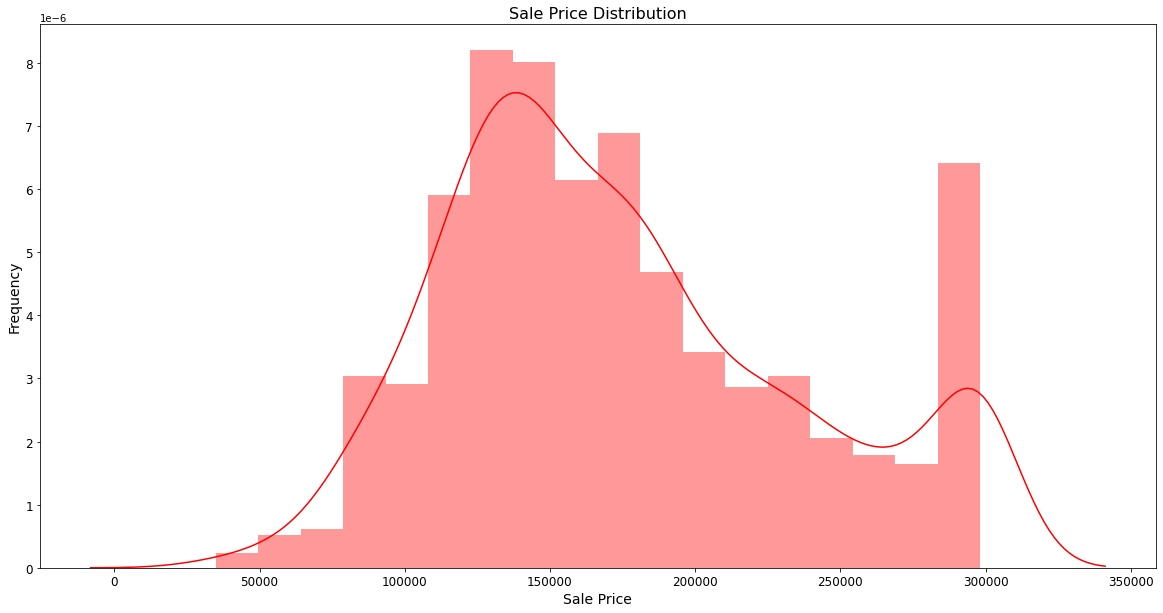

In [133]:
sns.distplot(prout['Sale_Price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

<AxesSubplot:>

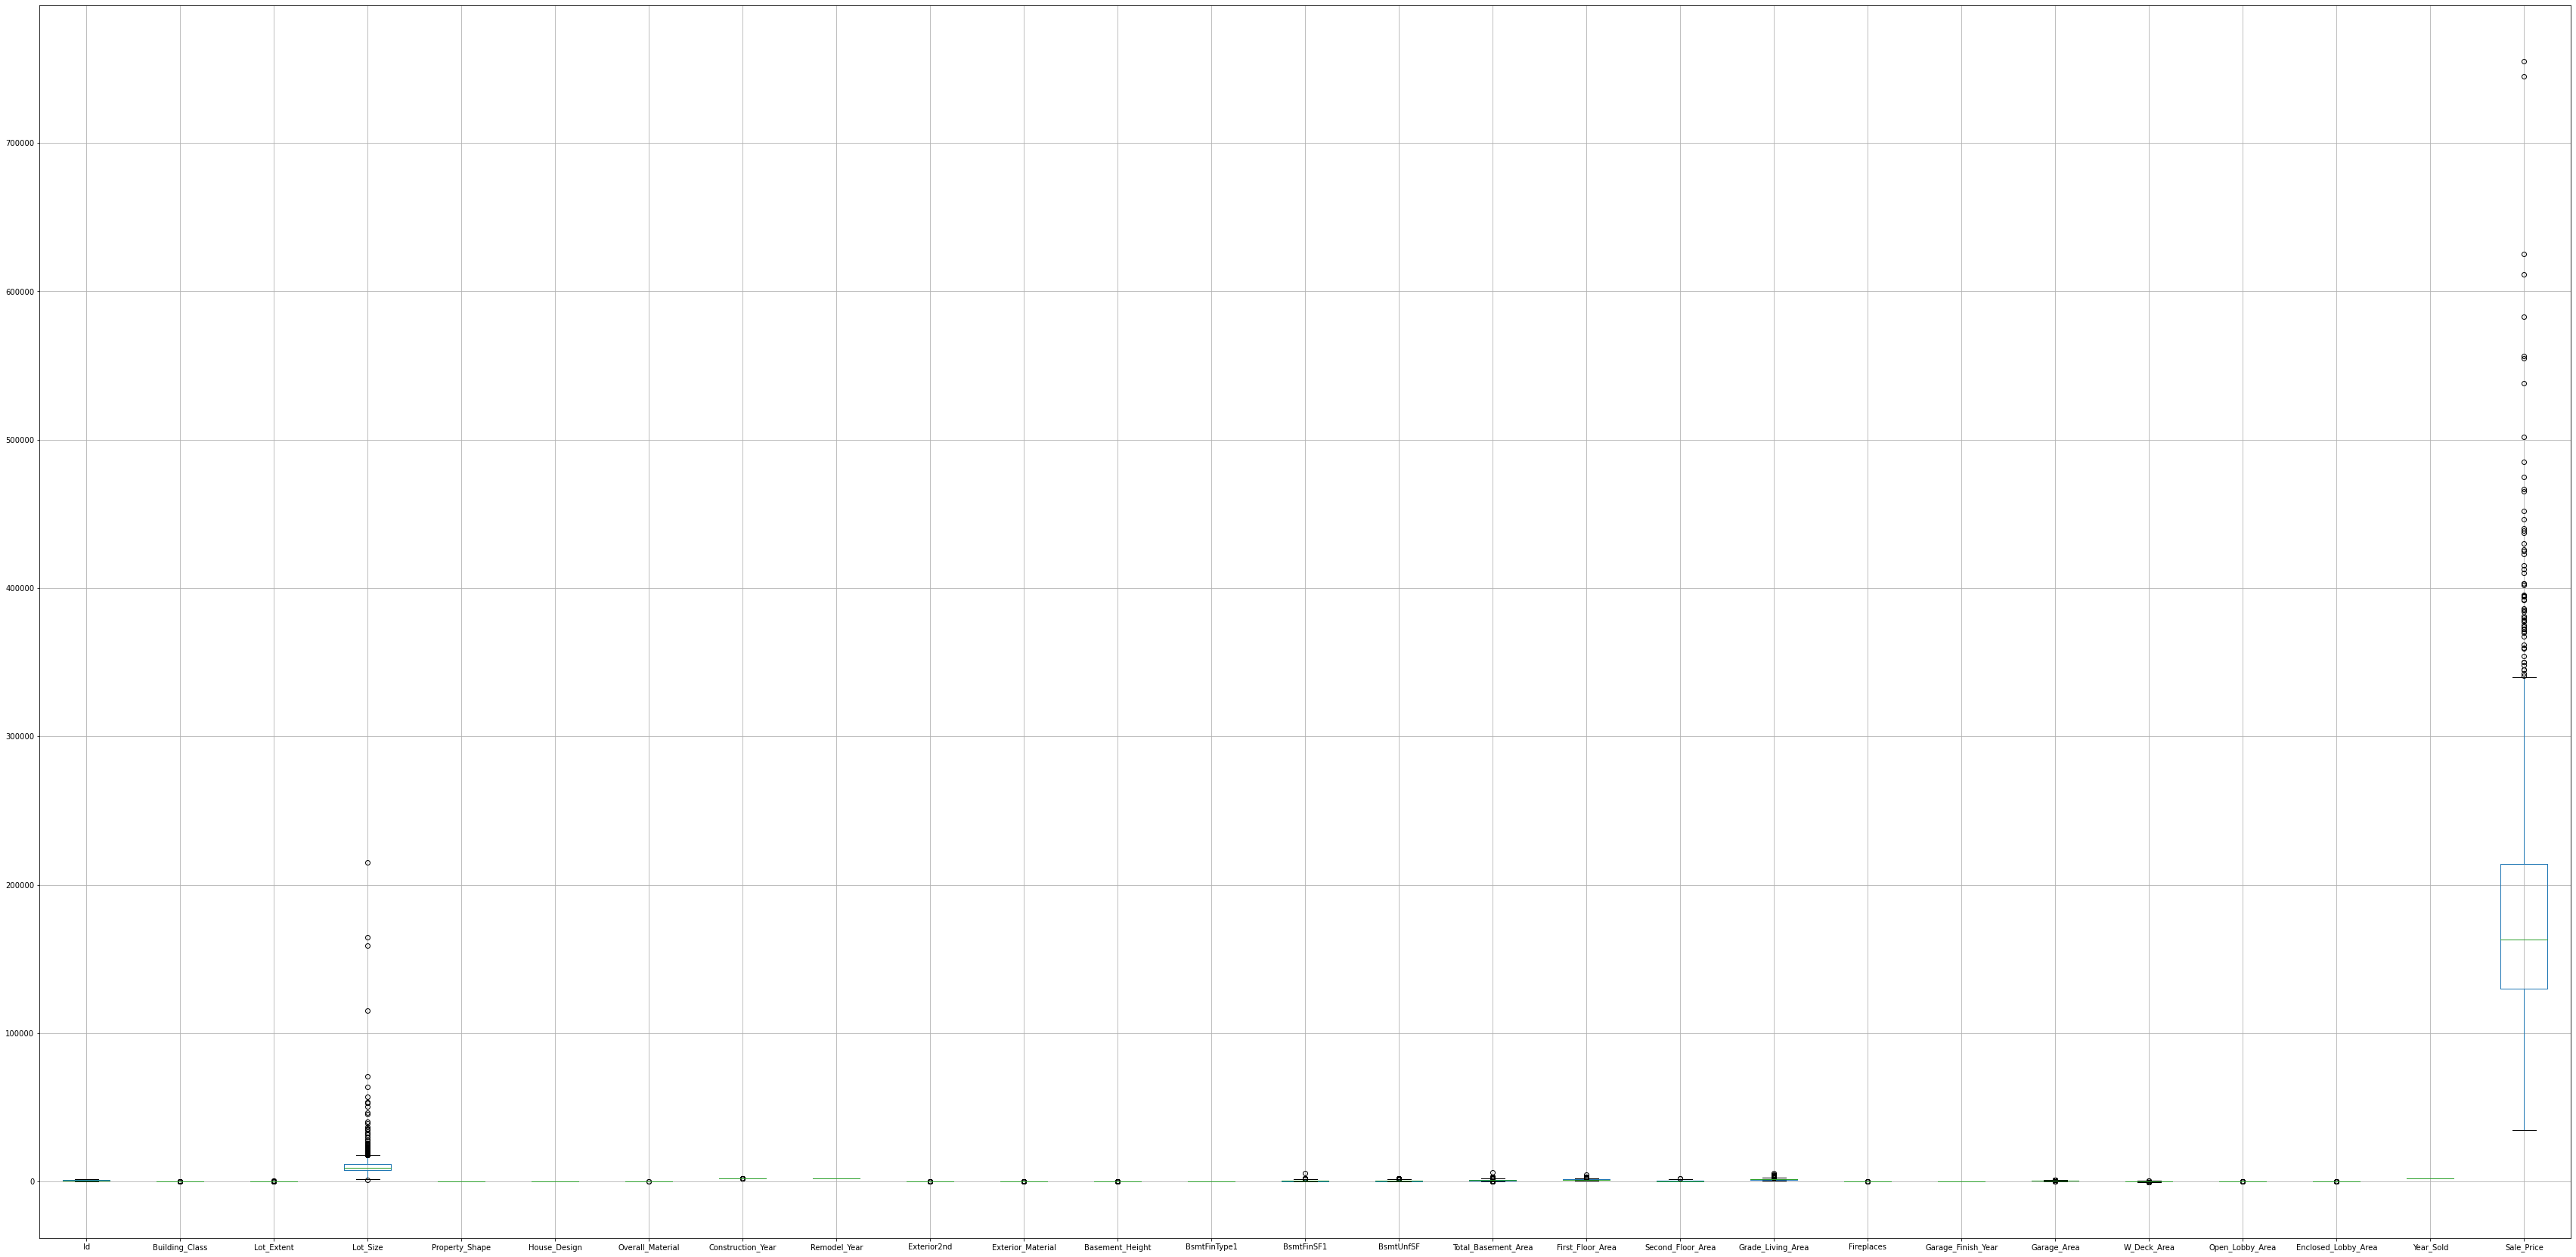

In [48]:
prprice.boxplot(figsize=(60,30))

<AxesSubplot:>

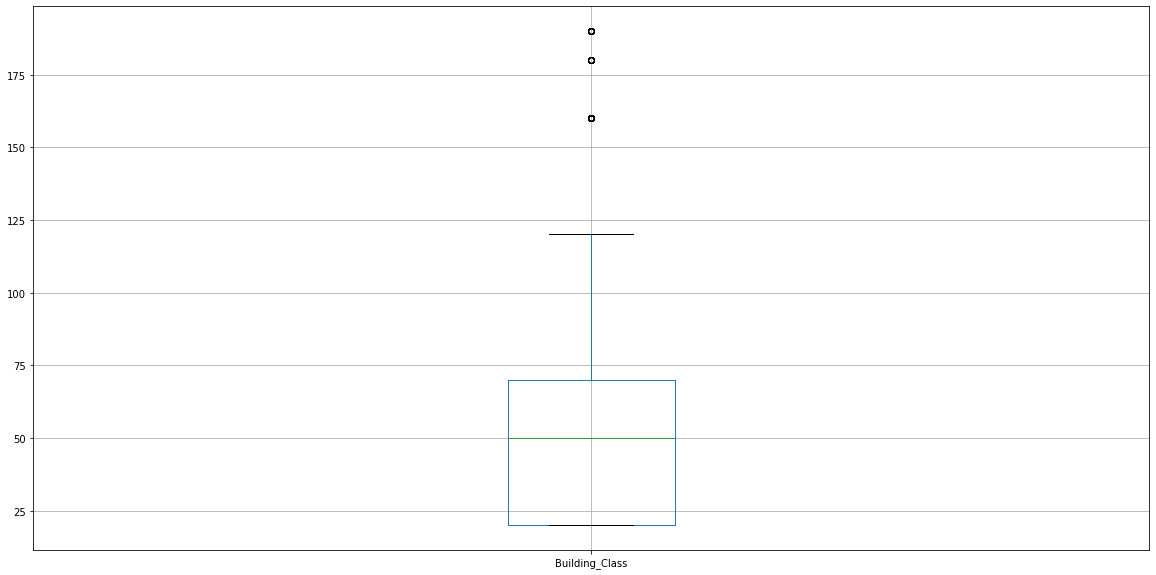

In [49]:
prprice.boxplot(column='Building_Class')

<AxesSubplot:>

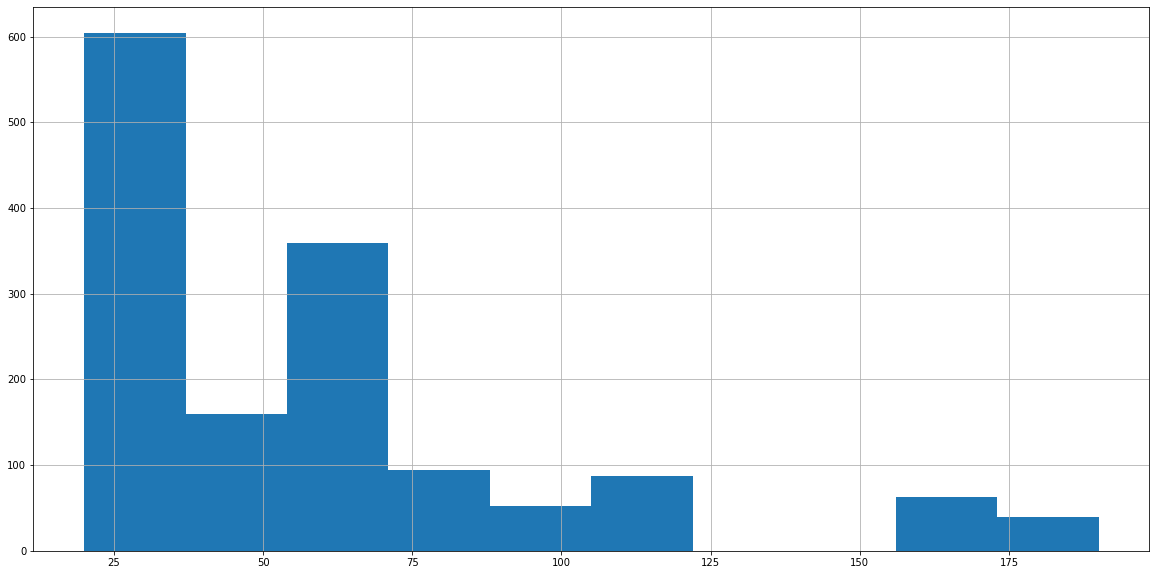

In [50]:
prprice.Building_Class.hist()

In [51]:
prprice.Building_Class.describe()

count    1459.000000
mean       56.922550
std        42.304033
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: Building_Class, dtype: float64

In [52]:
iqrB=prprice.Building_Class.quantile(0.75)-prprice.Building_Class.quantile(0.25)
iqrB

50.0

In [53]:
lowerB=prprice['Building_Class'].quantile(0.25)-(1*iqrB)
upperB=prprice['Building_Class'].quantile(0.75)+(1*iqrB)
print(lowerB,upperB)

-30.0 120.0


In [54]:
prout=prprice.copy()

In [55]:
prout.loc[prout['Building_Class']>120,'Building_Class']=120


<AxesSubplot:>

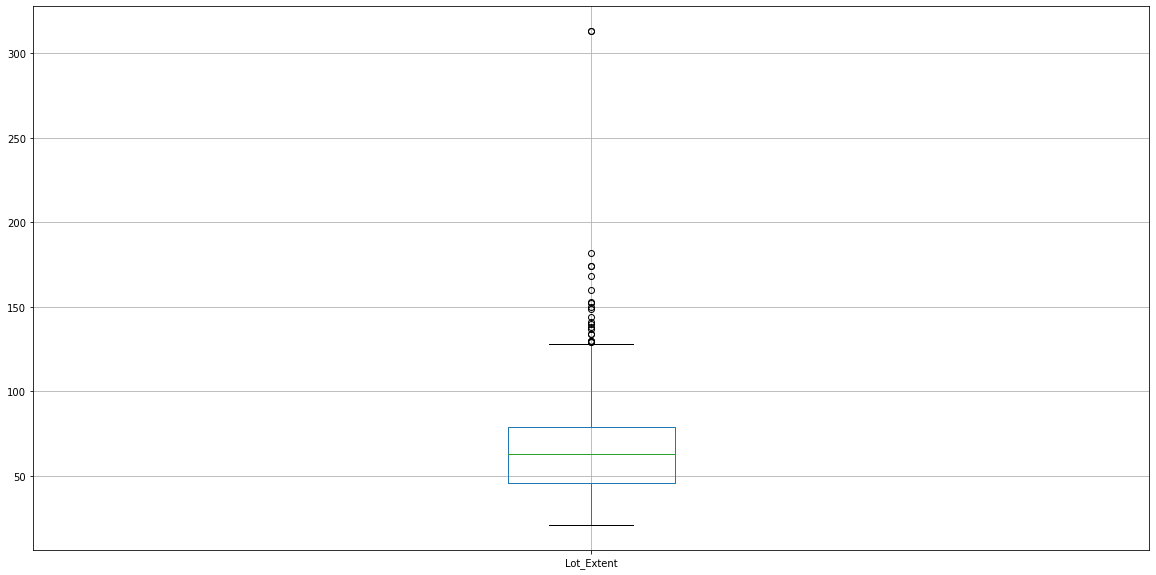

In [56]:
prprice.boxplot(column='Lot_Extent')

<AxesSubplot:>

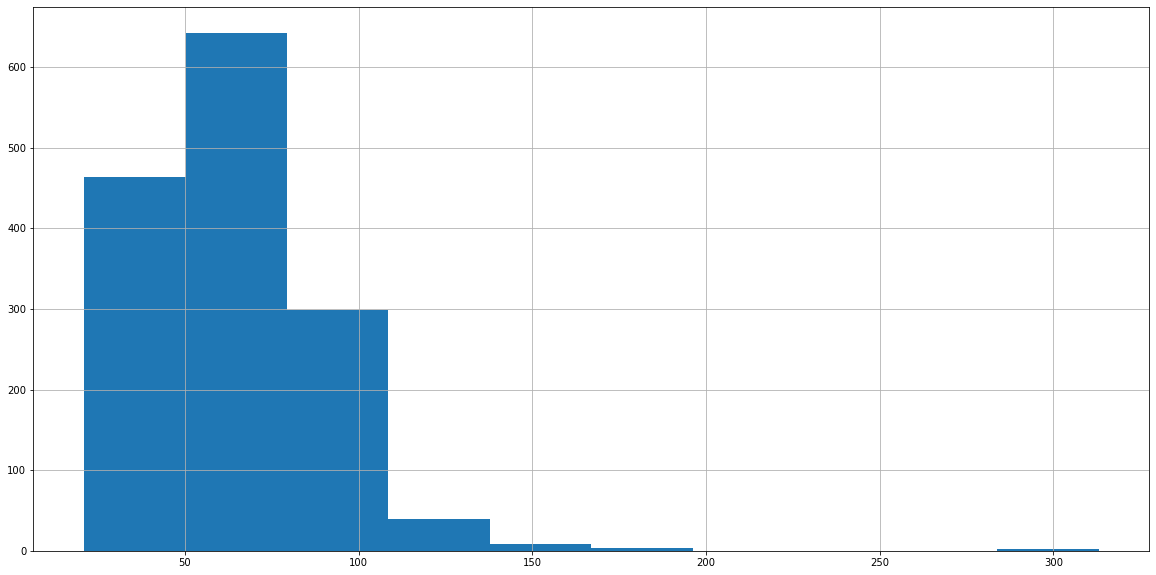

In [57]:
prprice.Lot_Extent.hist()

In [58]:
prprice.Lot_Extent.describe()

count    1459.000000
mean       65.777245
std        23.871579
min        21.000000
25%        46.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: Lot_Extent, dtype: float64

In [59]:
iqrLE=prprice.Lot_Extent.quantile(0.75)-prprice.Lot_Extent.quantile(0.25)
iqrLE

33.0

In [60]:
lowerLE=prprice['Lot_Extent'].quantile(0.25)-(1*iqrLE)
upperLE=prprice['Lot_Extent'].quantile(0.75)+(1*iqrLE)
print(lowerLE,upperLE)

13.0 112.0


In [61]:
prout.loc[prout['Lot_Extent']>112,'Lot_Extent']=112

<AxesSubplot:>

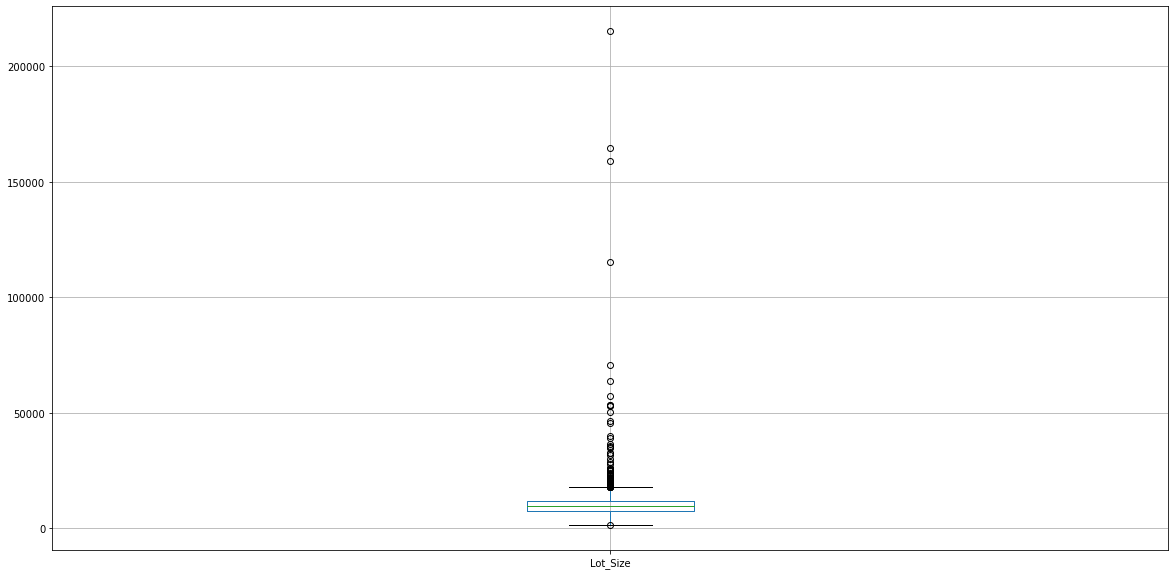

In [62]:
prprice.boxplot(column='Lot_Size')

<AxesSubplot:>

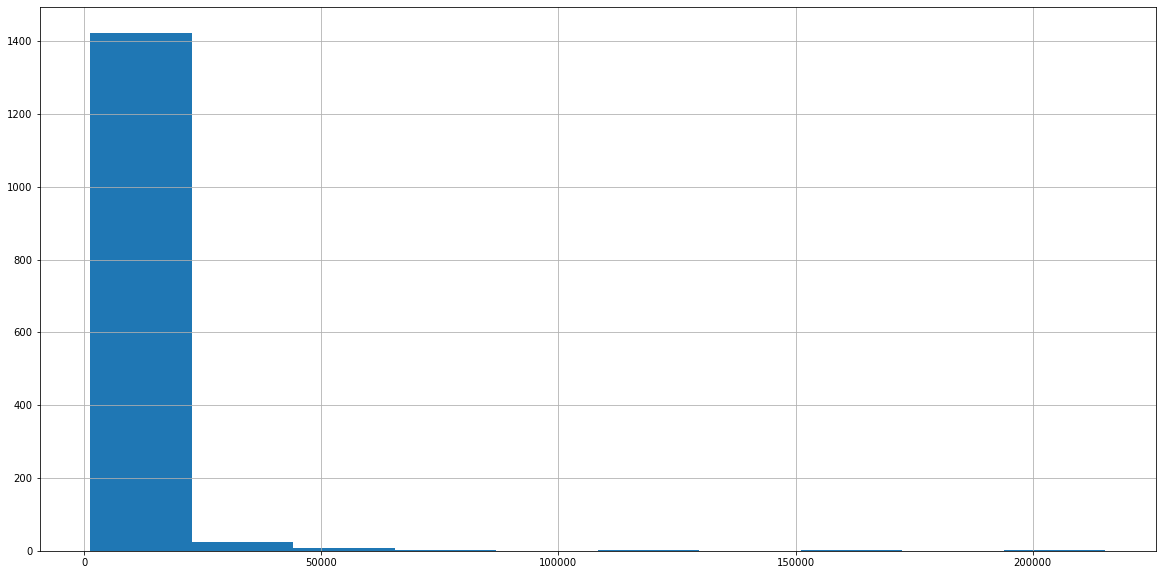

In [63]:
prprice.Lot_Size.hist()

In [64]:
prprice.Lot_Size.describe()

count      1459.000000
mean      10517.225497
std        9984.675721
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: Lot_Size, dtype: float64

In [65]:
iqrLS=prprice.Lot_Size.quantile(0.75)-prprice.Lot_Size.quantile(0.25)
iqrLS

4054.0

In [66]:
lowerLS=prprice['Lot_Size'].quantile(0.25)-(3*iqrLS)
upperLS=prprice['Lot_Size'].quantile(0.75)+(3*iqrLS)
print(lowerLS,upperLS)

-4613.0 23765.0


In [67]:
prout.loc[prout['Lot_Size']>23765,'Lot_Size']=23765

<AxesSubplot:>

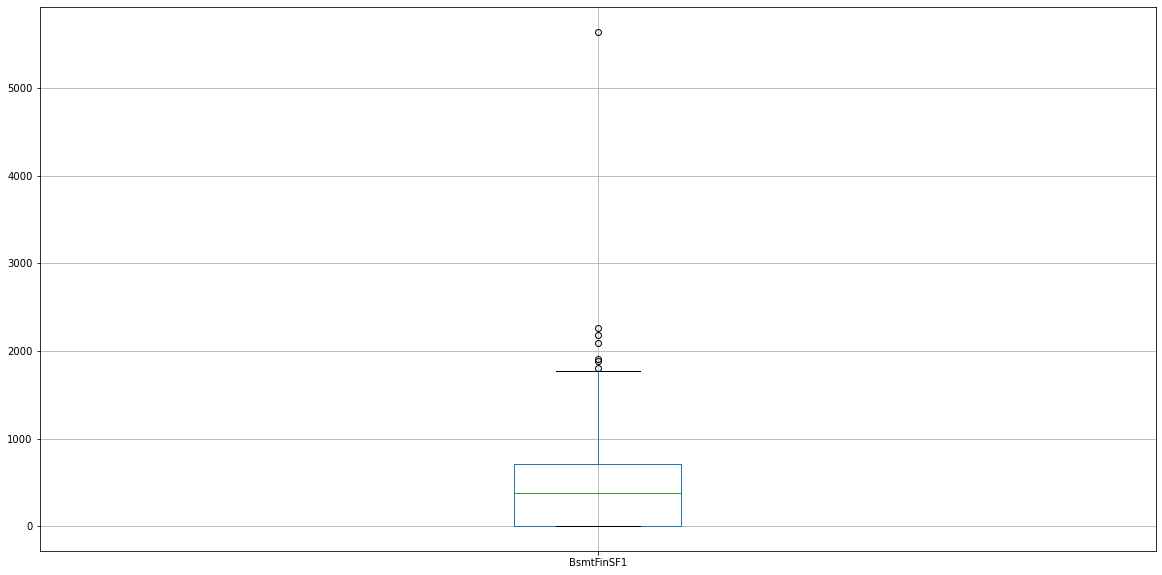

In [68]:
prprice.boxplot(column='BsmtFinSF1')

<AxesSubplot:>

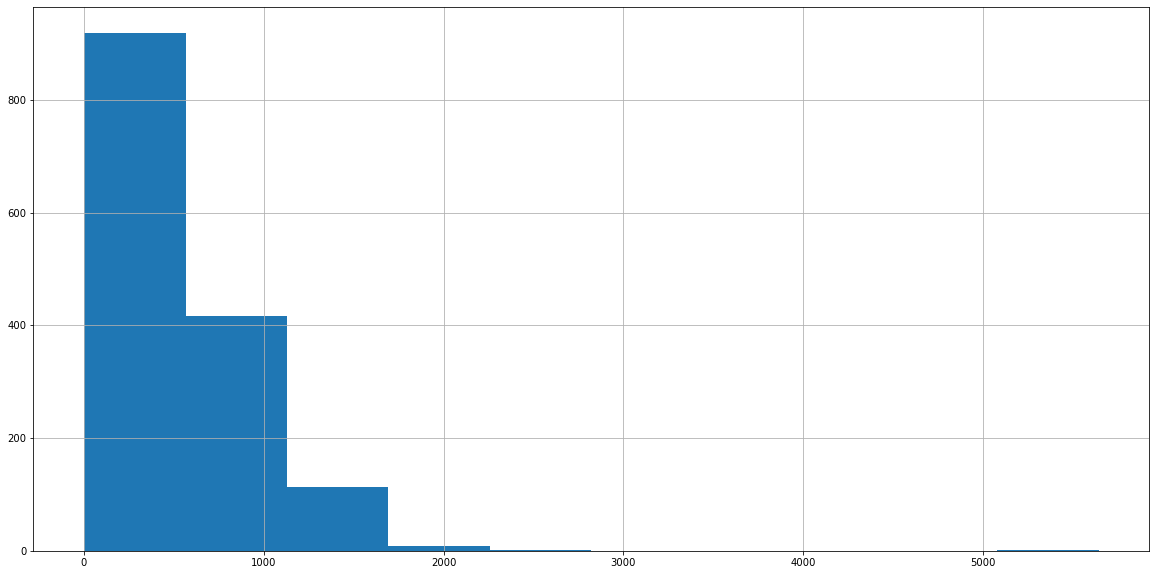

In [69]:
prprice.BsmtFinSF1.hist()

In [70]:
prprice.BsmtFinSF1.describe()

count    1459.000000
mean      443.374914
std       456.142186
min         0.000000
25%         0.000000
50%       383.000000
75%       712.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [71]:
iqrBsF=prprice.BsmtFinSF1.quantile(0.75)-prprice.BsmtFinSF1.quantile(0.25)
iqrBsF

712.0

In [72]:
lowerBsF=prprice['BsmtFinSF1'].quantile(0.25)-(1*iqrBsF)
upperBsF=prprice['BsmtFinSF1'].quantile(0.75)+(1*iqrBsF)
print(lowerBsF,upperBsF)

-712.0 1424.0


In [73]:
prout.loc[prout['BsmtFinSF1']>1424,'BsmtFinSF1']=1424

<AxesSubplot:>

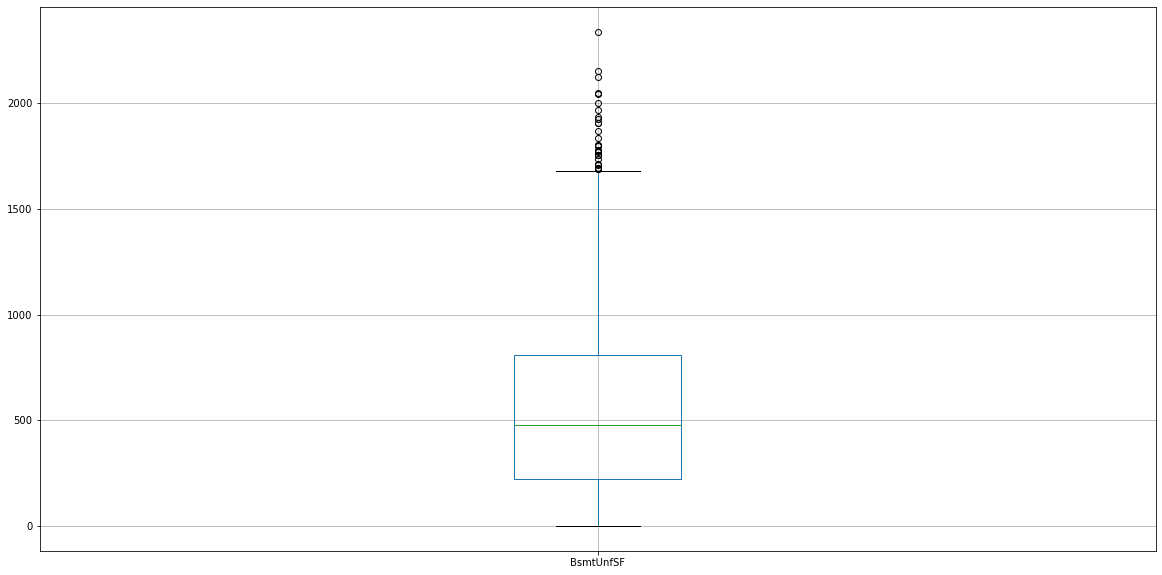

In [74]:
prprice.boxplot(column='BsmtUnfSF')

<AxesSubplot:>

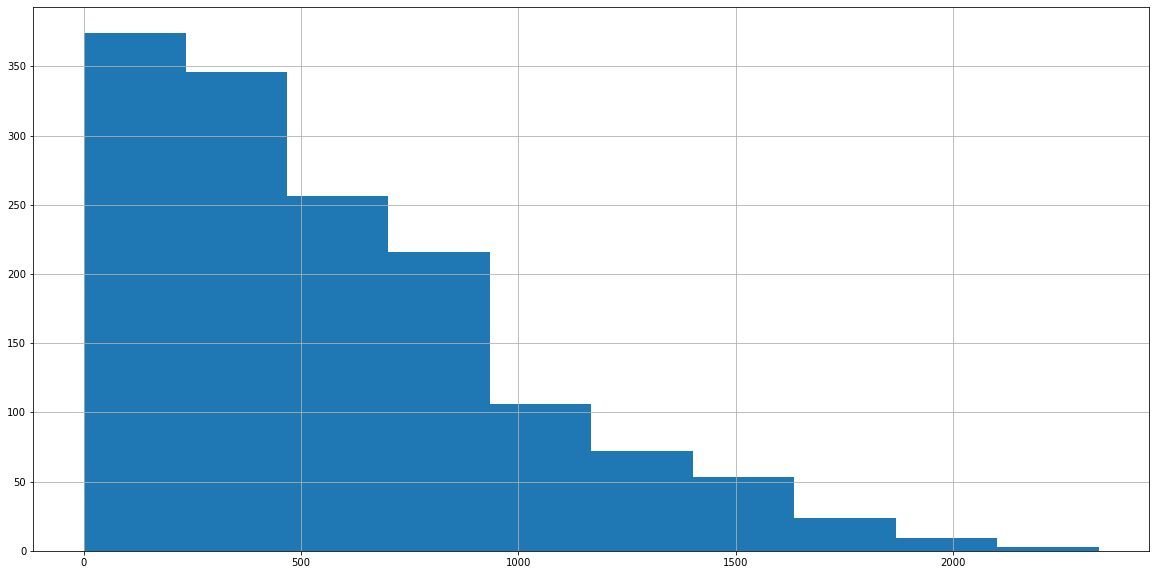

In [75]:
prprice.BsmtUnfSF.hist()

In [76]:
prprice.BsmtUnfSF.describe()

count    1459.000000
mean      567.535984
std       441.874057
min         0.000000
25%       223.500000
50%       479.000000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [77]:
iqrBSF=prprice.BsmtUnfSF.quantile(0.75)-prprice.BsmtUnfSF.quantile(0.25)
iqrBSF

584.5

In [78]:
lowerBSF=prprice['BsmtUnfSF'].quantile(0.25)-(1*iqrBSF)
upperBSF=prprice['BsmtUnfSF'].quantile(0.75)+(1*iqrBSF)
print(lowerBSF,upperBSF)

-361.0 1392.5


In [79]:
prout.loc[prout['BsmtUnfSF']>1392,'BsmtUnfSF']=1392

<AxesSubplot:>

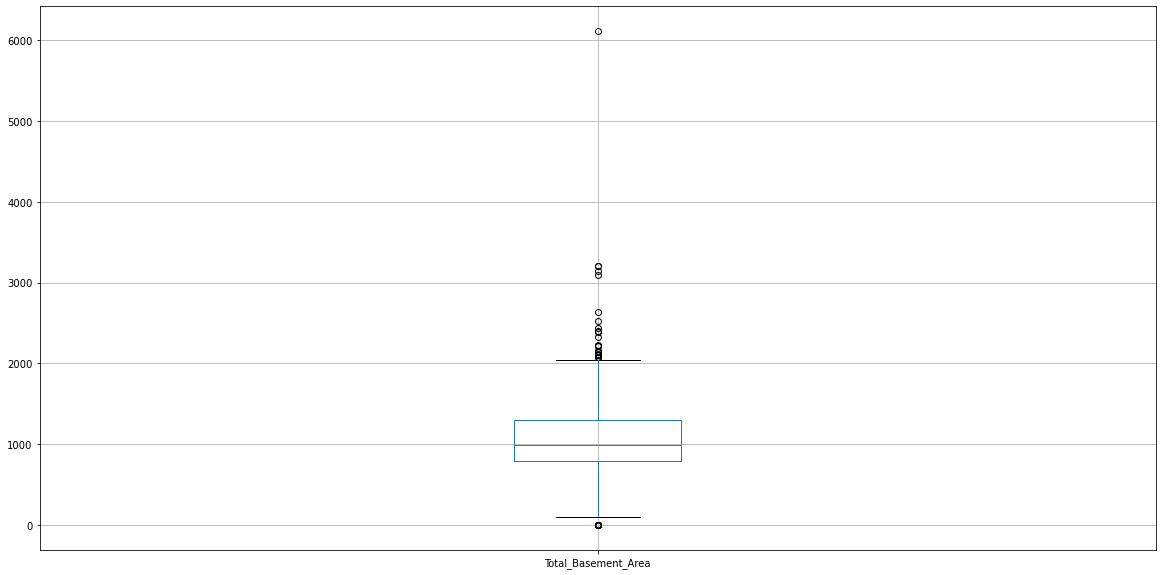

In [80]:
prprice.boxplot(column='Total_Basement_Area')

<AxesSubplot:>

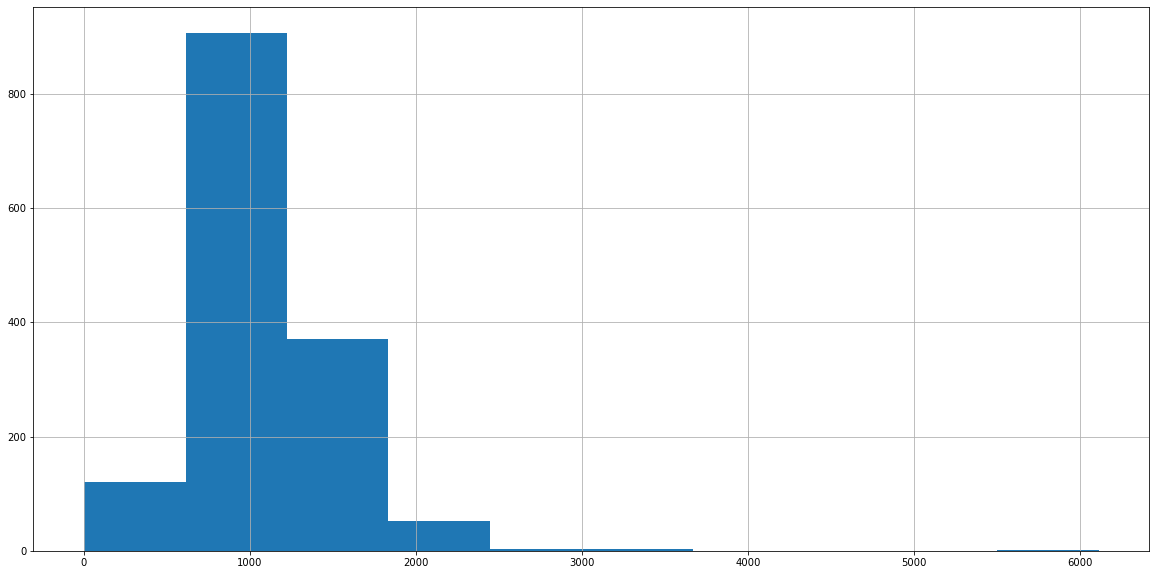

In [81]:
prprice.Total_Basement_Area.hist()

In [82]:
prprice.Total_Basement_Area.describe()

count    1459.000000
mean     1057.293352
std       438.824912
min         0.000000
25%       795.500000
50%       991.000000
75%      1298.500000
max      6110.000000
Name: Total_Basement_Area, dtype: float64

In [83]:
iqrBA=prprice.Total_Basement_Area.quantile(0.75)-prprice.Total_Basement_Area.quantile(0.25)
iqrBA

503.0

In [84]:
lowerBA=prprice['Total_Basement_Area'].quantile(0.25)-(1*iqrBA)
upperBA=prprice['Total_Basement_Area'].quantile(0.75)+(1*iqrBA)
print(lowerBA,upperBA)

292.5 1801.5


In [85]:
prout.loc[prout['Total_Basement_Area']>1801,'Total_Basement_Area']=1801

<AxesSubplot:>

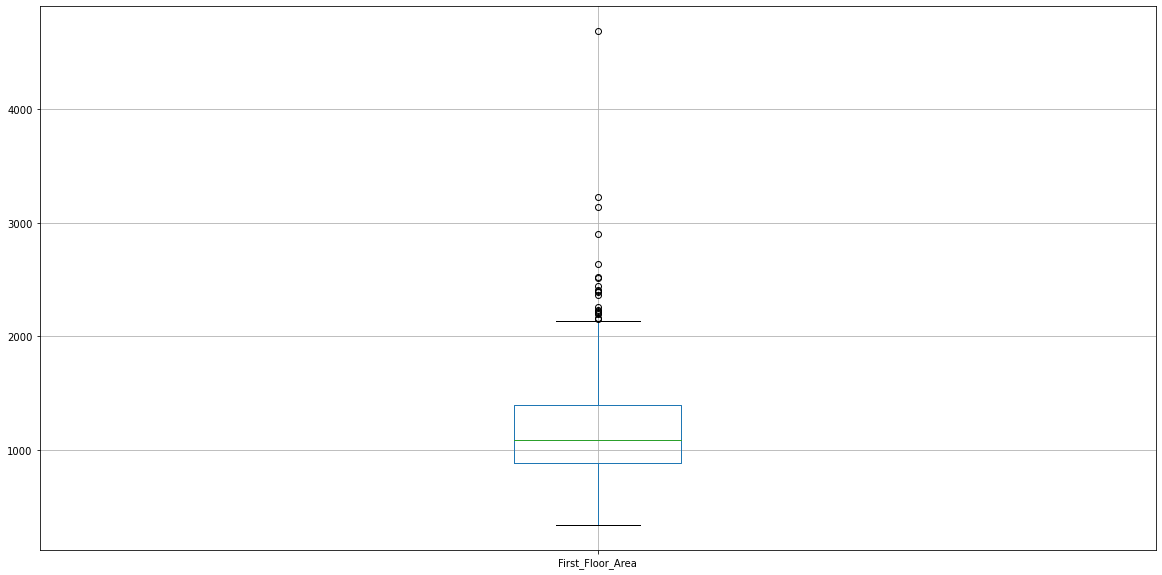

In [86]:
prprice.boxplot(column='First_Floor_Area')

<AxesSubplot:>

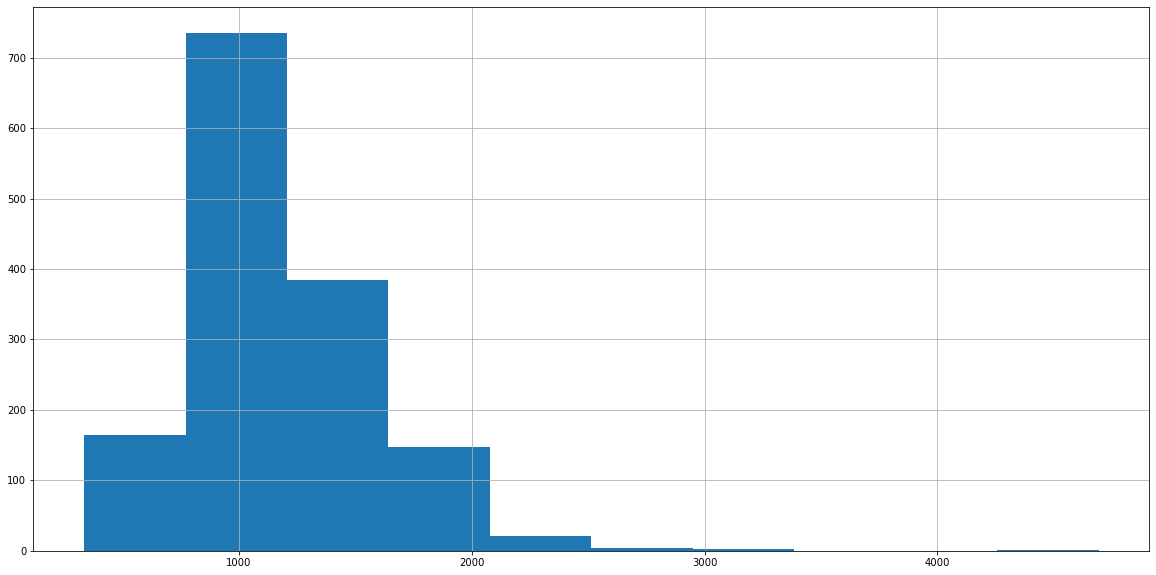

In [87]:
prprice.First_Floor_Area.hist()

In [88]:
prprice.First_Floor_Area.describe()

count    1459.000000
mean     1162.562714
std       386.712553
min       334.000000
25%       882.000000
50%      1086.000000
75%      1391.500000
max      4692.000000
Name: First_Floor_Area, dtype: float64

In [89]:
iqrFFA=prprice.First_Floor_Area.quantile(0.75)-prprice.First_Floor_Area.quantile(0.25)
iqrFFA

509.5

In [90]:
lowerFFA=prprice['First_Floor_Area'].quantile(0.25)-(1*iqrFFA)
upperFFA=prprice['First_Floor_Area'].quantile(0.75)+(1*iqrFFA)
print(lowerFFA,upperFFA)

372.5 1901.0


In [91]:
prout.loc[prout['First_Floor_Area']>1901,'First_Floor_Area']=1901

<AxesSubplot:>

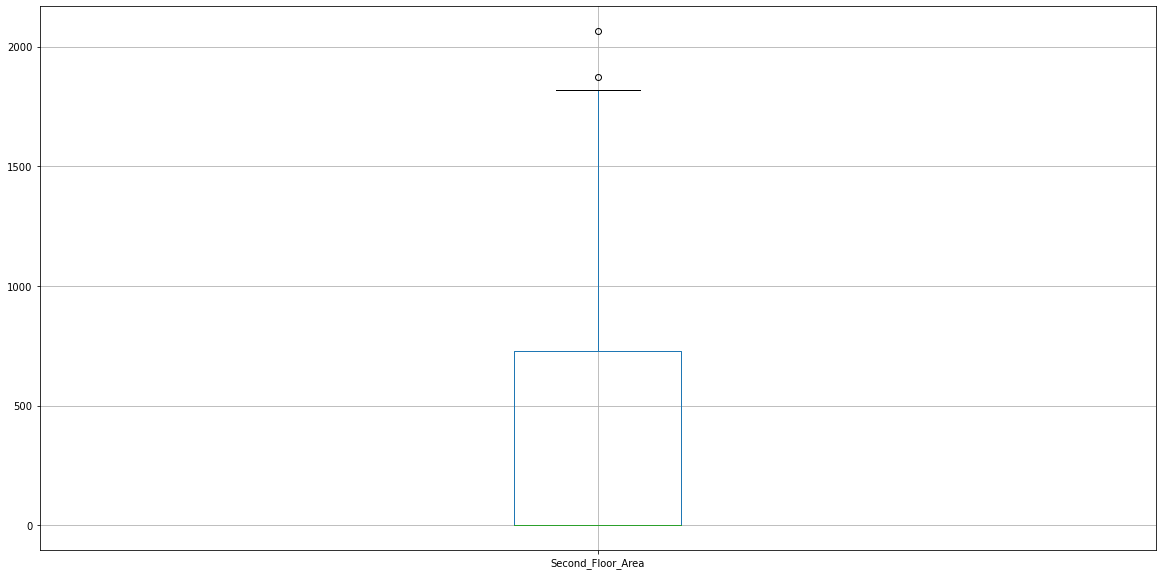

In [92]:
prprice.boxplot(column='Second_Floor_Area')

<AxesSubplot:>

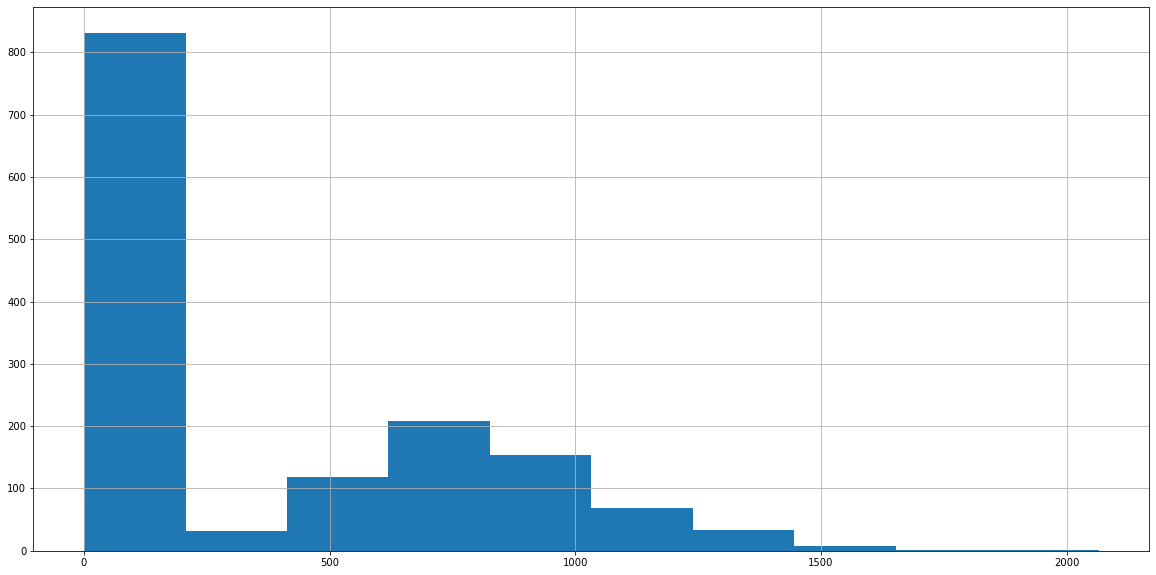

In [93]:
prprice.Second_Floor_Area.hist()

In [94]:
prprice.Second_Floor_Area.describe()

count    1459.000000
mean      347.230295
std       436.583480
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: Second_Floor_Area, dtype: float64

In [95]:
iqrFsA=prprice.Second_Floor_Area.quantile(0.75)-prprice.Second_Floor_Area.quantile(0.25)
iqrFsA

728.0

In [96]:
lowerFsA=prprice['Second_Floor_Area'].quantile(0.25)-(1*iqrFsA)
upperFsA=prprice['Second_Floor_Area'].quantile(0.75)+(1*iqrFsA)
print(lowerFsA,upperFsA)

-728.0 1456.0


In [97]:
prout.loc[prout['Second_Floor_Area']>1456,'Second_Floor_Area']=1456

<AxesSubplot:>

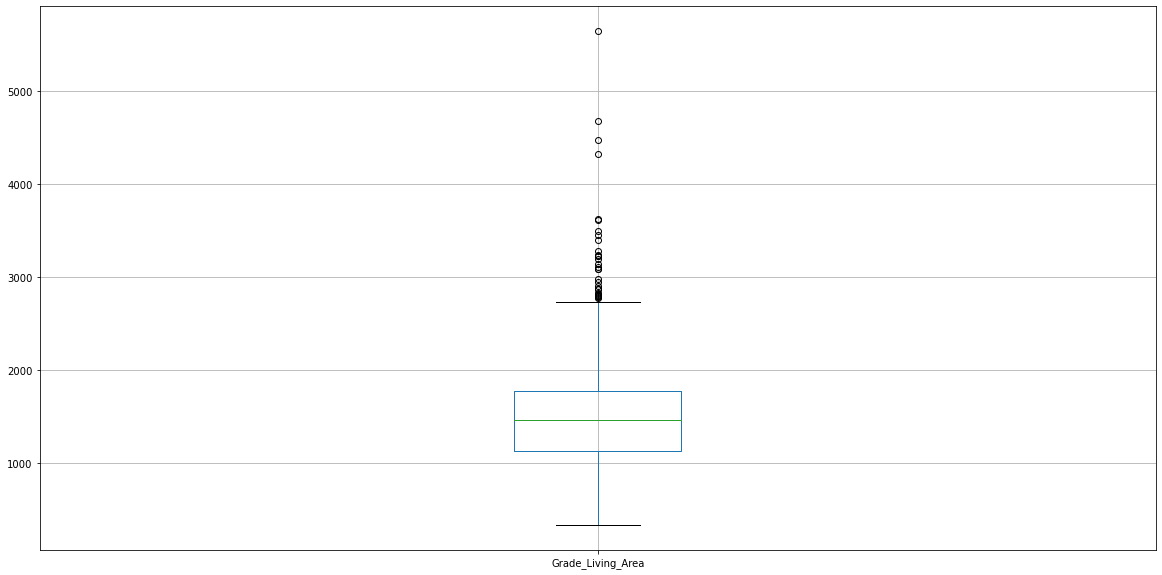

In [98]:
prprice.boxplot(column='Grade_Living_Area')

<AxesSubplot:>

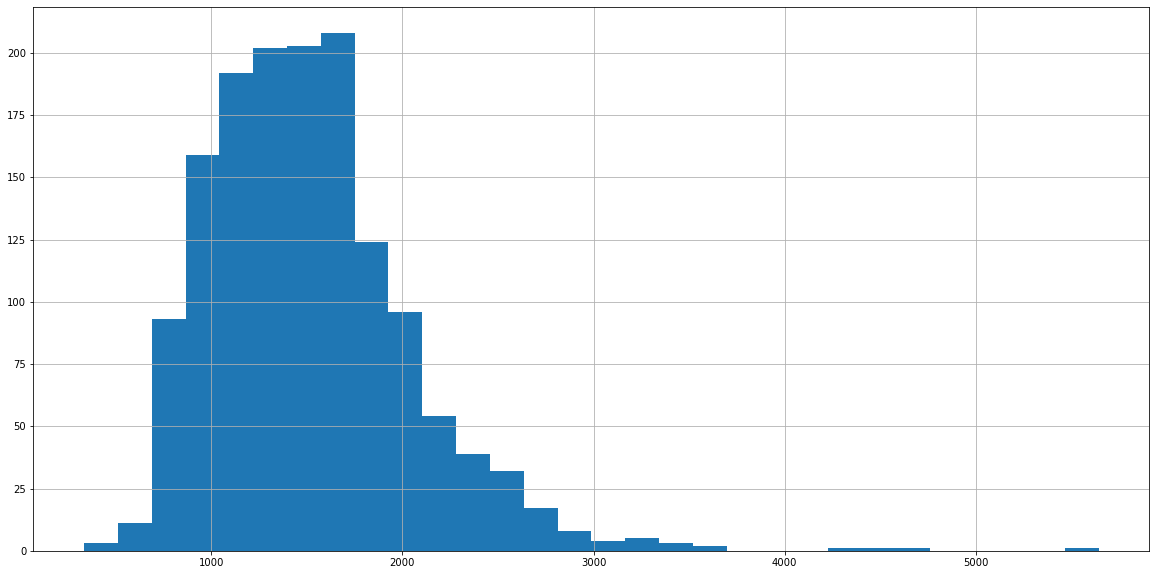

In [99]:
prprice.Grade_Living_Area.hist(bins=30)

In [100]:
prprice.Grade_Living_Area.describe()

count    1459.000000
mean     1515.641535
std       525.616607
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: Grade_Living_Area, dtype: float64

In [101]:
iqrGLA=prprice.Grade_Living_Area.quantile(0.75)-prprice.Grade_Living_Area.quantile(0.25)
iqrGLA

648.5

In [102]:
lowerGLA=prprice['Grade_Living_Area'].quantile(0.25)-(1*iqrGLA)
upperGLA=prprice['Grade_Living_Area'].quantile(0.75)+(1*iqrGLA)
print(lowerGLA,upperGLA)

480.5 2426.0


In [103]:
prout.loc[prout['Grade_Living_Area']>2426,'Grade_Living_Area']=2426

<AxesSubplot:>

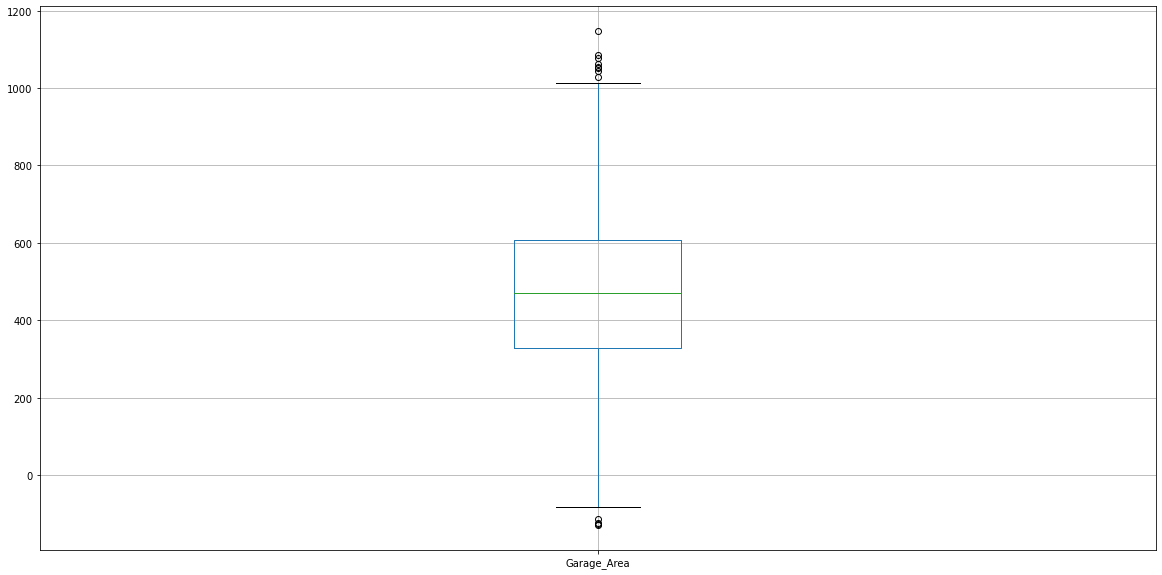

In [104]:
prprice.boxplot(column='Garage_Area')

<AxesSubplot:>

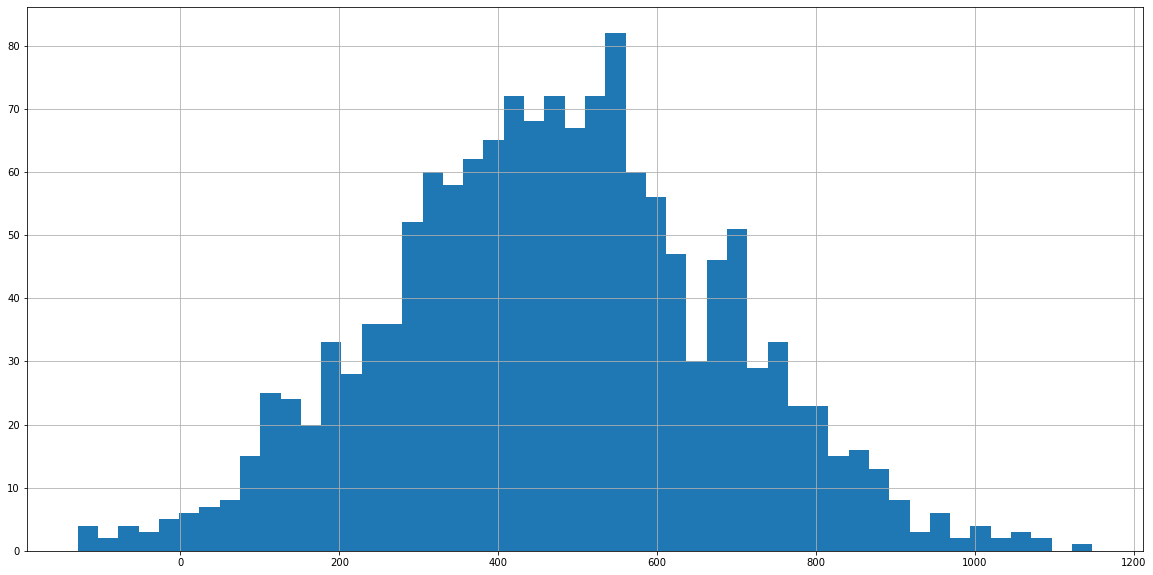

In [105]:
prprice.Garage_Area.hist(bins=50)

In [106]:
prprice.Garage_Area.describe()

count    1459.000000
mean      470.934787
std       210.668787
min      -129.369350
25%       329.290489
50%       471.028116
75%       607.184977
max      1147.488093
Name: Garage_Area, dtype: float64

In [107]:
upperGA=prprice['Garage_Area'].mean()+2.5*prprice['Garage_Area'].std()
lowerGA=prprice['Garage_Area'].mean()-2.5*prprice['Garage_Area'].std()
print(lowerGA,upperGA)

-55.73718144672989 997.6067556677931


In [108]:
prout.loc[prout['Garage_Area']>997,'Garage_Area']=997

<AxesSubplot:>

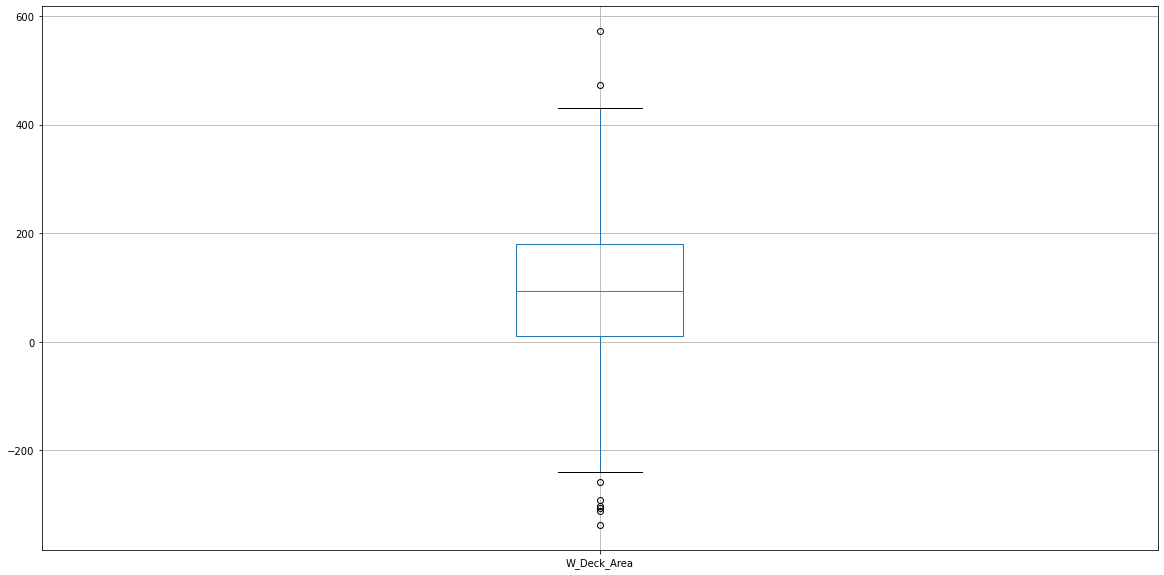

In [109]:
prprice.boxplot(column='W_Deck_Area')

<AxesSubplot:>

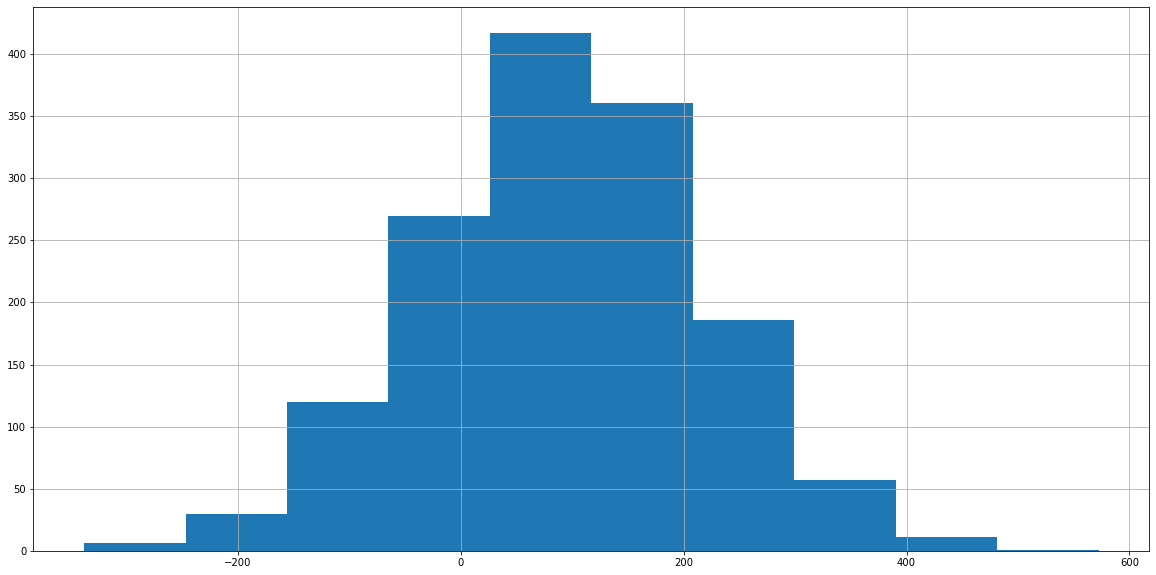

In [110]:
prprice.W_Deck_Area.hist()

In [111]:
prprice.W_Deck_Area.describe()

count    1459.000000
mean       93.015667
std       124.796682
min      -338.112031
25%         9.656026
50%        92.803628
75%       180.335986
max       572.298709
Name: W_Deck_Area, dtype: float64

In [112]:
upperGA=prprice['W_Deck_Area'].mean()+2.5*prprice['W_Deck_Area'].std()
lowerGA=prprice['W_Deck_Area'].mean()-2.5*prprice['W_Deck_Area'].std()
print(lowerGA,upperGA)

-218.97603708540117 405.00737163557955


In [113]:
prout.loc[prout['W_Deck_Area']>405.00,'W_Deck_Area']=405.00

<AxesSubplot:>

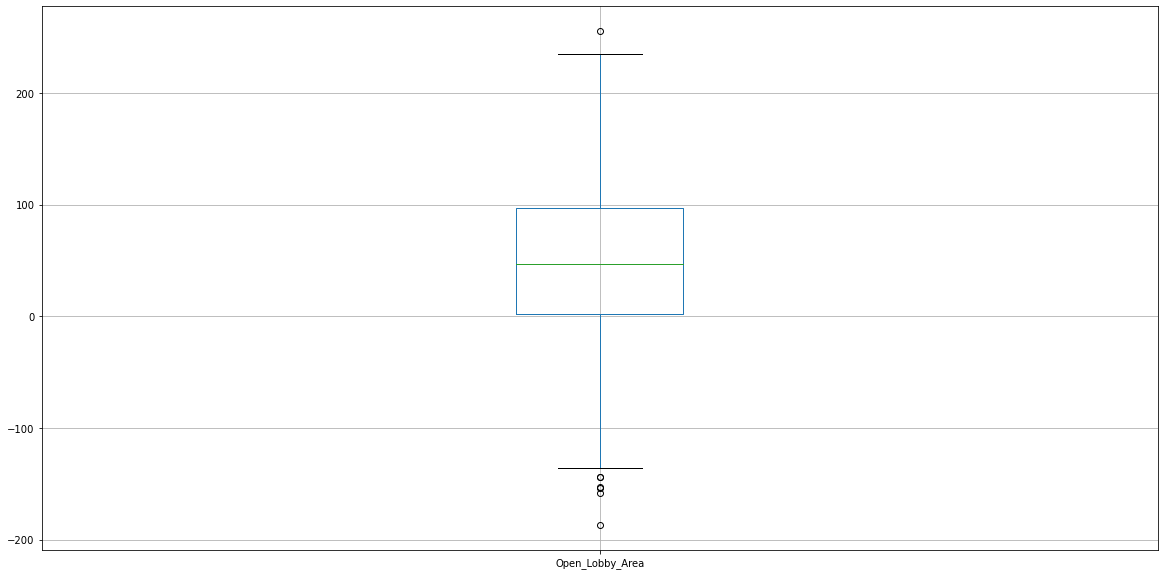

In [114]:
prprice.boxplot(column='Open_Lobby_Area')

<AxesSubplot:>

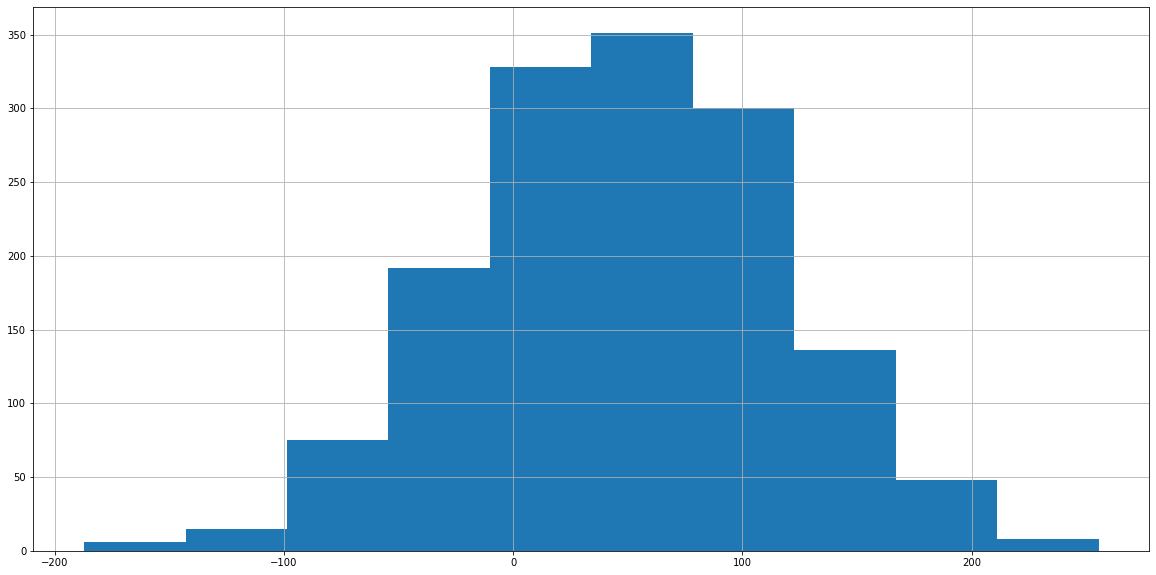

In [115]:
prprice.Open_Lobby_Area.hist()

In [116]:
prprice.Open_Lobby_Area.describe()

count    1459.000000
mean       47.811902
std        67.467586
min      -187.149958
25%         1.843186
50%        46.837919
75%        96.523486
max       255.362547
Name: Open_Lobby_Area, dtype: float64

In [117]:
upperOLA=prprice['Open_Lobby_Area'].mean()+2.5*prprice['Open_Lobby_Area'].std()
lowerOLA=prprice['Open_Lobby_Area'].mean()-2.5*prprice['Open_Lobby_Area'].std()
print(lowerOLA,upperOLA)

-120.85706383539774 216.48086697982126


In [118]:
prout.loc[prout['Open_Lobby_Area']>216.48,'Open_Lobby_Area']=216.48

<AxesSubplot:>

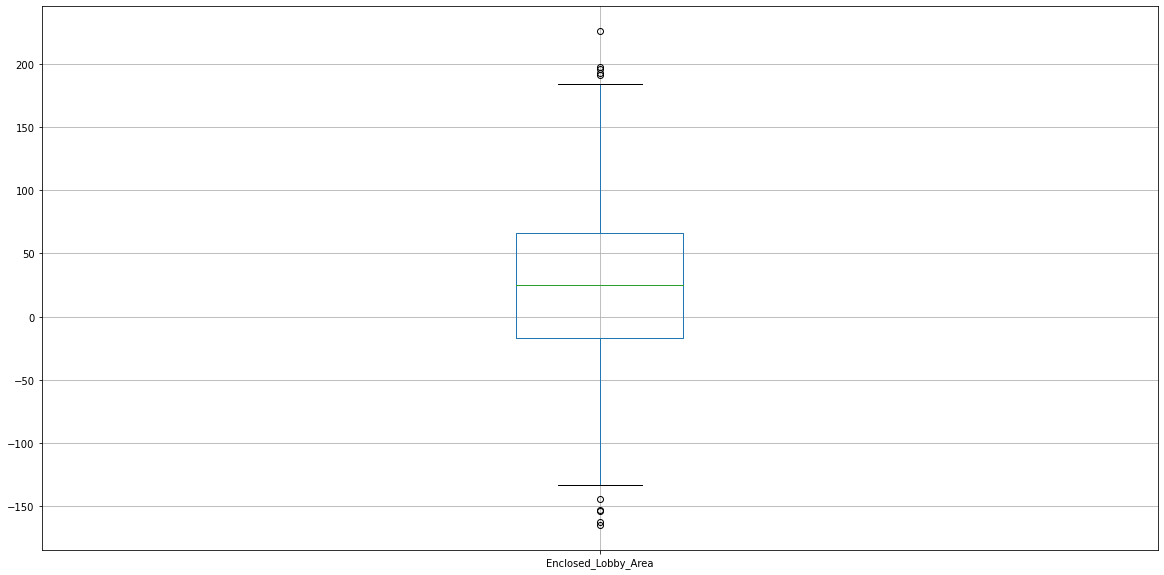

In [119]:
prprice.boxplot(column='Enclosed_Lobby_Area')

<AxesSubplot:>

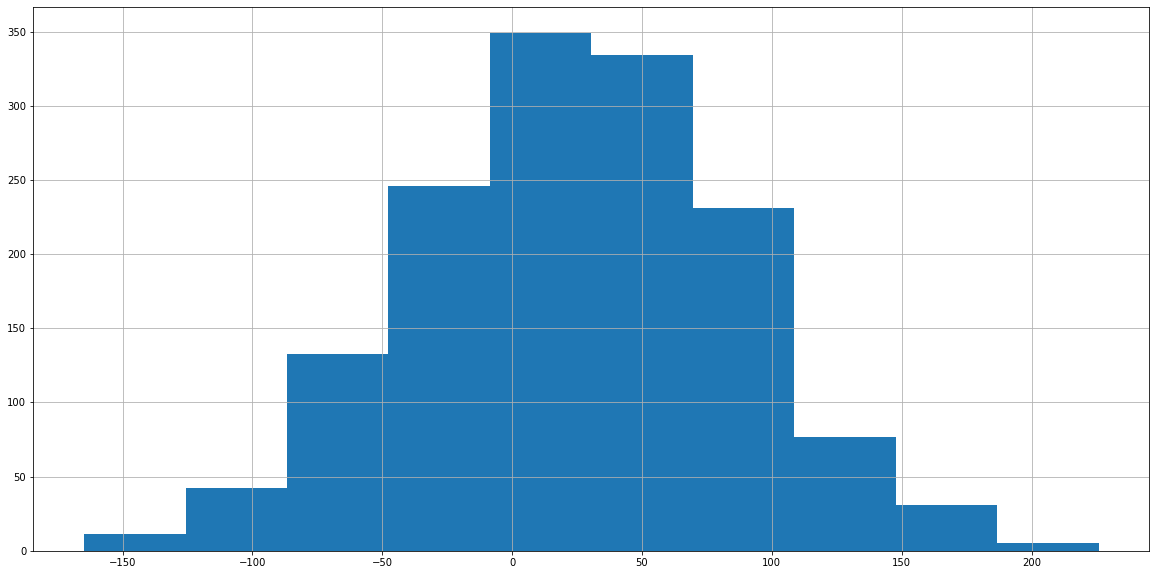

In [120]:
prprice.Enclosed_Lobby_Area.hist()

In [121]:
prprice.Enclosed_Lobby_Area.describe()

count    1459.000000
mean       24.580227
std        61.353507
min      -164.807386
25%       -16.807302
50%        25.026953
75%        66.237591
max       225.762714
Name: Enclosed_Lobby_Area, dtype: float64

In [122]:
uppereLA=prprice['Enclosed_Lobby_Area'].mean()+2.5*prprice['Enclosed_Lobby_Area'].std()
lowereLA=prprice['Enclosed_Lobby_Area'].mean()-2.5*prprice['Enclosed_Lobby_Area'].std()
print(lowereLA,uppereLA)

-128.80353952912378 177.96399361617392


In [123]:
prout.loc[prout['Enclosed_Lobby_Area']>177.96,'Enclosed_Lobby_Area']=177.96

<AxesSubplot:>

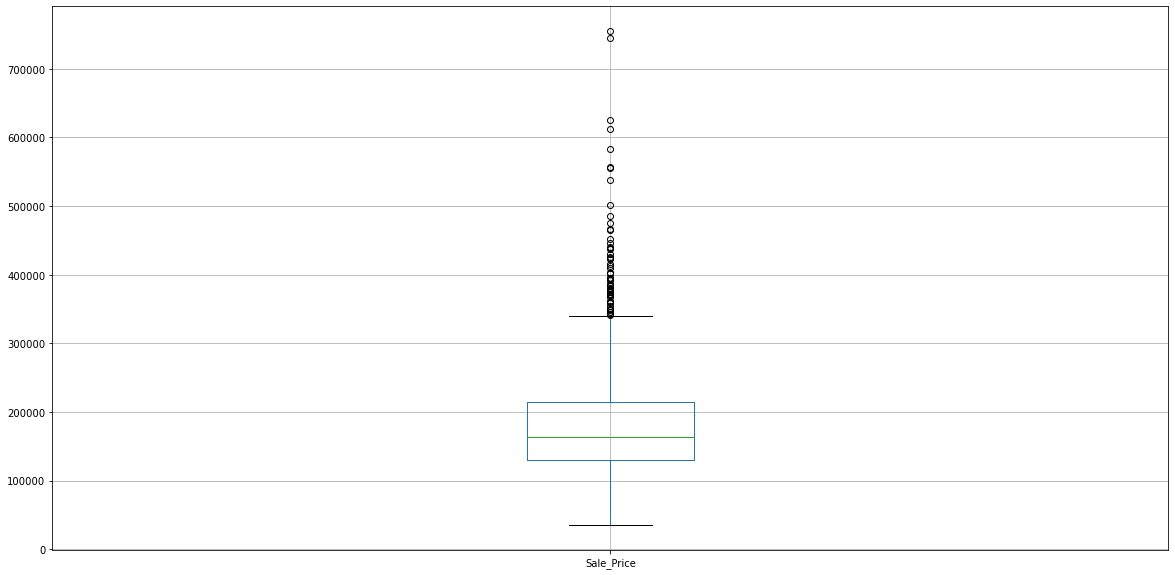

In [124]:
prprice.boxplot(column='Sale_Price')

<AxesSubplot:>

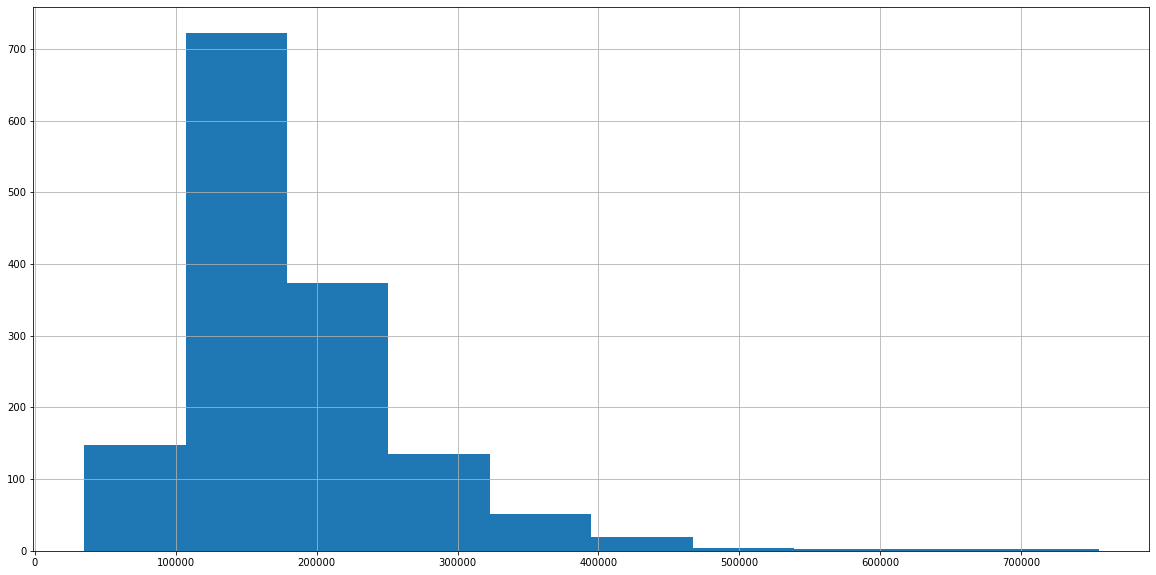

In [125]:
prprice.Sale_Price.hist()

In [126]:
prprice.Sale_Price.describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

In [127]:
iqrSP=prprice.Sale_Price.quantile(0.75)-prprice.Sale_Price.quantile(0.25)
iqrSP

84050.0

In [128]:
lowerSP=prprice['Sale_Price'].quantile(0.25)-(1*iqrSP)
upperSP=prprice['Sale_Price'].quantile(0.75)+(1*iqrSP)
print(lowerSP,upperSP)

45900.0 298050.0


In [129]:
prout.loc[prout['Sale_Price']>298050.000000,'Sale_Price']=298050.000000

In [130]:
na=prout.corr()

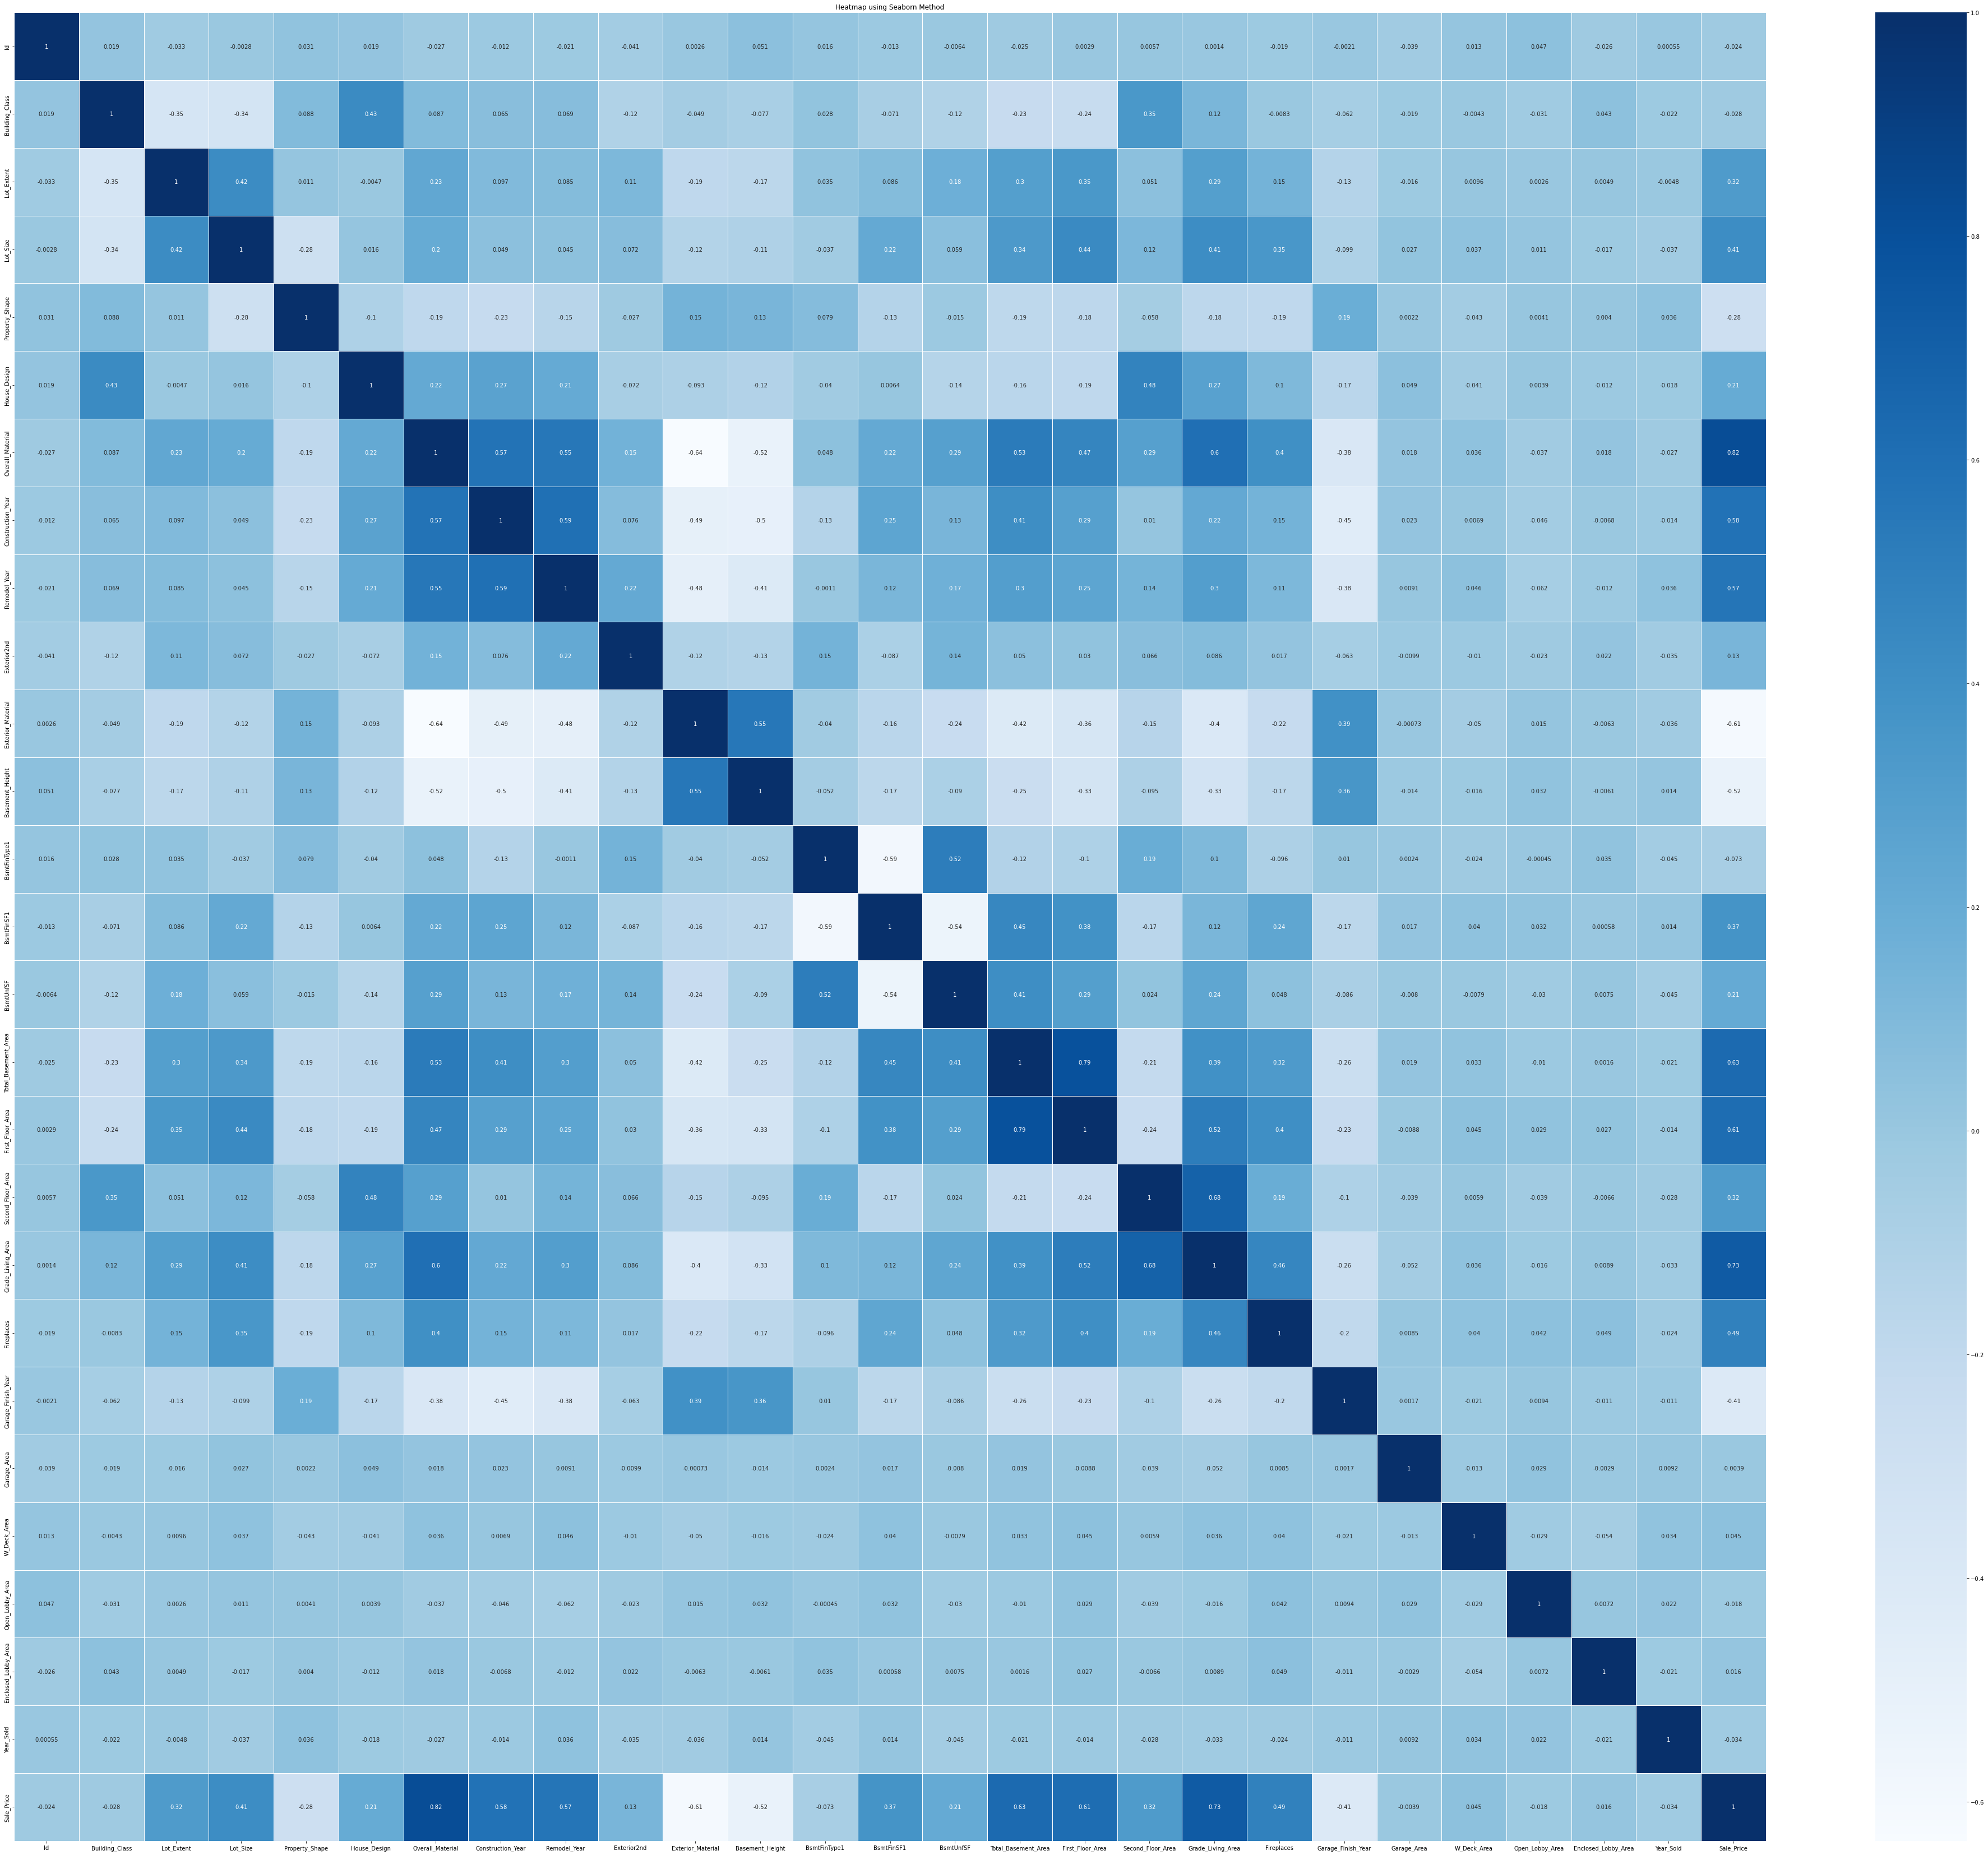

In [131]:
plt.figure(figsize=(70,60))
heatmap=sns.heatmap(na,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using Seaborn Method")
plt.show()

In [132]:
prout.skew(axis = 0, skipna = True)

Id                     0.000000
Building_Class         0.729150
Lot_Extent             0.345771
Lot_Size               0.995152
Property_Shape        -0.609065
House_Design           0.305735
Overall_Material       0.215719
Construction_Year     -0.613700
Remodel_Year          -0.505239
Exterior2nd           -0.695057
Exterior_Material     -1.832057
Basement_Height       -1.195582
BsmtFinType1          -0.028246
BsmtFinSF1             0.634216
BsmtUnfSF              0.577775
Total_Basement_Area   -0.010547
First_Floor_Area       0.475666
Second_Floor_Area      0.748083
Grade_Living_Area      0.355087
Fireplaces             0.648580
Garage_Finish_Year    -0.225373
Garage_Area           -0.008571
W_Deck_Area           -0.087955
Open_Lobby_Area       -0.092174
Enclosed_Lobby_Area   -0.073854
Year_Sold              0.096521
Sale_Price             0.524029
dtype: float64

In [133]:
prout.skew().sort_values(ascending=False)

Lot_Size               0.995152
Second_Floor_Area      0.748083
Building_Class         0.729150
Fireplaces             0.648580
BsmtFinSF1             0.634216
BsmtUnfSF              0.577775
Sale_Price             0.524029
First_Floor_Area       0.475666
Grade_Living_Area      0.355087
Lot_Extent             0.345771
House_Design           0.305735
Overall_Material       0.215719
Year_Sold              0.096521
Id                     0.000000
Garage_Area           -0.008571
Total_Basement_Area   -0.010547
BsmtFinType1          -0.028246
Enclosed_Lobby_Area   -0.073854
W_Deck_Area           -0.087955
Open_Lobby_Area       -0.092174
Garage_Finish_Year    -0.225373
Remodel_Year          -0.505239
Property_Shape        -0.609065
Construction_Year     -0.613700
Exterior2nd           -0.695057
Basement_Height       -1.195582
Exterior_Material     -1.832057
dtype: float64

for i in prprice.columns:
    x = prprice[i].value_counts()
    print("Column name is:",i,"and it value is:",x)


In [134]:
for i in prprice.columns:
    x=prprice[i].describe()
    print(x)
   

count    1459.000000
mean      730.000000
std       421.321334
min         1.000000
25%       365.500000
50%       730.000000
75%      1094.500000
max      1459.000000
Name: Id, dtype: float64
count    1459.000000
mean       56.922550
std        42.304033
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: Building_Class, dtype: float64
count    1459.000000
mean       65.777245
std        23.871579
min        21.000000
25%        46.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: Lot_Extent, dtype: float64
count      1459.000000
mean      10517.225497
std        9984.675721
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: Lot_Size, dtype: float64
count    1459.000000
mean        1.941741
std         1.409367
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Property_Sha

In [135]:
for i in ['Enclosed_Lobby_Area','Open_Lobby_Area','W_Deck_Area','Garage_Area']:
    def nv_to_pv(prout):
        if prout[i] < 0:
            return prout[i] * (-1)
        elif prout[i] >0:
            return prout[i]
    #create Age_new 
    prout[i]=prout.apply(nv_to_pv,axis=1)
    prout[i].describe()
    print(i)

Enclosed_Lobby_Area
Open_Lobby_Area
W_Deck_Area
Garage_Area


In [136]:
prout.skew().sort_values(ascending=False)

Lot_Size               0.995152
Enclosed_Lobby_Area    0.851103
W_Deck_Area            0.764308
Second_Floor_Area      0.748083
Building_Class         0.729150
Open_Lobby_Area        0.717801
Fireplaces             0.648580
BsmtFinSF1             0.634216
BsmtUnfSF              0.577775
Sale_Price             0.524029
First_Floor_Area       0.475666
Grade_Living_Area      0.355087
Lot_Extent             0.345771
House_Design           0.305735
Overall_Material       0.215719
Year_Sold              0.096521
Garage_Area            0.084102
Id                     0.000000
Total_Basement_Area   -0.010547
BsmtFinType1          -0.028246
Garage_Finish_Year    -0.225373
Remodel_Year          -0.505239
Property_Shape        -0.609065
Construction_Year     -0.613700
Exterior2nd           -0.695057
Basement_Height       -1.195582
Exterior_Material     -1.832057
dtype: float64


def nv_to_pv(prout):
    if prout[i] < 0:
        return prout[i] * (-1)
    elif prout[i] >0:
        return prout[i]
#create Age_new 
prout[i]=prout.apply(nv_to_pv,axis=1)
prout[iz]describe()



In [137]:
nq=prout.copy()

In [138]:
log_trns=np.log(prout['Sale_Price'])
log_trns.skew(),
#for x in log_trns:
 #   if x<0:
 #       print('y')
    

(-0.3510758809501476,)

In [139]:
#nq['Exterior_Material']
nq['Exterior_Material']=x=((nq['Exterior_Material'])**3)
nq['Sale_Price']=y=np.cbrt(nq['Sale_Price'])
x.skew(),y.skew()

(-0.5917544806358777, 0.00417614997645659)

In [140]:
nq.Sale_Price.skew()

0.00417614997645659

In [141]:
for x in ['Remodel_Year','Property_Shape','Construction_Year','Exterior2nd','Basement_Height']:
    nq[x]=np.square(nq[x])
    print(x,"=",nq[x].skew())
    #if x=='Exterior_Material':
     #   break
for y in ['Lot_Size','Enclosed_Lobby_Area','W_Deck_Area','Second_Floor_Area','Building_Class','Open_Lobby_Area','Fireplaces',"BsmtFinSF1",'BsmtUnfSF']:
    nq[y]=np.sqrt(nq[y])
    print(y,"=",nq[y].skew())

Remodel_Year = -0.4978083608003693
Property_Shape = -0.5705660773073177
Construction_Year = -0.5865595137606273
Exterior2nd = -0.24681517844734396
Basement_Height = -0.25315901350757863
Lot_Size = 0.009323001534285547
Enclosed_Lobby_Area = 0.02277317984295776
W_Deck_Area = -0.04502455540699149
Second_Floor_Area = 0.4118498073903319
Building_Class = 0.3498396030958944
Open_Lobby_Area = -0.04418512387055282
Fireplaces = 0.043821525890798796
BsmtFinSF1 = -0.1157085651338742
BsmtUnfSF = -0.4047769634222954


In [142]:
nq.skew()

Id                     0.000000
Building_Class         0.349840
Lot_Extent             0.345771
Lot_Size               0.009323
Property_Shape        -0.570566
House_Design           0.305735
Overall_Material       0.215719
Construction_Year     -0.586560
Remodel_Year          -0.497808
Exterior2nd           -0.246815
Exterior_Material     -0.591754
Basement_Height       -0.253159
BsmtFinType1          -0.028246
BsmtFinSF1            -0.115709
BsmtUnfSF             -0.404777
Total_Basement_Area   -0.010547
First_Floor_Area       0.475666
Second_Floor_Area      0.411850
Grade_Living_Area      0.355087
Fireplaces             0.043822
Garage_Finish_Year    -0.225373
Garage_Area            0.084102
W_Deck_Area           -0.045025
Open_Lobby_Area       -0.044185
Enclosed_Lobby_Area    0.022773
Year_Sold              0.096521
Sale_Price             0.004176
dtype: float64

for y in ['Lot_Size','Enclosed_Lobby_Area','W_Deck_Area','Second_Floor_Area','Building_Class','Open_Lobby_Area','Fireplaces',"BsmtFinSF1",'BsmtUnfSF']:
    nq[y]=np.sqrt(nq[y])
    print(y,"=",nq[y].skew())

In [143]:
prout.Property_Shape.skew()

-0.60906489024953

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Building_Class'}>,
        <AxesSubplot:title={'center':'Lot_Extent'}>,
        <AxesSubplot:title={'center':'Lot_Size'}>,
        <AxesSubplot:title={'center':'Property_Shape'}>],
       [<AxesSubplot:title={'center':'House_Design'}>,
        <AxesSubplot:title={'center':'Overall_Material'}>,
        <AxesSubplot:title={'center':'Construction_Year'}>,
        <AxesSubplot:title={'center':'Remodel_Year'}>,
        <AxesSubplot:title={'center':'Exterior2nd'}>],
       [<AxesSubplot:title={'center':'Exterior_Material'}>,
        <AxesSubplot:title={'center':'Basement_Height'}>,
        <AxesSubplot:title={'center':'BsmtFinType1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'Total_Basement_Area'}>,
        <AxesSubplot:title={'center':'First_Floor_Area'}>,
        <AxesSubplot:title={'center':'Second_Floor_A

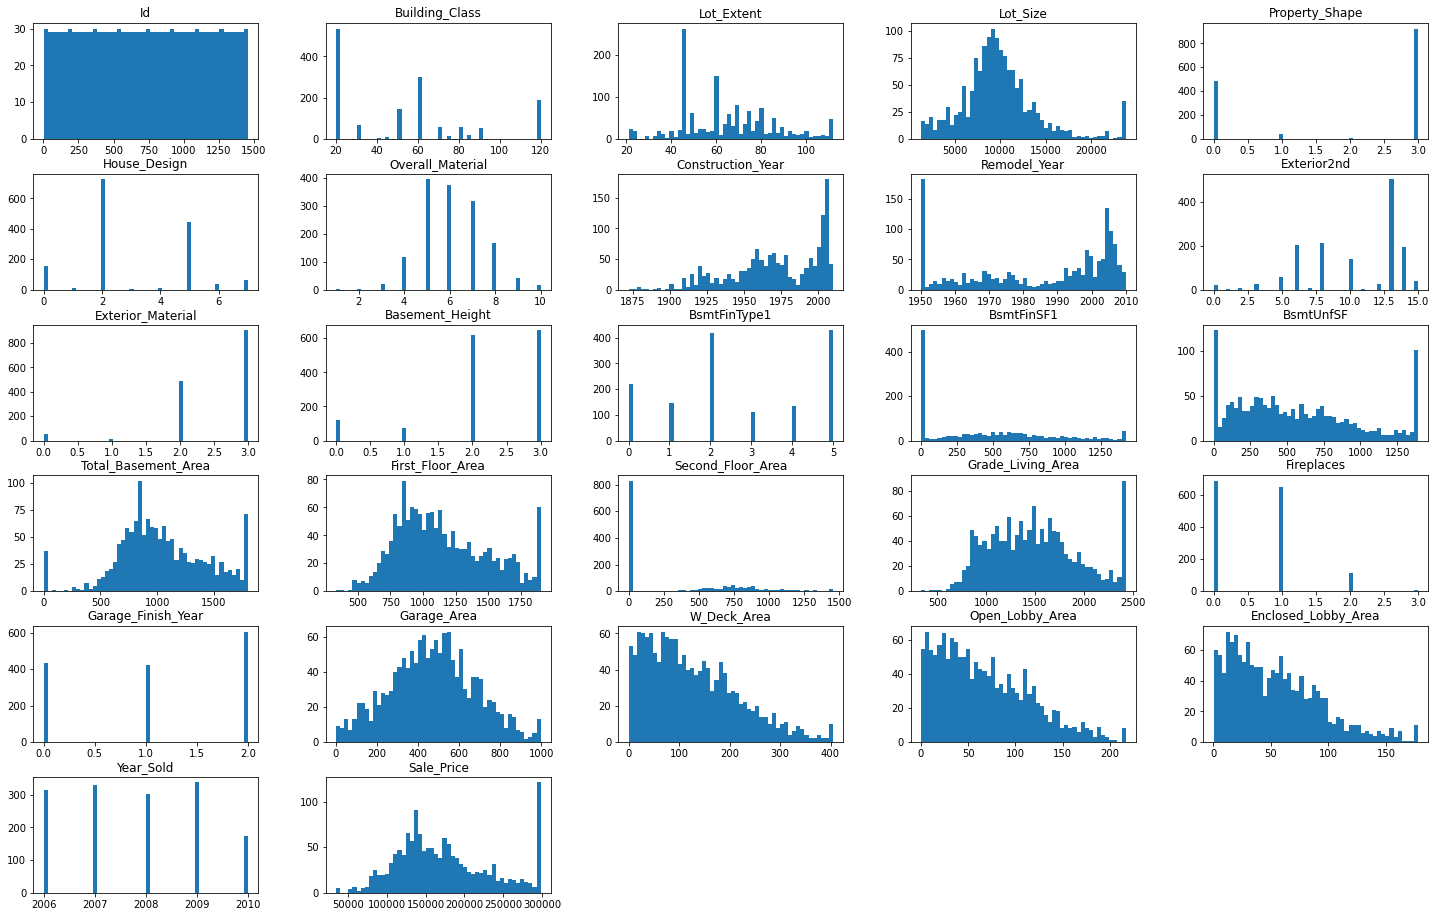

In [144]:
prout.hist(grid=False,
       figsize=(25, 16),
       bins=50)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Building_Class'}>,
        <AxesSubplot:title={'center':'Lot_Extent'}>,
        <AxesSubplot:title={'center':'Lot_Size'}>,
        <AxesSubplot:title={'center':'Property_Shape'}>],
       [<AxesSubplot:title={'center':'House_Design'}>,
        <AxesSubplot:title={'center':'Overall_Material'}>,
        <AxesSubplot:title={'center':'Construction_Year'}>,
        <AxesSubplot:title={'center':'Remodel_Year'}>,
        <AxesSubplot:title={'center':'Exterior2nd'}>],
       [<AxesSubplot:title={'center':'Exterior_Material'}>,
        <AxesSubplot:title={'center':'Basement_Height'}>,
        <AxesSubplot:title={'center':'BsmtFinType1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'Total_Basement_Area'}>,
        <AxesSubplot:title={'center':'First_Floor_Area'}>,
        <AxesSubplot:title={'center':'Second_Floor_A

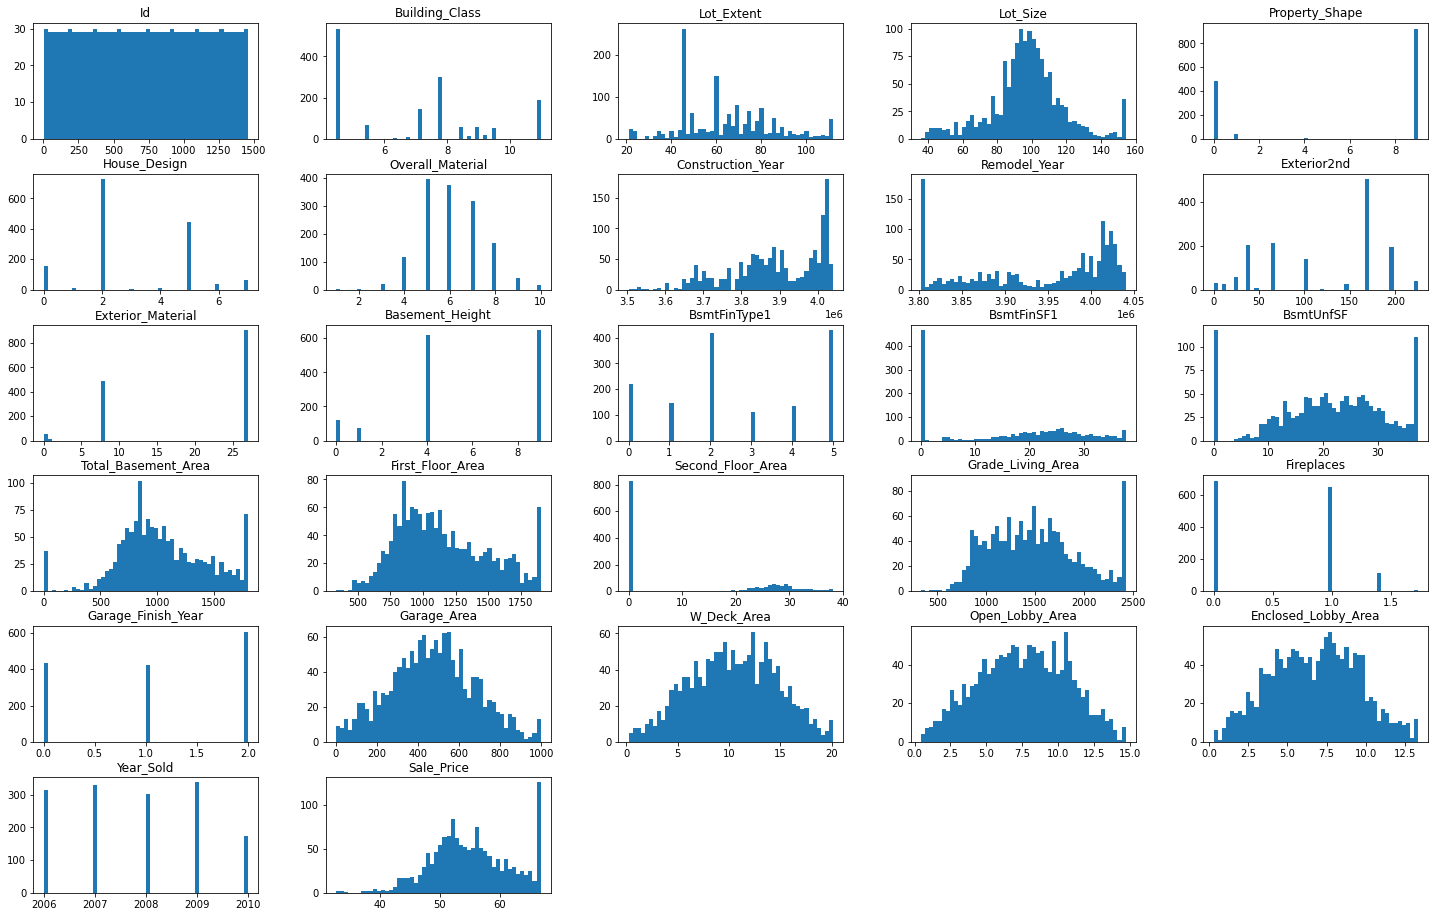

In [145]:
nq.hist(grid=False,
       figsize=(25, 16),
       bins=50)

In [146]:
x_nq=nq.iloc[:,1:-1]
y_nq=nq.iloc[:,-1]
x_trpr, x_tepr, y_trpr, y_tepr = train_test_split(x_nq,y_nq, test_size = 0.3, random_state = 0)

In [147]:
x_trpr.shape, x_tepr.shape, y_trpr.shape, y_tepr.shape

((1021, 25), (438, 25), (1021,), (438,))

In [148]:
x_trpr

Building_Class  Lot_Extent    Lot_Size  Property_Shape  House_Design  \
1453        4.472136        90.0  131.213566               9             2   
1099        4.472136        82.0  108.995413               0             2   
416         7.745967        74.0   88.566359               9             5   
1168        8.366600       112.0  117.166548               9             5   
670         7.745967        64.0   92.913939               9             5   
601         7.071068        50.0   94.868330               9             0   
1232        9.486833        70.0   99.206855               9             2   
328         8.660254        46.0  109.032105               0             4   
609         4.472136        61.0   89.123510               9             2   
760         4.472136        70.0   95.393920               9             2   
692         7.745967        42.0  154.159009               0             5   
1226        7.745967        86.0  120.822183               0             5   
1116        8.944272        46.0   88.034084               9             7   
1398        7.071068        60.0   84.852814               9             0   
1399        7.071068        51.0   78.555713               9             0   
828         7.745967        46.0  154.159009               1             5   
418         7.071068        60.0   90.332718               9             0   
1169        7.745967       112.0  154.159009               0             5   
1059        7.071068        46.0  106.183803               0             0   
672         4.472136        46.0  106.066017               0             2   
654         4.472136        91.0  102.161637               0             2   
898         4.472136       100.0  113.661779               0             2   
688         4.472136        60.0   89.938868               9             2   
713        10.954451        60.0   99.362971               9             2   
1336        9.486833        87.0   96.156123               0             2   
589         6.324555        50.0   95.393920               9             2   
1010        7.071068       112.0  145.897224               9             0   
1113        4.472136        66.0   94.461632               9             2   
1446        4.472136        46.0  154.159009               0             2   
548         4.472136        49.0   90.746901               0             2   
1012        8.366600        55.0  102.917443               9             5   
1277        8.944272        46.0  133.682460               0             7   
131         7.745967        46.0  110.562200               0             5   
15          6.708204        51.0   78.230429               9             1   
1046        7.745967        85.0  126.712272               0             5   
842         8.944272        82.0   94.973681               9             7   
435         7.745967        43.0  103.281170               1             5   
1368       10.954451        46.0   66.595796               9             2   
476         4.472136        75.0  114.564392               9             2   
506         7.745967        80.0   97.744565               0             5   
466         4.472136        85.0  103.092192               9             2   
900         4.472136        46.0   85.673800               0             2   
1240        7.745967        65.0   90.321647               9             5   
1311        4.472136        68.0   93.882906               9             2   
729         5.477226        52.0   78.993671               9             0   
935         5.477226        52.0   76.321688               0             2   
764        10.954451        30.0   97.718985               0             2   
867         4.472136        85.0   83.486526               9             2   
402         5.477226        60.0  100.995049               9             2   
1215        4.472136        99.0   84.225887               0             2   
187         7.071068        

In [149]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.tree import DecisionTreeRegressor #DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor#RandomForestRegressor
from xgboost import XGBRFRegressor#XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor#KNeighborsRegressor

In [150]:
ln=LinearRegression()
ln.fit(x_trpr,y_trpr)
ln_y1= ln.predict(x_tepr)
ln_y1

array([59.55302192, 46.02833612, 54.67434533, 52.23074363, 50.80332828,
       49.4727537 , 55.97001154, 55.23852087, 44.43683996, 46.52894274,
       45.56362363, 66.5171731 , 46.7223605 , 59.08948894, 65.48410839,
       53.25015498, 52.4663786 , 67.42307605, 58.74453706, 56.20527438,
       67.33698352, 45.401597  , 52.21681379, 56.66226929, 57.97739743,
       57.39404757, 53.80515866, 63.12420863, 42.50339282, 66.23154985,
       50.47967269, 52.39754489, 54.05021015, 56.39389041, 59.46647923,
       63.06686724, 48.31808266, 57.06434769, 48.36035856, 47.0390583 ,
       48.04460671, 52.79200287, 60.85331225, 43.96228273, 50.41493988,
       60.55637573, 54.69745959, 57.2408843 , 47.68590295, 65.9429632 ,
       63.24178148, 52.82663394, 42.73435864, 41.22605899, 48.78387625,
       50.69714447, 60.0575494 , 61.14295726, 66.79301017, 54.14672069,
       60.99744227, 51.3248887 , 56.665766  , 65.09610426, 52.42585934,
       52.69282681, 46.06546402, 59.68812489, 42.11316858, 55.33

In [151]:
m=(ln_y1)**3
m.min(),m.max()

(66661.72773996553, 387018.0106450455)

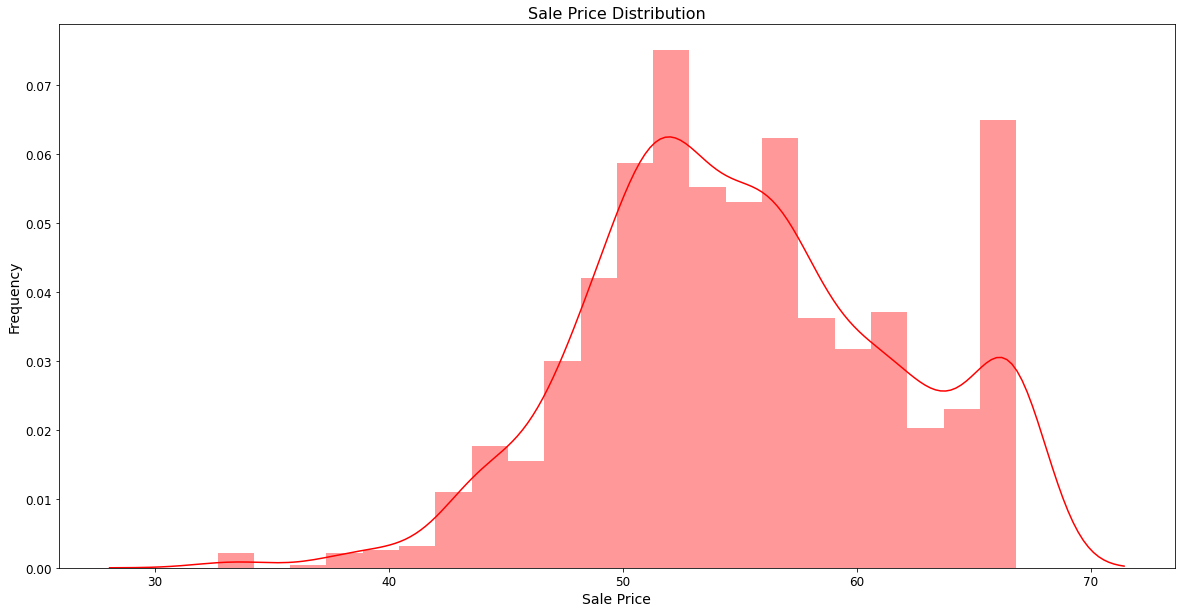

In [152]:
sns.distplot(nq['Sale_Price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [153]:
y_tepr

1419    60.641270
494     45.028788
1411    51.924941
569     51.420590
486     53.832126
54      50.657970
148     52.048279
1191    55.827702
915     42.171633
427     47.769730
646     46.151360
1305    66.797936
1376    44.979414
501     60.974817
1256    66.797936
461     53.716854
914     55.799132
278     66.797936
1394    62.707301
1273    56.146724
1024    65.962023
393     46.415888
31      53.056070
1317    59.335255
632     43.532938
530     55.934447
893     54.848066
326     66.797936
620     40.615481
231     66.797936
89      49.812632
295     52.232196
1357    53.121119
1223    51.664007
1121    59.711579
34      65.226038
479     44.726073
152     57.488971
223     45.947009
390     49.186847
52      47.914199
831     53.250740
549     64.069586
649     43.881915
1331    50.980641
175     62.402515
1244    61.269257
1019    59.766687
312     49.310537
159     66.797936
1324    52.776321
1259    53.250740
1337    37.444362
1321    41.697755
740     50.916434
823     51

In [154]:
rsq1=rsq=ln.score(x_trpr,y_trpr) ### R square [0,1]
rsq1

0.8673760302444946

In [155]:
adjrsq1=1-(((1-rsq1)*(1167-1))/(1167-25-1)) 
adjrsq1  

0.8644701588651014

In [156]:
MSE1=metrics.mean_squared_error(y_tepr,ln_y1)
srmse1=np.sqrt(metrics.mean_squared_error(y_tepr,ln_y1))
srmse1,MSE1

(2.3008345131867944, 5.293839457071512)

In [157]:
y_tepr1=np.array(y_tepr)

In [158]:
RMSLE1(ln_y1,y_tepr1) # call function
tot_log_err

0.042408233180797845

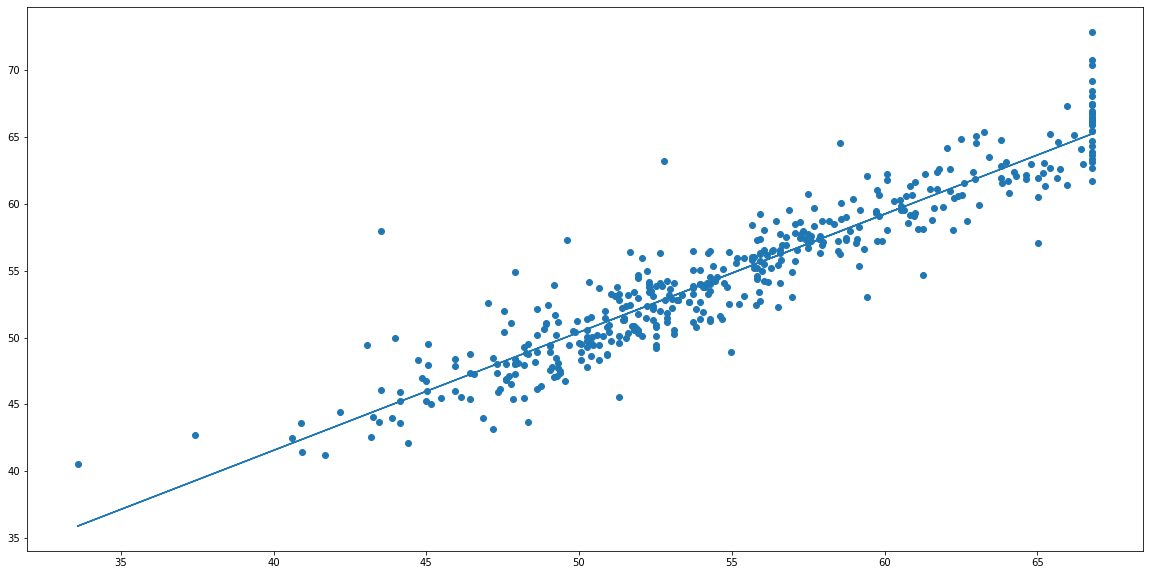

In [159]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_tepr, ln_y1)

def myfunc(y_tepr):
    return slope * y_tepr + intercept

mymodel = list(map(myfunc, y_tepr))

plt.scatter(y_tepr, ln_y1)
plt.plot(y_tepr, mymodel)
plt.show()

In [160]:
ridge = Ridge()
ridge.fit(x_trpr,y_trpr)
ridge_yhat = ridge.predict(x_tepr)

In [161]:
rsq2=rsq=ln.score(x_trpr,y_trpr) ### R square [0,1]
rsq2

0.8673760302444946

In [162]:
adjrsq2=1-(((1-rsq2)*(1167-1))/(1167-25-1)) 
adjrsq2 

0.8644701588651014

In [163]:
MSE2=metrics.mean_squared_error(y_tepr,ridge_yhat)
srmse2=np.sqrt(metrics.mean_squared_error(y_tepr,ridge_yhat))
srmse2,MSE2

(2.300732502721078, 5.293370049077195)

In [164]:
RMSLE1(ridge_yhat,y_tepr1) # call function
tot_log_err

0.04240684414479171

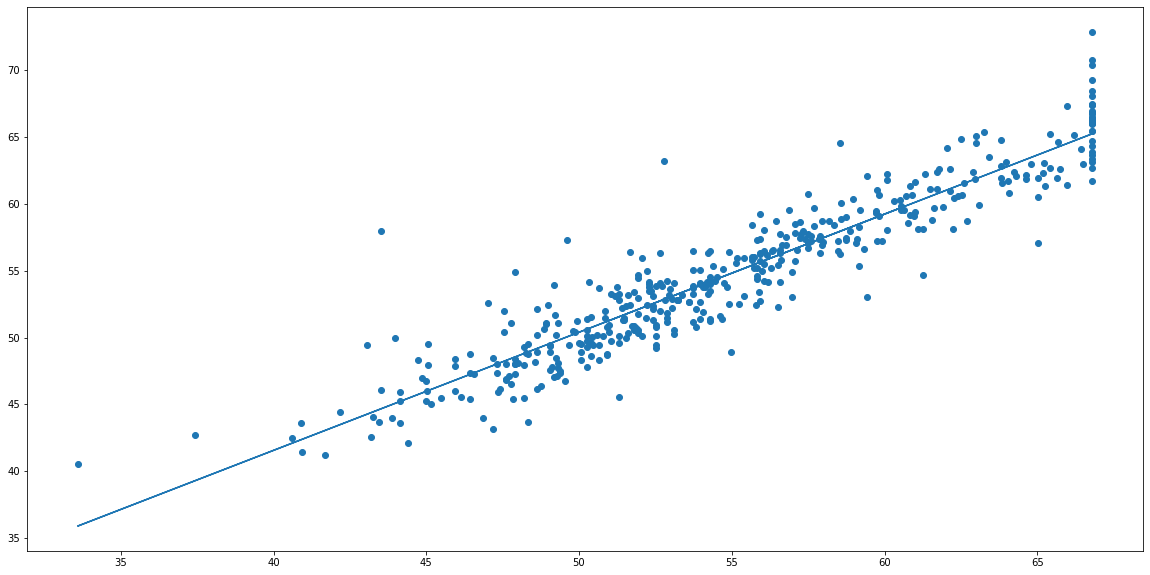

In [165]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_tepr, ridge_yhat)

def myfunc(y_tepr):
    return slope * y_tepr + intercept

mymodel = list(map(myfunc, y_tepr))

plt.scatter(y_tepr, ridge_yhat)
plt.plot(y_tepr, mymodel)
plt.show()

In [166]:
lasso = Lasso()
lasso.fit(x_trpr, y_trpr)
las_y= lasso.predict(x_tepr)

In [167]:
rsq3=lasso.score(x_trpr,y_trpr) ### R square [0,1]
rsq3

0.8249285323636907

In [168]:
adjrsq3=1-(((1-rsq3)*(1167-1))/(1167-25-1)) 
adjrsq3 

0.8210926106363394

In [169]:
MSE3=metrics.mean_squared_error(y_tepr,las_y)
srmse3=np.sqrt(metrics.mean_squared_error(y_tepr,las_y))
srmse3,MSE3

(2.5659159975006887, 6.583924906229954)

In [170]:
RMSLE1(las_y,y_tepr1) # call function
tot_log_err

0.04751567886367371

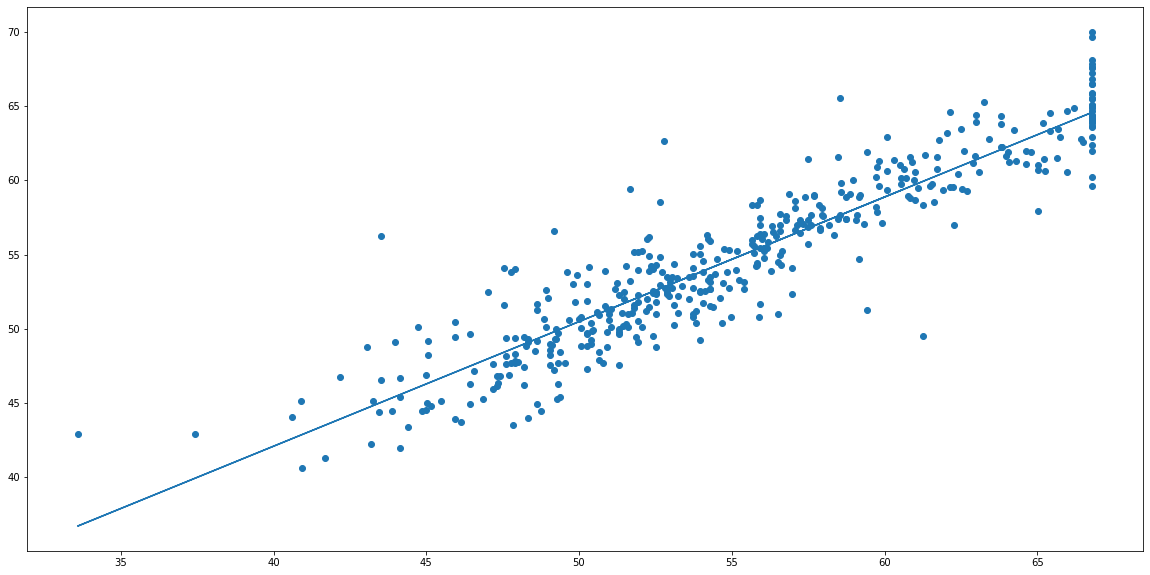

In [171]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_tepr, las_y)

def myfunc(y_tepr):
    return slope * y_tepr + intercept

mymodel = list(map(myfunc, y_tepr))

plt.scatter(y_tepr, las_y)
plt.plot(y_tepr, mymodel)
plt.show()

In [172]:
en=ElasticNet()
en.fit(x_trpr, y_trpr)
en_y= en.predict(x_tepr)

In [173]:
rsq4=en.score(x_trpr,y_trpr) ### R square [0,1]
rsq4

0.8407200940348133

In [174]:
adjrsq4=1-(((1-rsq4)*(1167-1))/(1167-25-1)) 
adjrsq4 

0.83723017497335

In [175]:
MSE4=metrics.mean_squared_error(y_tepr,en_y)
srmse4=np.sqrt(metrics.mean_squared_error(y_tepr,en_y))
srmse4,MSE4

(2.4340716713004684, 5.9247049010274555)

In [176]:
RMSLE1(en_y,y_tepr1) # call function
tot_log_err

0.04514145137613839

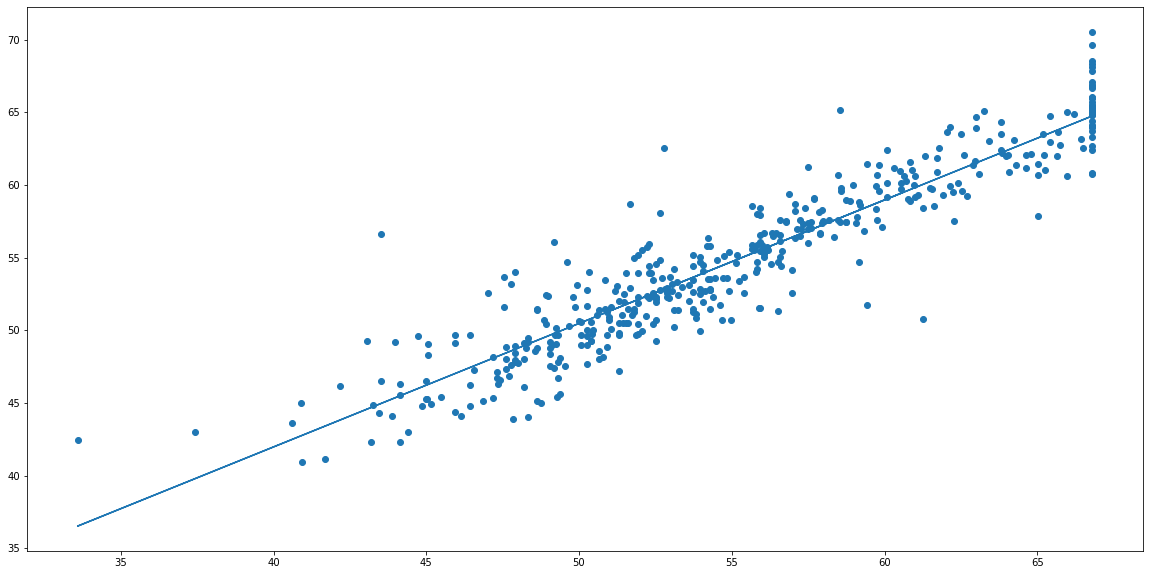

In [177]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_tepr, en_y)

def myfunc(y_tepr):
    return slope * y_tepr + intercept

mymodel = list(map(myfunc, y_tepr))

plt.scatter(y_tepr, en_y)
plt.plot(y_tepr, mymodel)
plt.show()

In [178]:
dt = DecisionTreeRegressor()
dt.fit(x_trpr, y_trpr)
dt_y= dt.predict(x_tepr)

In [179]:
rsq5=dt.score(x_trpr,y_trpr) ### R square [0,1]
rsq5

1.0

In [180]:
adjrsq5=1-(((1-rsq5)*(1167-1))/(1167-25-1)) 
adjrsq5

1.0

In [181]:
MSE5=metrics.mean_squared_error(y_tepr,dt_y)
srmse5=np.sqrt(metrics.mean_squared_error(y_tepr,dt_y))
srmse5,MSE5

(3.5941990205573986, 12.918266599375762)

In [182]:
RMSLE1(dt_y,y_tepr1) # call function
tot_log_err

0.06686108604120919

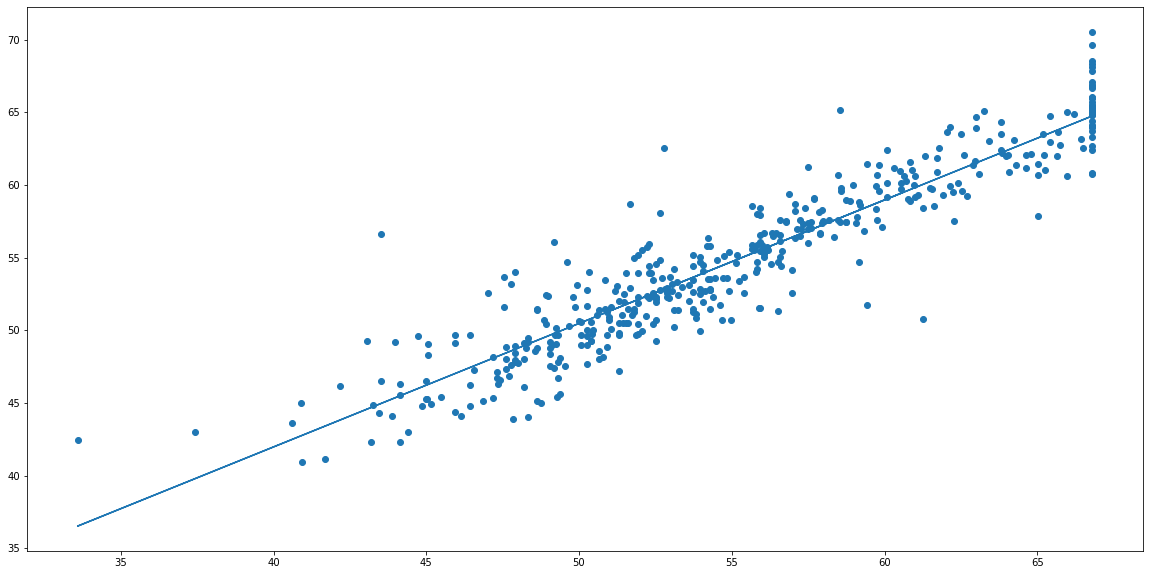

In [183]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(y_tepr, en_y)

def myfunc(y_tepr):
    return slope * y_tepr + intercept

mymodel = list(map(myfunc, y_tepr))

plt.scatter(y_tepr, en_y)
plt.plot(y_tepr, mymodel)
plt.show()

In [184]:
rf = RandomForestRegressor()
rf.fit(x_trpr, y_trpr)
rf_y= rf.predict(x_tepr)

In [185]:
rsq6=rf.score(x_trpr,y_trpr) ### R square [0,1]
rsq6

0.9807120720707516

In [186]:
adjrsq6=1-(((1-rsq6)*(1167-1))/(1167-25-1)) 
adjrsq6

0.9802894619057813

In [187]:
MSE6=metrics.mean_squared_error(y_tepr,rf_y)
srmse6=np.sqrt(metrics.mean_squared_error(y_tepr,rf_y))
srmse6,MSE6

(2.4557101124689806, 6.030512156482413)

In [188]:
RMSLE1(rf_y,y_tepr1) # call function
tot_log_err

0.04565353004331115

In [189]:
xgb=XGBRFRegressor()
xgb.fit(x_trpr, y_trpr)
xgb_y= xgb.predict(x_tepr)

In [190]:
rsq7=xgb.score(x_trpr,y_trpr) ### R square [0,1]
rsq7

0.933366572791805

In [191]:
adjrsq7=1-(((1-rsq7)*(1167-1))/(1167-25-1)) 
adjrsq7

0.9319065941062618

In [192]:
MSE6=metrics.mean_squared_error(y_tepr,xgb_y)
srmse6=np.sqrt(metrics.mean_squared_error(y_tepr,xgb_y))
srmse6,MSE6

(2.520358119654294, 6.352205051307328)

In [193]:
knn =  KNeighborsRegressor(n_neighbors = 10)
knn.fit(x_trpr, y_trpr)
knn_y= knn.predict(x_tepr)

In [194]:
rsq8=knn.score(x_trpr,y_trpr) ### R square [0,1]
rsq8

0.6290885292785082

In [195]:
adjrsq8=1-(((1-rsq8)*(1167-1))/(1167-25-1)) 
adjrsq8

0.6209616346527087

In [196]:
MSE8=metrics.mean_squared_error(y_tepr,knn_y)
srmse8=np.sqrt(metrics.mean_squared_error(y_tepr,knn_y))
srmse8,MSE8

(4.346290839682328, 18.89024406310651)

for x in prtest.columns:
    for y in ['Id', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Property_Shape','House_Design', 'Overall_Material', 'Construction_Year', 'Remodel_Year','Exterior2nd', 'Exterior_Material', 'Basement_Height', 'BsmtFinType1','BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area','Second_Floor_Area', 'Grade_Living_Area', 'Fireplaces','Garage_Finish_Year','Garage_Area','W_Deck_Area', 'Open_Lobby_Area','Enclosed_Lobby_Area'] :
        print(y)
        if y==x:
            prtest=prtest.drop([y],axis=1)
            print(y,prtest.shape)

# test data work


In [194]:
prtest=pd.read_csv(r'C:\Users\annas\Downloads\Property_Price_Test.csv')

In [195]:
prtest.describe()

Id  Building_Class   Lot_Extent      Lot_Size  \
count  1459.000000     1459.000000  1232.000000   1459.000000   
mean   2190.000000       57.378341    68.580357   9872.044418   
std     421.321334       42.746880    22.376841   4960.234751   
min    1461.000000       20.000000    21.000000  -4265.104479   
25%    1825.500000       20.000000    58.000000   6351.984222   
50%    2190.000000       50.000000    67.000000   9784.907361   
75%    2554.500000       70.000000    80.000000  13208.971525   
max    2919.000000      190.000000   200.000000  26126.190300   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.078821         5.553804        1971.357779   1983.662783   
std            1.436812         1.113740          30.390071     21.130467   
min            1.000000         1.000000        1879.000000   1950.000000   
25%            5.000000         5.000000        1953.000000   1963.000000   
50%            6.000000         5.000000        1973.000000   1992.000000   
75%            7.000000         6.000000        2001.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count        1444.000000  1458.000000  1458.000000  1458.000000   
mean          100.709141   439.203704    52.619342   554.294925   
std           177.625900   455.268042   176.753926   437.260486   
min             0.000000     0.000000     0.000000     0.000000   
25%             0.000000     0.000000     0.000000   219.250000   
50%             0.000000   350.500000     0.000000   460.000000   
75%           164.000000   753.500000     0.000000   797.750000   
max          1290.000000  4010.000000  1526.000000  2140.000000   

       Total_Basement_Area  First_Floor_Area  Second_Floor_Area  LowQualFinSF  \
count          1458.000000       1459.000000        1459.000000   1459.000000   
mean           1046.117970       1156.534613         325.967786      3.543523   
std             442.898624        398.165820         420.610226     44.043251   
min               0.000000        407.000000           0.000000      0.000000   
25%             784.000000        873.500000           0.000000      0.000000   
50%             988.000000       1079.000000           0.000000      0.000000   
75%            1305.000000       1382.500000         676.000000      0.000000   
max            5095.000000       5095.000000        1862.000000   1064.000000   

       Grade_Living_Area  Underground_Full_Bathroom  \
count        1459.000000                1457.000000   
mean         1486.045922                   0.434454   
std           485.566099                   0.530648   
min           407.000000                   0.000000   
25%          1117.500000                   0.000000   
50%          1432.000000                   0.000000   
75%          1721.000000                   1.000000   
max          5095.000000                   3.000000   

       Underground_Half_Bathroom  Full_Bathroom_Above_Grade  \
count                1457.000000                1459.000000   
mean                    0.065202                   1.570939   
std                     0.252468                   0.555190   
min                     0.000000                   0.000000   
25%                     0.000000                   1.000000   
50%                     0.000000                   2.000000   
75%                     0.000000                   2.000000   
max                     2.000000                   4.000000   

       Half_Bathroom_Above_Grade  Bedroom_Above_Grade  Kitchen_Above_Grade  \
count                1459.000000          1459.000000          1459.000000   
mean                    0.377656             2.854010             1.042495   
std                     0.503017             0.829788             0.208472   
min                     0.

In [196]:
def nv_to_pv(prtest):
    if prtest['Lot_Size'] < 0:
        return prtest['Lot_Size'] * (-1)
    elif prtest['Lot_Size'] >0:
        return prtest['Lot_Size']
    #create Age_new 
prtest['Lot_Size']=prtest.apply(nv_to_pv,axis=1)
prtest['Lot_Size'].describe()
print(prtest.Lot_Size.describe())

count     1459.000000
mean      9928.519219
std       4846.125145
min         20.443026
25%       6351.984222
50%       9784.907361
75%      13208.971525
max      26126.190300
Name: Lot_Size, dtype: float64


In [197]:
for x in['Zoning_Class', 'Road_Type', 'Lane_Type', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Condition', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Brick_Veneer_Type', 'Brick_Veneer_Area', 'Exterior_Condition', 'Foundation_Type', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType2', 'BsmtFinSF2', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'LowQualFinSF', 'Underground_Full_Bathroom', 'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Built_Year', 'Garage_Size', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area', 'Pool_Quality', 'Fence_Quality', 'Miscellaneous_Feature', 'Miscellaneous_Value', 'Month_Sold', 'Sale_Type', 'Sale_Condition']:
    prtest=prtest.drop([x],axis=1)
    print(x,prtest.shape)

Zoning_Class (1459, 79)
Road_Type (1459, 78)
Lane_Type (1459, 77)
Land_Outline (1459, 76)
Utility_Type (1459, 75)
Lot_Configuration (1459, 74)
Property_Slope (1459, 73)
Neighborhood (1459, 72)
Condition1 (1459, 71)
Condition2 (1459, 70)
House_Type (1459, 69)
House_Condition (1459, 68)
Roof_Design (1459, 67)
Roof_Quality (1459, 66)
Exterior1st (1459, 65)
Brick_Veneer_Type (1459, 64)
Brick_Veneer_Area (1459, 63)
Exterior_Condition (1459, 62)
Foundation_Type (1459, 61)
Basement_Condition (1459, 60)
Exposure_Level (1459, 59)
BsmtFinType2 (1459, 58)
BsmtFinSF2 (1459, 57)
Heating_Type (1459, 56)
Heating_Quality (1459, 55)
Air_Conditioning (1459, 54)
Electrical_System (1459, 53)
LowQualFinSF (1459, 52)
Underground_Full_Bathroom (1459, 51)
Underground_Half_Bathroom (1459, 50)
Full_Bathroom_Above_Grade (1459, 49)
Half_Bathroom_Above_Grade (1459, 48)
Bedroom_Above_Grade (1459, 47)
Kitchen_Above_Grade (1459, 46)
Kitchen_Quality (1459, 45)
Rooms_Above_Grade (1459, 44)
Functional_Rate (1459, 43)
Fi

In [198]:
prtest.columns

Index(['Id', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Property_Shape',
       'House_Design', 'Overall_Material', 'Construction_Year', 'Remodel_Year',
       'Exterior2nd', 'Exterior_Material', 'Basement_Height', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area',
       'Second_Floor_Area', 'Grade_Living_Area', 'Fireplaces',
       'Garage_Finish_Year', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area',
       'Enclosed_Lobby_Area', 'Year_Sold'],
      dtype='object')

In [199]:
prtest.isnull().sum()

Id                       0
Building_Class           0
Lot_Extent             227
Lot_Size                 0
Property_Shape           0
House_Design             0
Overall_Material         0
Construction_Year        0
Remodel_Year             0
Exterior2nd              1
Exterior_Material        0
Basement_Height         44
BsmtFinType1            42
BsmtFinSF1               1
BsmtUnfSF                1
Total_Basement_Area      1
First_Floor_Area         0
Second_Floor_Area        0
Grade_Living_Area        0
Fireplaces               0
Garage_Finish_Year      78
Garage_Area              1
W_Deck_Area              0
Open_Lobby_Area          0
Enclosed_Lobby_Area      0
Year_Sold                0
dtype: int64

In [200]:
for i in['BsmtFinType1','Basement_Height','Lot_Extent','Garage_Finish_Year','Garage_Area','BsmtFinSF1','BsmtUnfSF','Total_Basement_Area','Exterior2nd']:
        x = prtest[i].value_counts()
        print("Column name is:",i,"and it value is:",x)

Column name is: BsmtFinType1 and it value is: GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64
Column name is: Basement_Height and it value is: TA    634
Gd    591
Ex    137
Fa     53
Name: Basement_Height, dtype: int64
Column name is: Lot_Extent and it value is: 60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
65.0      49
85.0      36
24.0      30
63.0      30
21.0      27
68.0      25
64.0      24
74.0      24
90.0      23
72.0      22
62.0      22
78.0      21
82.0      16
73.0      15
52.0      14
57.0      14
53.0      14
56.0      14
76.0      14
59.0      14
100.0     12
88.0      12
51.0      12
81.0      12
79.0      11
43.0      11
66.0      11
35.0      10
44.0      10
58.0      10
48.0      10
67.0      10
84.0       9
61.0       9
110.0      9
69.0       9
91.0       8
95.0       8
42.0       8
41.0       8
83.0       8
45.0       7
71.0       7
120.0      7
55.0       7
94.0       6
96.0       6
77.0      

In [201]:
prtest.Lot_Extent=prtest.Lot_Extent.fillna(25.0)
prtest.Basement_Height=prtest.Basement_Height.fillna('Fa')
prtest.BsmtFinType1=prtest.BsmtFinType1.fillna('LwQ')
prtest.Garage_Finish_Year=prtest.Garage_Finish_Year.fillna('Fin')

prtest.Garage_Area=prtest.Garage_Area.fillna(160.0)
prtest.BsmtFinSF1=prtest.BsmtFinSF1.fillna(32.0)
prtest.BsmtUnfSF=prtest.BsmtUnfSF.fillna(17.0)
prtest.Total_Basement_Area=prtest.Total_Basement_Area.fillna(297)
prtest.Exterior2nd=prtest.Exterior2nd.fillna('AsphShn')

In [202]:
prtest.dtypes

Id                       int64
Building_Class           int64
Lot_Extent             float64
Lot_Size               float64
Property_Shape          object
House_Design            object
Overall_Material         int64
Construction_Year        int64
Remodel_Year             int64
Exterior2nd             object
Exterior_Material       object
Basement_Height         object
BsmtFinType1            object
BsmtFinSF1             float64
BsmtUnfSF              float64
Total_Basement_Area    float64
First_Floor_Area         int64
Second_Floor_Area        int64
Grade_Living_Area        int64
Fireplaces               int64
Garage_Finish_Year      object
Garage_Area            float64
W_Deck_Area              int64
Open_Lobby_Area          int64
Enclosed_Lobby_Area      int64
Year_Sold                int64
dtype: object

In [203]:
prtest.Property_Shape=le.fit_transform(prtest.Property_Shape)
prtest.House_Design=le.fit_transform(prtest.House_Design)
prtest.Exterior2nd=le.fit_transform(prtest.Exterior2nd)
prtest.Exterior_Material=le.fit_transform(prtest.Exterior_Material)
prtest.Basement_Height=le.fit_transform(prtest.Basement_Height)
prtest.BsmtFinType1=le.fit_transform(prtest.BsmtFinType1)
prtest.Garage_Finish_Year=le.fit_transform(prtest.Garage_Finish_Year)

In [204]:
prtest.dtypes

Id                       int64
Building_Class           int64
Lot_Extent             float64
Lot_Size               float64
Property_Shape           int32
House_Design             int32
Overall_Material         int64
Construction_Year        int64
Remodel_Year             int64
Exterior2nd              int32
Exterior_Material        int32
Basement_Height          int32
BsmtFinType1             int32
BsmtFinSF1             float64
BsmtUnfSF              float64
Total_Basement_Area    float64
First_Floor_Area         int64
Second_Floor_Area        int64
Grade_Living_Area        int64
Fireplaces               int64
Garage_Finish_Year       int32
Garage_Area            float64
W_Deck_Area              int64
Open_Lobby_Area          int64
Enclosed_Lobby_Area      int64
Year_Sold                int64
dtype: object

In [205]:
type(prtest),prtest.shape

(pandas.core.frame.DataFrame, (1459, 26))

In [206]:
x_train=nq.iloc[:,1:-1]
y_train=nq.iloc[:,-1]
x_test=prtest.drop(["Id"],axis=1)

In [207]:
x_train.shape,y_train.shape,x_test.shape

((1459, 25), (1459,), (1459, 25))

In [208]:
ln.fit(x_train,y_train)
prde= ln.predict(x_test)
predictions_reg=prde

In [209]:
testIDs=prtest['Id']
testIDs

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
30      1491
31      1492
32      1493
33      1494
34      1495
35      1496
36      1497
37      1498
38      1499
39      1500
40      1501
41      1502
42      1503
43      1504
44      1505
45      1506
46      1507
47      1508
48      1509
49      1510
50      1511
51      1512
52      1513
53      1514
54      1515
55      1516
56      1517
57      1518
58      1519
59      1520
60      1521
61      1522
62      1523
63      1524
64      1525
65      1526
66      1527
67      1528
68      1529
69      1530
70      1531
71      1532
72      1533
73      1534
74      1535
75      1536
76      1537

In [210]:
sub_df= pd.DataFrame({'ID': testIDs, 'bese_price': np.round(predictions_reg)})
sub_df

ID  bese_price
0     1461       509.0
1     1462       507.0
2     1463       103.0
3     1464       131.0
4     1465        46.0
5     1466       276.0
6     1467       490.0
7     1468       371.0
8     1469       716.0
9     1470       369.0
10    1471       220.0
11    1472       367.0
12    1473       165.0
13    1474        -1.0
14    1475       608.0
15    1476       -27.0
16    1477       353.0
17    1478       322.0
18    1479       311.0
19    1480       377.0
20    1481       159.0
21    1482       309.0
22    1483       503.0
23    1484        25.0
24    1485       298.0
25    1486       418.0
26    1487         9.0
27    1488       367.0
28    1489       210.0
29    1490       515.0
30    1491        53.0
31    1492       117.0
32    1493       325.0
33    1494       413.0
34    1495       364.0
35    1496       159.0
36    1497       193.0
37    1498       261.0
38    1499       544.0
39    1500       237.0
40    1501       109.0
41    1502       106.0
42    1503       356.0
43    1504       413.0
44    1505        -3.0
45    1506       316.0
46    1507       343.0
47    1508       132.0
48    1509       104.0
49    1510       495.0
50    1511       181.0
51    1512       395.0
52    1513       460.0
53    1514       608.0
54    1515       432.0
55    1516       170.0
56    1517        14.0
57    1518       453.0
58    1519       191.0
59    1520       158.0
60    1521       383.0
61    1522       239.0
62    1523       326.0
63    1524        25.0
64    1525       284.0
65    1526       508.0
66    1527       289.0
67    1528       464.0
68    1529       413.0
69    1530       715.0
70    1531       328.0
71    1532       237.0
72    1533       170.0
73    1534       170.0
74    1535       101.0
75    1536        98.0
76    1537       700.0
77    1538       377.0
78    1539        44.0
79    1540       325.0
80    1541       308.0
81    1542       668.0
82    1543       613.0
83    1544       305.0
84    1545       540.0
85    1546       468.0
86    1547       179.0
87    1548       553.0
88    1549       303.0
89    1550       393.0
90    1551       245.0
91    1552       294.0
92    1553       341.0
93    1554       294.0
94    1555       240.0
95    1556       446.0
96    1557       307.0
97    1558       151.0
98    1559       469.0
99    1560       302.0
100   1561       164.0
101   1562       416.0
102   1563       153.0
103   1564       527.0
104   1565       167.0
105   1566        41.0
106   1567       188.0
107   1568       276.0
108   1569       757.0
109   1570       266.0
110   1571       154.0
111   1572        32.0
112   1573       138.0
113   1574       474.0
114   1575       131.0
115   1576       289.0
116   1577       123.0
117   1578       379.0
118   1579       300.0
119   1580       499.0
120   1581       473.0
121   1582       514.0
122   1583       327.0
123   1584       448.0
124   1585       418.0
125   1586       444.0
126   1587       272.0
127   1588       409.0
128   1589       147.0
129   1590       153.0
130   1591       128.0
131   1592       678.0
132   1593       358.0
133   1594        77.0
134   1595       -11.0
135   1596        45.0
136   1597       252.0
137   1598       245.0
138   1599       225.0
139   1600       420.0
140   1601       550.0
141   1602       342.0
142   1603       386.0
143   1604       212.0
144   1605       318.0
145   1606        62.0
146   1607       -83.0
147   1608       355.0
148   1609       430.0
149   1610       274.0
150   1611       421.0
151   1612       232.0
152   1613       288.0
153   1614       455.0
154   1615        35.0
155   1616       296.0
156   1617       313.0
157   1618       160.0
158   1619       472.0
159   1620       346.0
160   1621       279.0
161   1622       436.0
162   1623        52.0
163   1624        -1.0
164   1625       132.0
165   1626       583.0
166   1627       370.0
167   1628       199.0
168   1629       286.0
169   1630       286.0
170   1631       160.0
171   1632       446.0
172   1633       385.0
173   

In [211]:
def nv_to_pv(sub_df):
    if sub_df['bese_price'] < 0:
        return sub_df['bese_price'] * (-1)
    elif sub_df['bese_price'] >0:
        return sub_df['bese_price']
    #create Age_new 
sub_df['bese_price']=sub_df.apply(nv_to_pv,axis=1)  